In [ ]:
# ============================================================
# 🚀 PLANTDOCBOT - DAILY STARTUP (RUN THIS ONLY ONCE)
# ============================================================

print("="*60)
print("🚀 PLANTDOCBOT - QUICK START (AUTO VERSION)")
print("="*60)

# ========================================
# 1. MOUNT GOOGLE DRIVE
# ========================================
print("\n[1/4] Mounting Google Drive...")
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("✅ Drive mounted!")

# ========================================
# 2. SET PATHS
# ========================================
print("\n[2/4] Setting up paths...")
import os

DATASET_PATH = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset"
MODEL_PATH = "/content/drive/MyDrive/Plant_Disease_CNN_Model.keras"

print(f"✅ Paths configured!\n   Dataset: {DATASET_PATH}\n   Model: {MODEL_PATH}")

# ========================================
# 3. LOAD MODEL + DATA
# ========================================
print("\n[3/4] Loading model and test data...")
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = load_model(MODEL_PATH)
print(f"✅ Model loaded! ({len(model.layers)} layers)")

# Load test data
datagen = ImageDataGenerator(rescale=1./255)
test_gen = datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "test"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get class names (FIXED SECTION)
class_names = list(test_gen.class_indices.keys())
print("\n📌 Class names loaded!")
print(class_names)

# Evaluate model accuracy
loss, acc = model.evaluate(test_gen, verbose=1)
print(f"✅ Model Accuracy on Test Data: {acc*100:.2f}%")

# ========================================
# 4. HELPER FUNCTION FOR PREDICTION
# ========================================
print("\n[4/4] Setting up prediction function...")
import numpy as np
from PIL import Image

def predict_disease(image_path):
    """Predict plant disease from an image path"""

    img = Image.open(image_path).convert('RGB').resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class] * 100

    class_name = class_names[predicted_class]

    print(f"\n🌿 Predicted Class: {class_name}")
    print(f"🤖 Confidence: {confidence:.2f}%")

    return class_name, confidence

print("✅ Prediction function ready!")
print("\n🎉 Setup complete! You can now use:")
print("   👉 predict_disease('/path/to/your/image.jpg')")
print("="*60)


🚀 PLANTDOCBOT - QUICK START (AUTO VERSION)

[1/4] Mounting Google Drive...
Mounted at /content/drive
✅ Drive mounted!

[2/4] Setting up paths...
✅ Paths configured!
   Dataset: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset
   Model: /content/drive/MyDrive/Plant_Disease_CNN_Model.keras

[3/4] Loading model and test data...
✅ Model loaded! (158 layers)
Found 3107 images belonging to 15 classes.

📌 Class names loaded!
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/98 ━━━━━━━━━━━━━━━━━━━━ 19:11 17s/step - accuracy: 0.0000e+00 - loss: 3.1711

In [ ]:
# ============================================================
# 🚀 PLANT DISEASE BOT — STARTUP CELL (FINE-TUNED CNN MODEL)
# ============================================================

print("="*60)
print("🚀 PLANT DISEASE BOT — FINE-TUNED MODEL STARTUP")
print("="*60)

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("✓ Drive Mounted")

# 2. Set Paths
import os
DATASET_PATH = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset"
MODEL_PATH = "/content/drive/MyDrive/Plant_Disease_FT_Model.keras"
print("✓ Paths Ready")

# 3. Load Model
from tensorflow.keras.models import load_model
import tensorflow as tf

model = load_model(MODEL_PATH)
print("✓ Fine-Tuned Model Loaded")

# 4. Load Test Dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
test_gen = datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "test"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 5. Evaluate Accuracy
loss, acc = model.evaluate(test_gen, verbose=1)
print(f"✓ Test Accuracy: {acc*100:.2f}%")
print(f"✓ Test Loss: {loss:.4f}")

# 6. Prediction Function
import numpy as np
from PIL import Image

def predict_disease(image_path):
    img = Image.open(image_path).convert('RGB').resize((224, 224))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img, verbose=0)
    cls = np.argmax(pred)
    conf = pred[0][cls] * 100

    class_names = {v: k for k, v in test_gen.class_indices.items()}
    name = class_names[cls]

    print("\n🌿 Predicted Class:", name)
    print("🤖 Confidence:", f"{conf:.2f}%")
    return name, conf

print("\n🎉 Setup Complete! Use:")
print("predict_disease('/content/your_image.jpg')")
print("="*60)


🚀 PLANT DISEASE BOT — FINE-TUNED MODEL STARTUP


KeyboardInterrupt: 

In [ ]:
import os

MODEL_PATH = "/content/drive/MyDrive/Plant_Disease_CNN_Model.keras"

if os.path.exists(MODEL_PATH):
    print("✅ Model file found!")
else:
    print("❌ File not found. Here’s what’s in your Drive folder:")
    !ls "/content/drive/MyDrive" | grep "Plant"


❌ File not found. Here’s what’s in your Drive folder:
Cleaned_PlantVillage_Dataset
Plant_Disease_Dataset_850_rows.xlsx


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List everything in your main Drive folder
print("=" * 50)
print("Contents of your Google Drive:")
print("=" * 50)
files_and_folders = os.listdir("/content/drive/MyDrive/")
for item in files_and_folders:
    full_path = os.path.join("/content/drive/MyDrive/", item)
    if os.path.isdir(full_path):
        print(f" {item} (Folder)")
    else:
        print(f" {item} (File)")

Contents of your Google Drive:
 Portfolio (1).gsite (File)
 MyFoodData Nutrition Facts SpreadSheet Release 1.4.gsheet (File)
 Portfolio.gsite (File)
 Colab Notebooks (Folder)
 Screenshot_2025-05-19-10-06-04-19_6012fa4d4ddec268fc5c7112cbb265e7.jpg (File)
 Internship 6.0 social media post template (1).gslides (File)
 Internship 6.0 social media post template.gslides (File)
 plant village dataset (Folder)
 Plant_Disease_Dataset_850_rows.xlsx (File)
 Cleaned_PlantVillage_Dataset (Folder)
 plant symptoms .gsheet (File)


In [ ]:
# Search for anything with "plant" or "village" in the name
print("\n" + "=" * 50)
print("Searching for plant village dataset...")
print("=" * 50)

for item in files_and_folders:
    if 'plant' in item.lower() or 'village' in item.lower() or 'disease' in item.lower():
        full_path = os.path.join("/content/drive/MyDrive/", item)
        if os.path.isdir(full_path):
            print(f"Found Folder: {item}")
            # Check what's inside
            print(f"   Contents preview:")
            contents = os.listdir(full_path)[:5]  # Show first 5 items
            for content in contents:
                print(f"    {content}")
        else:
            # Check file size if it's a file
            size_mb = os.path.getsize(full_path) / (1024 * 1024)
            print(f" Found File: {item} ({size_mb:.2f} MB)")


Searching for plant village dataset...
Found Folder: plant village dataset
   Contents preview:
    PlantVillage
 Found File: Plant_Disease_Dataset_850_rows.xlsx (0.05 MB)
Found Folder: Cleaned_PlantVillage_Dataset
   Contents preview:
    train
    val
    test
 Found File: plant symptoms .gsheet (0.00 MB)


In [ ]:
import os

# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/plant village dataset/PlantVillage"

# Check what's inside PlantVillage folder
print("=" * 50)
print("Contents of PlantVillage folder:")
print("=" * 50)

contents = os.listdir(dataset_path)
print(f"Total items: {len(contents)}\n")

# Show first 15 items
for i, item in enumerate(contents[:15]):
    full_path = os.path.join(dataset_path, item)
    if os.path.isdir(full_path):
        num_images = len(os.listdir(full_path))
        print(f"{i+1}.  {item} ({num_images} images)")
    else:
        print(f"{i+1}.  {item}")

if len(contents) > 15:
    print(f"\n... and {len(contents) - 15} more items")

Contents of PlantVillage folder:
Total items: 15

1.  Pepper__bell___Bacterial_spot (997 images)
2.  Potato___Early_blight (1000 images)
3.  Tomato_healthy (1591 images)
4.  Tomato_Late_blight (1909 images)
5.  Potato___Late_blight (1000 images)
6.  Pepper__bell___healthy (1478 images)
7.  Potato___healthy (152 images)
8.  Tomato_Bacterial_spot (2127 images)
9.  Tomato_Early_blight (1000 images)
10.  Tomato_Spider_mites_Two_spotted_spider_mite (1676 images)
11.  Tomato_Septoria_leaf_spot (1771 images)
12.  Tomato_Leaf_Mold (952 images)
13.  Tomato__Tomato_mosaic_virus (373 images)
14.  Tomato__Tomato_YellowLeaf__Curl_Virus (3209 images)
15.  Tomato__Target_Spot (1396 images)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Check your Drive contents
print("Contents of your Google Drive:")
drive_contents = os.listdir("/content/drive/MyDrive/")
for item in drive_contents:
    if 'plant' in item.lower() or 'doc' in item.lower() or 'village' in item.lower():
        print(f" {item}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of your Google Drive:
 plant village dataset
 Plant_Disease_Dataset_850_rows.xlsx
 Cleaned_PlantVillage_Dataset
 plant symptoms .gsheet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil
import random
from PIL import Image
import numpy as np
from tqdm import tqdm

# Set paths
source_path = "/content/drive/MyDrive/plant village dataset/PlantVillage"
output_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset"

# Create output directories
train_path = os.path.join(output_path, "train")
val_path = os.path.join(output_path, "val")
test_path = os.path.join(output_path, "test")

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

print(" Output directories created!")
print(f"Output path: {output_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Output directories created!
Output path: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset


In [ ]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Image size
IMG_SIZE = (224, 224)

# Split ratios
TRAIN_RATIO = 0.70
VAL_RATIO = 0.15
TEST_RATIO = 0.15

# Get all classes
classes = sorted([c for c in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, c))])
print(f"Total classes found: {len(classes)}")
print(f"Classes: {classes}")

# Counters
total_train = 0
total_val = 0
total_test = 0
errors = []

print("\n" + "="*70)
print("STARTING IMAGE PROCESSING...")
print("="*70)

for class_name in tqdm(classes, desc="Processing classes"):
    # Create class folders in train/val/test
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

    # Get all images in this class
    class_path = os.path.join(source_path, class_name)
    all_files = os.listdir(class_path)
    images = [f for f in all_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if len(images) == 0:
        print(f"⚠️ No images found in {class_name}")
        continue

    # Shuffle images
    random.shuffle(images)

    # Calculate split indices
    total_images = len(images)
    train_end = int(total_images * TRAIN_RATIO)
    val_end = train_end + int(total_images * VAL_RATIO)

    # Split images
    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]

    # Process train images
    for img_name in train_images:
        try:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert('RGB')
            img_resized = img.resize(IMG_SIZE, Image.LANCZOS)
            save_path = os.path.join(train_path, class_name, img_name)
            img_resized.save(save_path, quality=95)
            total_train += 1
        except Exception as e:
            errors.append(f"Train - {class_name}/{img_name}: {str(e)}")

    # Process validation images
    for img_name in val_images:
        try:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert('RGB')
            img_resized = img.resize(IMG_SIZE, Image.LANCZOS)
            save_path = os.path.join(val_path, class_name, img_name)
            img_resized.save(save_path, quality=95)
            total_val += 1
        except Exception as e:
            errors.append(f"Val - {class_name}/{img_name}: {str(e)}")

    # Process test images
    for img_name in test_images:
        try:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert('RGB')
            img_resized = img.resize(IMG_SIZE, Image.LANCZOS)
            save_path = os.path.join(test_path, class_name, img_name)
            img_resized.save(save_path, quality=95)
            total_test += 1
        except Exception as e:
            errors.append(f"Test - {class_name}/{img_name}: {str(e)}")

print("\n" + "="*70)
print("✅ IMAGE PROCESSING COMPLETE!")
print("="*70)
print(f"📊 Training Images: {total_train} ({TRAIN_RATIO*100}%)")
print(f"📊 Validation Images: {total_val} ({VAL_RATIO*100}%)")
print(f"📊 Test Images: {total_test} ({TEST_RATIO*100}%)")
print(f"📊 Total Images Processed: {total_train + total_val + total_test}")

if errors:
    print(f"\n⚠️ Errors encountered: {len(errors)}")
    print("First 5 errors:")
    for err in errors[:5]:
        print(f"  - {err}")
else:
    print("\n✅ No errors!")

print(f"\n💾 Cleaned dataset saved at:\n   {output_path}")

Total classes found: 15
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

STARTING IMAGE PROCESSING...


Processing classes:   0%|          | 0/15 [04:40<?, ?it/s]


KeyboardInterrupt: 


DATASET VERIFICATION

📁 TRAIN SET:
   Classes: 15
   Total images: 14435

📁 VAL SET:
   Classes: 15
   Total images: 3088

📁 TEST SET:
   Classes: 15
   Total images: 3107


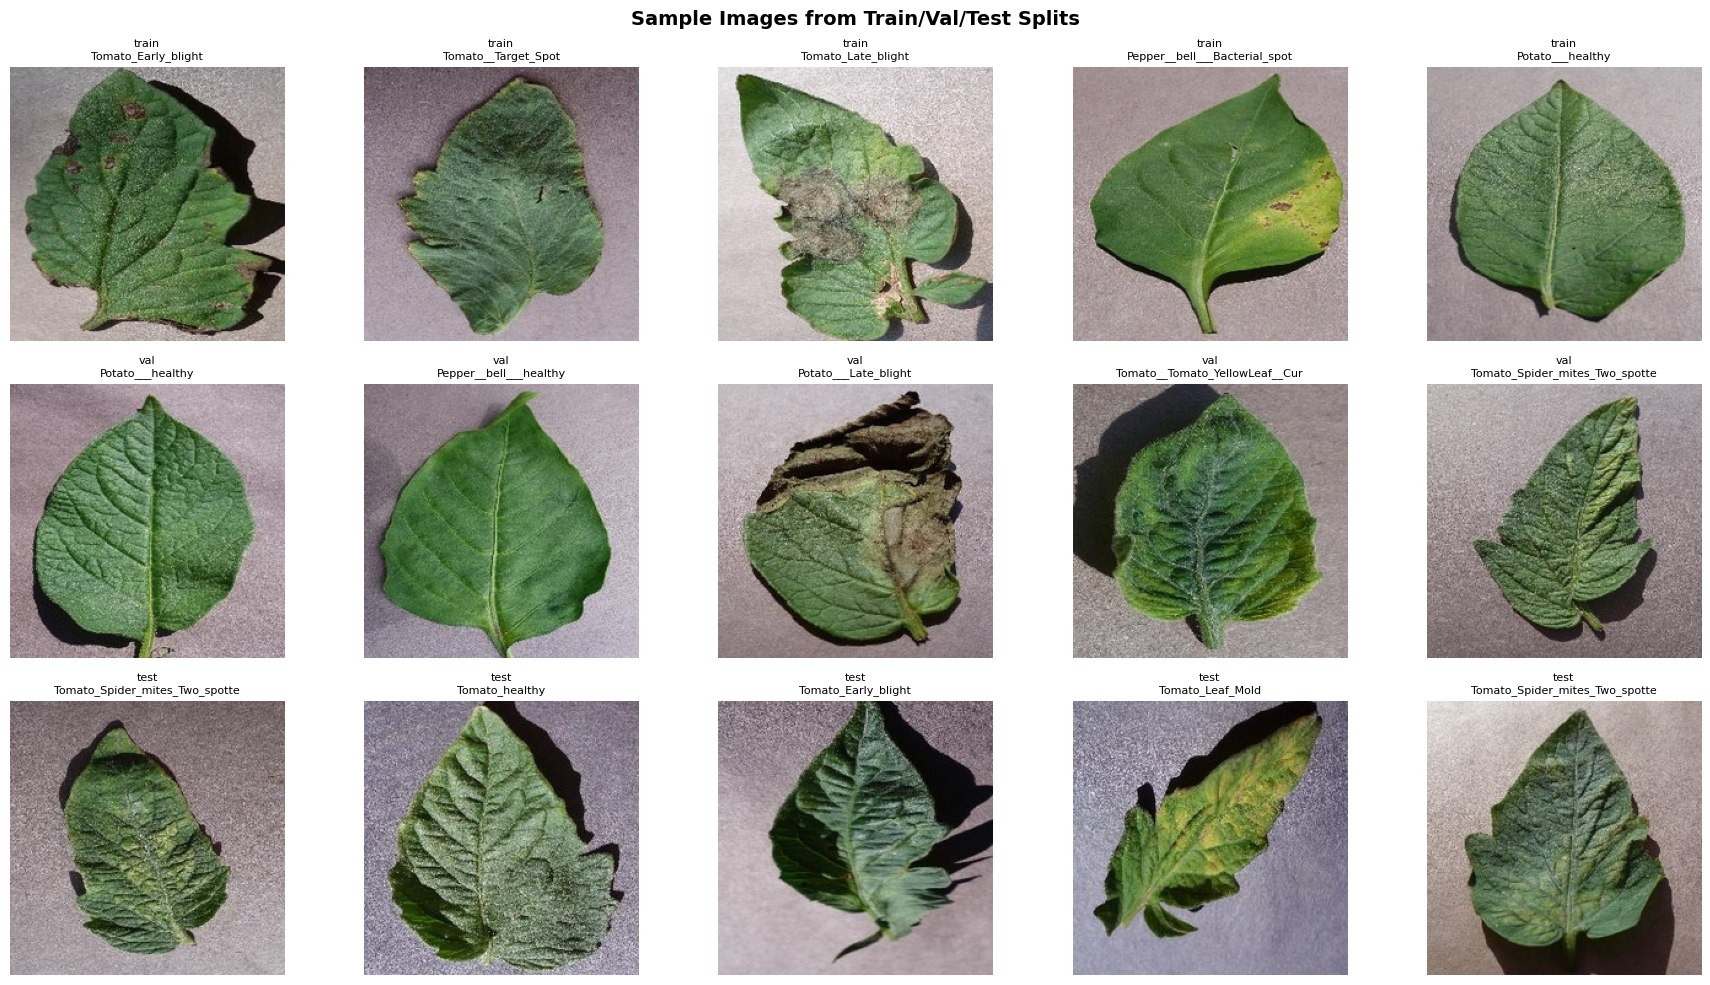

In [ ]:
import matplotlib.pyplot as plt

print("\n" + "="*70)
print("DATASET VERIFICATION")
print("="*70)

# Verify each split
for split_name in ['train', 'val', 'test']:
    split_path = os.path.join(output_path, split_name)
    classes = sorted(os.listdir(split_path))

    print(f"\n📁 {split_name.upper()} SET:")
    print(f"   Classes: {len(classes)}")

    total_images = 0
    for cls in classes:
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            count = len(os.listdir(cls_path))
            total_images += count

    print(f"   Total images: {total_images}")

# Visualize samples
fig, axes = plt.subplots(3, 5, figsize=(18, 10))

splits = ['train', 'val', 'test']
for i, split_name in enumerate(splits):
    split_path = os.path.join(output_path, split_name)
    classes = os.listdir(split_path)

    for j in range(5):
        # Pick a random class and image
        random_class = random.choice(classes)
        class_path = os.path.join(split_path, random_class)
        images = os.listdir(class_path)
        random_img = random.choice(images)
        img_path = os.path.join(class_path, random_img)

        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(f"{split_name}\n{random_class[:30]}", fontsize=8)
        axes[i, j].axis('off')

plt.suptitle("Sample Images from Train/Val/Test Splits", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

csv_url = 'https://docs.google.com/spreadsheets/d/1oP_eFUWLsKoagIbwbdanUNkxBAg6UpZKM6TgUjveu3Y/export?format=csv'
df = pd.read_csv(csv_url)
print(df.head())


   ID   PLANT       DISEASE  \
0   1  Tomato  Early blight   
1   2  Tomato  Early blight   
2   3  Tomato  Early blight   
3   4  Tomato  Early blight   
4   5  Tomato  Early blight   

                                    TYPICAL_SYMPTOMS      LIKELY_CAUSE  \
0  Early blight symptoms: lesions and spots on le...  Fungal infection   
1  Early blight symptoms: lesions and spots on le...  Fungal infection   
2  Typical signs on tomato include necrotic lesio...  Fungal infection   
3  Tomato shows early blight as wilting, discolor...  Fungal infection   
4  Tomato shows early blight as wilting, discolor...  Fungal infection   

                         RECOMMENDED_TREATMENT       SEVERITY  \
0  Apply copper-based fungicide or bactericide  moderate-high   
1  Apply copper-based fungicide or bactericide  moderate-high   
2  Apply copper-based fungicide or bactericide  moderate-high   
3  Apply copper-based fungicide or bactericide  moderate-high   
4  Apply copper-based fungicide or bacteric

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

output_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset"

# Use the correct paths to the cleaned dataset
train_path = os.path.join(output_path, "train")
val_path = os.path.join(output_path, "val")
test_path = os.path.join(output_path, "test")

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)  # fixed output size

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Found 14434 images belonging to 15 classes.
Found 3088 images belonging to 15 classes.
Found 3107 images belonging to 15 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,589,775 (9.88 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
train_gen,
validation_data=val_gen,
epochs=10
)

test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 29/452 ━━━━━━━━━━━━━━━━━━━━ 1:45:30 15s/step - accuracy: 0.2934 - loss: 2.3908


KeyboardInterrupt



In [ ]:
from tensorflow.keras.models import load_model

# After training your model
model.save('/content/drive/MyDrive/Plant_Disease_CNN_Model.keras')
print("✅ Model saved to Drive!")


✅ Model saved to Drive!


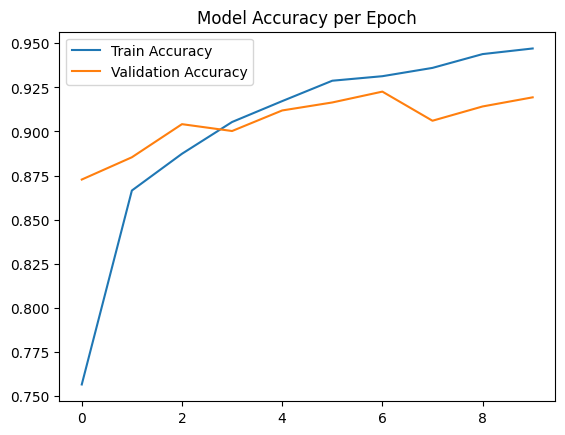

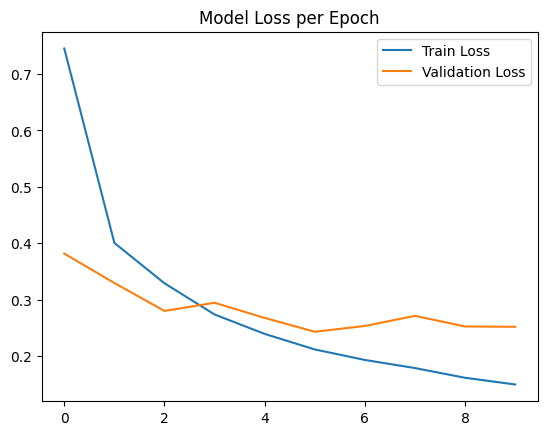

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load model
model = load_model('/content/drive/MyDrive/Plant_Disease_CNN_Model.keras')

# Load test data
datagen = ImageDataGenerator(rescale=1./255)
test_gen = datagen.flow_from_directory(
    "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate accuracy
loss, acc = model.evaluate(test_gen)
print(f"✅ Model Accuracy: {acc*100:.2f}%")


Found 3107 images belonging to 15 classes.
98/98 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9240 - loss: 0.2394
✅ Model Accuracy: 92.44%


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Plant_Disease_CNN_Model.keras')
print("Model loaded successfully!")


Model loaded successfully!


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train"
val_dir   = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/val"
test_dir  = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 14435 images belonging to 15 classes.
Found 3088 images belonging to 15 classes.
Found 3107 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(15, activation="softmax")(x)  # 15 classes

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.8609 - loss: 0.4260 - val_accuracy: 0.8721 - val_loss: 0.3859
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - accuracy: 0.8610 - loss: 0.3962 - val_accuracy: 0.8760 - val_loss: 0.4056
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.8547 - loss: 0.4150 - val_accuracy: 0.8873 - val_loss: 0.3416
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 705s 2s/step - accuracy: 0.8567 - loss: 0.4041 - val_accuracy: 0.8812 - val_loss: 0.3455
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 712s 2s/step - accuracy: 0.8680 - loss: 0.3888 - val_accuracy: 0.8740 - val_loss: 0.3664
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - accuracy: 0.8675 - loss: 0.3906 - val_accuracy: 0.8899 - val_loss: 0.3404
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 618s 1s/step - accuracy: 0.8662 - loss: 0.3987 - val_accuracy: 0.8941 - val_loss: 0.3417
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 653s 1s/step - accuracy: 0.8734 - loss: 0.3730 - val_accu

In [ ]:
for layer in base_model.layers[-40:]:
    layer.trainable = True


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(1e-5),  # lower LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


98/98 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9357 - loss: 0.1824
Test Accuracy: 0.9356292486190796
Test Loss: 0.18971478939056396


In [ ]:
model.save("/content/drive/MyDrive/MobileNetV2_PlantDisease_FT.keras")


In [ ]:
import matplotlib.pyplot as plt

# Combine histories
acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']

loss = history1.history['loss'] + history2.history['loss']
val_loss = history1.history['val_loss'] + history2.history['val_loss']

epochs = range(1, len(acc)+1)

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'history1' is not defined

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/MobileNetV2_PlantDisease_FT.keras")


In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


NameError: name 'test_gen' is not defined

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

output_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset"

train_path = os.path.join(output_path, "train")
val_path = os.path.join(output_path, "val")
test_path = os.path.join(output_path, "test")

# Only need test_gen if we want evaluation
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path, target_size=(224, 224), batch_size=32, class_mode='categorical'
)


Found 3107 images belonging to 15 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 1572s 16s/step - accuracy: 0.9342 - loss: 0.2015
Test Accuracy: 0.9356292486190796
Test Loss: 0.18987847864627838


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


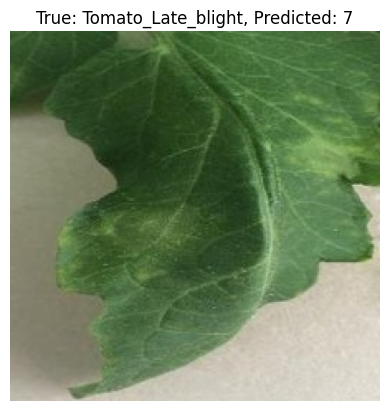

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


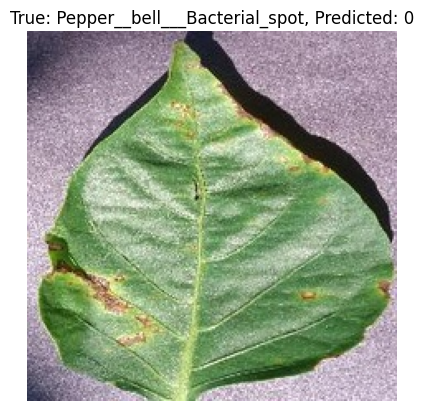

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


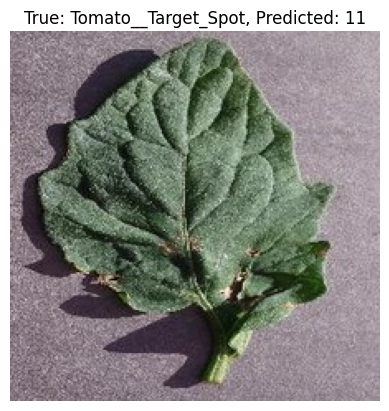

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


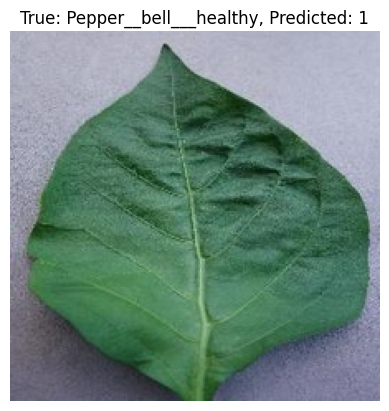

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


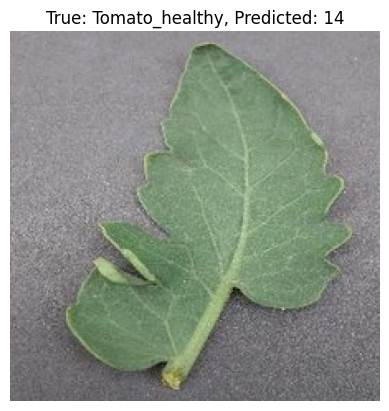

In [ ]:
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# List all test images
all_test_imgs = []
for cls in os.listdir(test_path):
    cls_path = os.path.join(test_path, cls)
    for img_file in os.listdir(cls_path):
        all_test_imgs.append((os.path.join(cls_path, img_file), cls))

# Pick 5 random images
sample_imgs = random.sample(all_test_imgs, 5)

for img_path, true_class in sample_imgs:
    img = image.load_img(img_path, target_size=(224,224))
    img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]

    plt.imshow(img)
    plt.title(f"True: {true_class}, Predicted: {pred_class}")
    plt.axis('off')
    plt.show()


98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step


<Figure size 1200x1200 with 0 Axes>

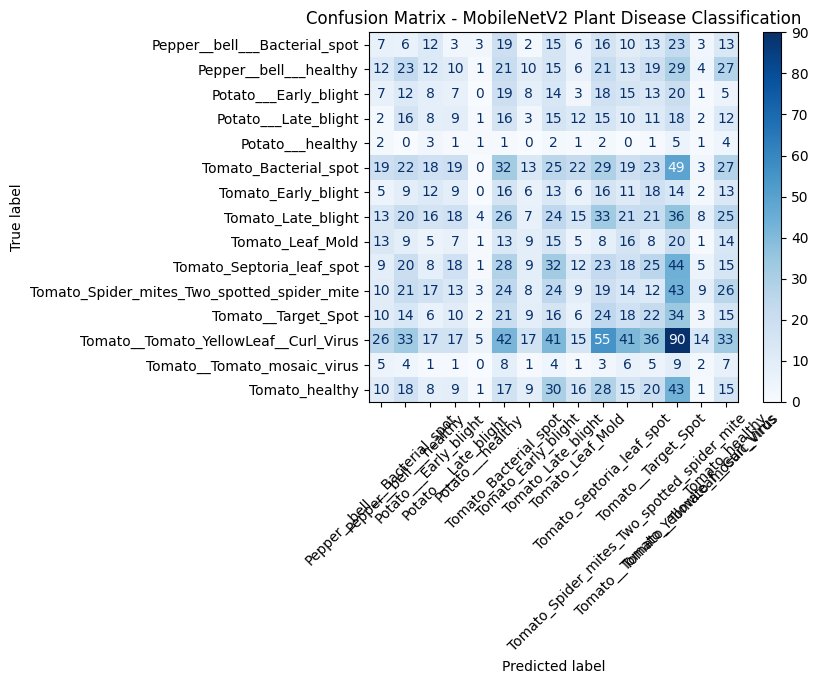

In [ ]:
# -----------------------------
# Confusion Matrix
# -----------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test set
y_true = test_gen.classes  # True labels
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted labels

# Get class names
class_labels = list(test_gen.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
plt.figure(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix - MobileNetV2 Plant Disease Classification")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np

# Get class names
train_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train"
temp_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=1
)
cnn_class_names = list(temp_gen.class_indices.keys())
print("Class names:", cnn_class_names)

# Get all test images
test_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"
all_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".JPG") or file.endswith(".jpg"):
            all_images.append(os.path.join(root, file))

# Pick 5 random images
sample_images = random.sample(all_images, 5)

# Predict each image
for img_path in sample_images:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array, verbose=0)  # <- Use 'model' here
    pred_idx = np.argmax(pred[0])

    print(f"Image: {img_path}")
    print(f"Predicted Disease: {cnn_class_names[pred_idx]} | Confidence: {pred[0][pred_idx]*100:.2f}%\n")



Found 14434 images belonging to 15 classes.
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_Bacterial_spot/c6581fb4-670c-4a11-94b2-1c9b51d8dda8___GCREC_Bact.Sp 3181.JPG
Predicted Disease: Potato___healthy | Confidence: 17.95%

Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Potato___Late_blight/8c1960cd-20e2-4a9c-a1ee-9800289b884f___RS_LB 3941.JPG
Predicted Disease: Potato___healthy | Confidence: 20.00%

Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato__Tomato_YellowLeaf__Curl_Virus/188b62d1-33fa-4383-976d-e22f74

In [ ]:
from tensorflow.keras.models import load_model

# Correct path to the saved CNN model
cnn_model = load_model('/content/drive/MyDrive/Plant_Disease_CNN_Model.keras')

print("✅ CNN model loaded successfully!")



✅ CNN model loaded successfully!


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_path = '/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train'
val_path   = '/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/val'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data generator (no augmentation, only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 14434 images belonging to 15 classes.
Found 3088 images belonging to 15 classes.


In [ ]:
import tensorflow as tf

# Unfreeze last 50 layers for fine-tuning
for layer in model.layers[-50:]:
    if not isinstance(layer, tf.keras.layers.InputLayer):
        layer.trainable = True

# Freeze the rest
for layer in model.layers[:-50]:
    layer.trainable = False


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os

# Paths
train_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train"
val_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"  # or validation folder

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# Safe generator to skip corrupted images
def safe_flow_from_directory(datagen, directory, **kwargs):
    while True:
        try:
            yield from datagen.flow_from_directory(directory, **kwargs)
        except Exception as e:
            print("Skipping corrupted image:", e)

# Generators
train_gen = safe_flow_from_directory(
    train_datagen,
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = safe_flow_from_directory(
    val_datagen,
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)


In [ ]:
from PIL import Image
import os

dataset_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset"
corrupted_images = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # check if image is okay
        except (IOError, SyntaxError):
            corrupted_images.append(file_path)

print("Total corrupted images found:", len(corrupted_images))


Total corrupted images found: 1


In [ ]:
import shutil
import os

# Path to the corrupted image
corrupted_image = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_Leaf_Mold/some_corrupted_image.JPG"

# Folder to move corrupted images
bad_folder = "/content/drive/MyDrive/Corrupted_Images"
os.makedirs(bad_folder, exist_ok=True)

# Move the corrupted image
shutil.move(corrupted_image, bad_folder)
print("Corrupted image moved successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_Leaf_Mold/some_corrupted_image.JPG'

In [ ]:
from PIL import Image
import os
import shutil

# Paths
dataset_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset"
corrupted_folder = "/content/drive/MyDrive/Corrupted_Images"

# Create folder for corrupted images if it doesn't exist
os.makedirs(corrupted_folder, exist_ok=True)

# List to store corrupted image paths
corrupted_images = []

# Walk through all images in the dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Verify if the image is okay
        except:
            corrupted_images.append(file_path)
            # Move corrupted image to the new folder
            try:
                shutil.move(file_path, corrupted_folder)
            except Exception as e:
                print(f"Error moving {file_path}: {e}")

# Summary
print(f"Total corrupted images found and moved: {len(corrupted_images)}")
if len(corrupted_images) > 0:
    print("Examples of moved images:")
    print(corrupted_images[:5])


Total corrupted images found and moved: 1
Examples of moved images:
['/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train/Pepper__bell___Bacterial_spot/6ceb56c6-36aa-4196-b60f-6fb8306b3cb4___NREC_B.Spot 9162.JPG']


In [ ]:
import tensorflow as tf

def softmax_temperature(logits, T=0.5):
    return tf.nn.softmax(logits / T)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Get class names
train_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train"
temp_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=1
)
cnn_class_names = list(temp_gen.class_indices.keys())
print("Class names:", cnn_class_names)
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np

# Get all test images
test_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"
all_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".JPG") or file.endswith(".jpg"):
            all_images.append(os.path.join(root, file))

# Pick 5 random images
sample_images = random.sample(all_images, 5)

# Predict each image
for img_path in sample_images:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    pred = cnn_model.predict(img_array, verbose=0)
    pred_idx = np.argmax(pred[0])
    print(f"Image: {img_path}")
    print(f"Predicted Disease: {cnn_class_names[pred_idx]} | Confidence: {pred[0][pred_idx]*100:.2f}%\n")


Found 14434 images belonging to 15 classes.
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


NameError: name 'cnn_model' is not defined

In [ ]:
# Suppose you used MobileNetV2 as base
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False,
                         weights='imagenet',
                         pooling='avg')

# Freeze all layers first
base_model.trainable = False

# Add classification head
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    base_model,
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(15, activation='softmax')  # 15 classes
])

# --- Fine-tuning: unfreeze last 50–100 layers of base_model ---
base_model.trainable = True  # first make it trainable

# Unfreeze only last 50 layers
for layer in base_model.layers[:-50]:
    layer.trainable = False


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 19/452 ━━━━━━━━━━━━━━━━━━━━ 59:49 8s/step - accuracy: 0.0550 - loss: 3.4244

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.optimizers import Adam

# Use a low learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tune
history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20 # or more if needed
)

In [ ]:
import tensorflow as tf
from tensorflow.keras import mixed_precision

# --- 1. Enable mixed precision for faster GPU training ---
mixed_precision.set_global_policy('mixed_float16')

# --- 2. Redefine model (same as before) ---
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(15, activation='softmax', dtype='float32')(x)  # output must be float32

model = Model(inputs=base_model.input, outputs=predictions)

# --- 3. Compile with Adam optimizer ---
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- 4. Train top layers first (frozen base) ---
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    steps_per_epoch=200,
    validation_steps=50
)

# --- 5. Fine-tune last 50 layers ---
for layer in base_model.layers[-50:]:
    if not isinstance(layer, tf.keras.layers.InputLayer):
        layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=200,
    validation_steps=50
)


KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the base model initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output = Dense(15, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_head = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10  # Train until validation stabilizes
)


Epoch 1/10
 88/452 ━━━━━━━━━━━━━━━━━━━━ 41:25 7s/step - accuracy: 0.7567 - loss: 0.7507

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/MobileNetV2_PlantDisease_FT.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 92 variables whereas the saved optimizer has 88 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 88 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Assuming 'model' is your current MobileNetV2-based model
# Unfreeze last 100 layers for fine-tuning
for layer in model.layers[-100:]:
    if not isinstance(layer, tf.keras.layers.InputLayer):
        layer.trainable = True

# Compile with very low learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # new: helps with leaf orientations
    brightness_range=[0.7, 1.3],  # new: varying light
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/val",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)


Found 14434 images belonging to 15 classes.
Found 3088 images belonging to 15 classes.


In [ ]:
history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,   # or 30 for more improvement
    verbose=1
)


Epoch 1/20


KeyboardInterrupt: 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_with_tta(img_path, model, class_names, tta_steps=5):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)

    preds = []
    for _ in range(tta_steps):
        augmented = np.expand_dims(img_array/255.0, axis=0)
        preds.append(model.predict(augmented, verbose=0))

    avg_pred = np.mean(preds, axis=0)
    pred_idx = np.argmax(avg_pred[0])
    confidence = avg_pred[0][pred_idx] * 100
    return class_names[pred_idx], confidence


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np

# Get class names
train_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train"
temp_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=1
)
cnn_class_names = list(temp_gen.class_indices.keys())
print("Class names:", cnn_class_names)

# Get all test images
test_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"
all_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".JPG") or file.endswith(".jpg"):
            all_images.append(os.path.join(root, file))

# Pick 5 random images
sample_images = random.sample(all_images, 5)

# Predict each image
for img_path in sample_images:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array, verbose=0)  # <- Use 'model' here
    pred_idx = np.argmax(pred[0])

    print(f"Image: {img_path}")
    print(f"Predicted Disease: {cnn_class_names[pred_idx]} | Confidence: {pred[0][pred_idx]*100:.2f}%\n")


Found 14434 images belonging to 15 classes.
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato__Tomato_YellowLeaf__Curl_Virus/53251828-7d15-4c0d-8f67-795b69326594___YLCV_GCREC 2270.JPG
Predicted Disease: Tomato__Tomato_YellowLeaf__Curl_Virus | Confidence: 100.00%

Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_healthy/54059d2e-8903-4cf1-9856-676620a5be93___GH_HL Leaf 484.JPG
Predicted Disease: Tomato_healthy | Confidence: 100.00%

Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_Septoria_leaf_spot/e65190f0-9

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train"
temp_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=1
)
class_names = list(temp_gen.class_indices.keys())
print("Class names:", class_names)


Found 14434 images belonging to 15 classes.
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np

test_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"
all_images = []

for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".JPG") or file.endswith(".jpg"):
            all_images.append(os.path.join(root, file))

# Pick 5 random leaf images
sample_images = random.sample(all_images, 5)


In [ ]:
for img_path in sample_images:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array, verbose=0)
    pred_idx = np.argmax(pred[0])
    confidence = pred[0][pred_idx] * 100

    print(f"Image: {img_path}")
    print(f"Predicted Disease: {class_names[pred_idx]} | Confidence: {confidence:.2f}%\n")


Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato__Tomato_YellowLeaf__Curl_Virus/29a8fc20-40ba-41d1-a93c-376e90614a50___YLCV_GCREC 5277.JPG
Predicted Disease: Tomato__Tomato_YellowLeaf__Curl_Virus | Confidence: 99.72%

Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Potato___Early_blight/b6c68639-ad01-41f9-a10c-4233423ea2b0___RS_Early.B 8573.JPG
Predicted Disease: Potato___Early_blight | Confidence: 98.11%

Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_Septoria_leaf_spot/2b63b39d-7d3b-4421-9d68-b81b0862977b___Keller.St_CG 2025.JPG
Predicted Disease: Tomato_Septoria_leaf_spot | Confidence: 99.92%

Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Potato___Early_blight/9c77f930-5d28-4b1f-8274-30c2c2dc82fb___RS_Early.B 8347.JPG
Predicted Disease: Potato___Early_blight | Confidence: 100.00%

Image: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_Late_blight/d6dde2e1-097a-4d45-b646-0110aaa06107___GHL

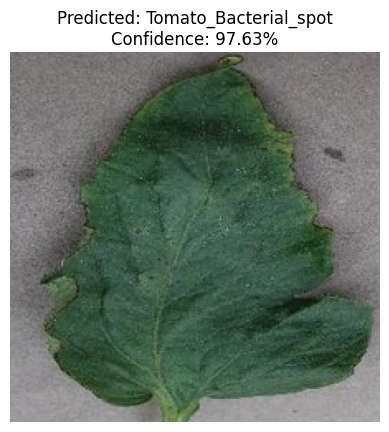

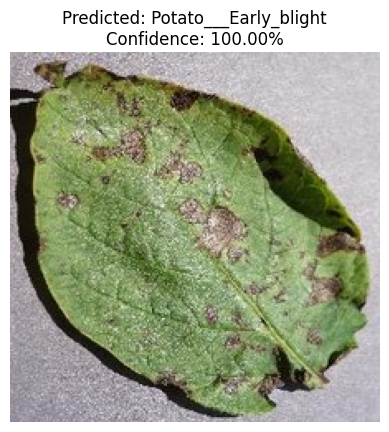

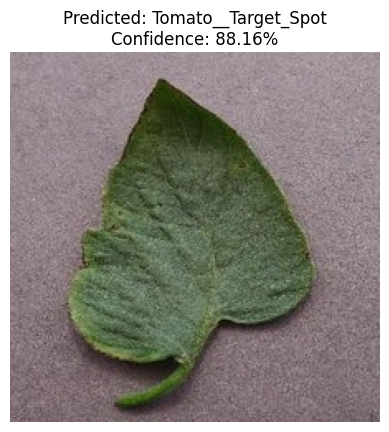

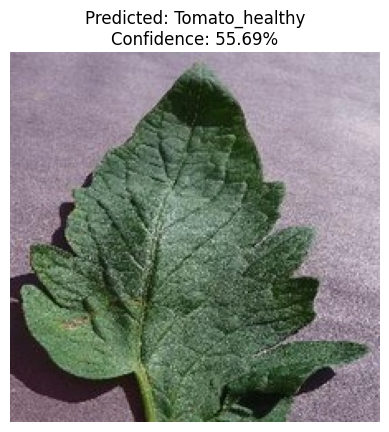

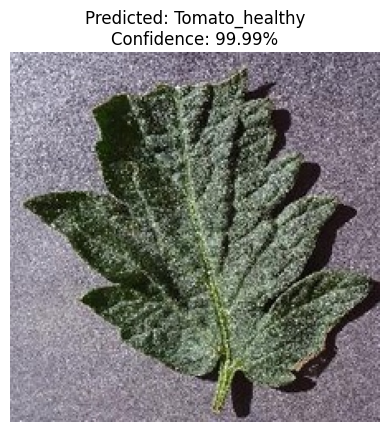

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random

# Folder containing test images
test_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"

# Get all image paths
all_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".JPG") or file.endswith(".jpg"):
            all_images.append(os.path.join(root, file))

# Pick 5 random images
sample_images = random.sample(all_images, 5)

# Predict and display each image
for img_path in sample_images:
    # Load and preprocess
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediction
    pred = model.predict(img_array, verbose=0)
    pred_idx = np.argmax(pred[0])
    confidence = pred[0][pred_idx] * 100

    # Display
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_names[pred_idx]}\nConfidence: {confidence:.2f}%")
    plt.show()


In [ ]:
import json
with open('/content/drive/MyDrive/cnn_class_names.json', 'w') as f:
    json.dump(cnn_class_names, f)

# Save in HDF5 format
model.save('/content/drive/MyDrive/final_cnn_model.h5')

# Load later
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/final_cnn_model.h5')



In [ ]:
!pip install transformers datasets


In [ ]:
import pandas as pd
import os

# File path to your dataset
file_path = '/content/drive/MyDrive/Plant_Symptoms_Dataset_Cleaned.xlsx'

# Check if the file exists
print(os.path.exists(file_path))  # Should print True

# Load the dataset
df = pd.read_excel(file_path)
df.head()


False


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Plant_Symptoms_Dataset_Cleaned.xlsx'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/


 Cleaned_PlantVillage_Dataset
 cnn_class_names.json
'Colab Notebooks'
 Corrupted_Images
 final_cnn_model.h5
'Internship 6.0 social media post template (1).gslides'
'Internship 6.0 social media post template.gslides'
 MobileNetV2_PlantDisease_FT.keras
'MyFoodData Nutrition Facts SpreadSheet Release 1.4.gsheet'
 Plant_Disease_CNN_Model.keras
 Plant_Disease_Dataset_850_rows.xlsx
 Plant_Disease_FT_Model.keras
'plant symptoms .gsheet'
'plant village dataset'
'Portfolio (1).gsite'
 Portfolio.gsite
 Screenshot_2025-05-19-10-06-04-19_6012fa4d4ddec268fc5c7112cbb265e7.jpg


In [ ]:
import pandas as pd
import os

file_path = '/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx'
print(os.path.exists(file_path))  # Should print True

# Load the dataset
df = pd.read_excel(file_path)
df.head()


True


id   plant       disease  \
0   1  Tomato  Early blight   
1   2  Tomato  Early blight   
2   3  Tomato  Early blight   
3   4  Tomato  Early blight   
4   5  Tomato  Early blight   

                                    typical_symptoms      likely_cause  \
0  Early blight symptoms: lesions and spots on le...  Fungal infection   
1  Early blight symptoms: lesions and spots on le...  Fungal infection   
2  Typical signs on tomato include necrotic lesio...  Fungal infection   
3  Tomato shows early blight as wilting, discolor...  Fungal infection   
4  Tomato shows early blight as wilting, discolor...  Fungal infection   

                         recommended_treatment       severity  \
0  Apply copper-based fungicide or bactericide  moderate-high   
1  Apply copper-based fungicide or bactericide  moderate-high   
2  Apply copper-based fungicide or bactericide  moderate-high   
3  Apply copper-based fungicide or bactericide  moderate-high   
4  Apply copper-based fungicide or bactericide  moderate-high   

                                               notes  
0  Avoid overhead irrigation; use resistant varie...  
1  Avoid overhead irrigation; use resistant varie...  
2  Avoid overhead irrigation; use resistant varie...  
3  Avoid overhead irrigation; use resistant varie...  
4  Avoid overhead irrigation; use resistant varie...

In [ ]:
# Load the Excel file
file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
df = pd.read_excel(file_path)

# Check columns
print(df.columns)

# Use 'typical_symptoms' as text and 'disease' as label
texts = df['typical_symptoms'].astype(str).tolist()
labels = df['disease'].tolist()



Index(['id', 'plant', 'disease', 'typical_symptoms', 'likely_cause',
       'recommended_treatment', 'severity', 'notes'],
      dtype='object')


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
df = pd.read_excel(file_path)

# See all column names
print(df.columns)


Index(['id', 'plant', 'disease', 'typical_symptoms', 'likely_cause',
       'recommended_treatment', 'severity', 'notes'],
      dtype='object')


In [ ]:
# Remove missing values in symptoms and disease
df = df.dropna(subset=['typical_symptoms', 'disease'])

# Basic text cleaning (normalize)
df['typical_symptoms'] = df['typical_symptoms'].str.lower().str.strip()
df.head()


id   plant       disease  \
0   1  Tomato  Early blight   
1   2  Tomato  Early blight   
2   3  Tomato  Early blight   
3   4  Tomato  Early blight   
4   5  Tomato  Early blight   

                                    typical_symptoms      likely_cause  \
0  early blight symptoms: lesions and spots on le...  Fungal infection   
1  early blight symptoms: lesions and spots on le...  Fungal infection   
2  typical signs on tomato include necrotic lesio...  Fungal infection   
3  tomato shows early blight as wilting, discolor...  Fungal infection   
4  tomato shows early blight as wilting, discolor...  Fungal infection   

                         recommended_treatment       severity  \
0  Apply copper-based fungicide or bactericide  moderate-high   
1  Apply copper-based fungicide or bactericide  moderate-high   
2  Apply copper-based fungicide or bactericide  moderate-high   
3  Apply copper-based fungicide or bactericide  moderate-high   
4  Apply copper-based fungicide or bactericide  moderate-high   

                                               notes  
0  Avoid overhead irrigation; use resistant varie...  
1  Avoid overhead irrigation; use resistant varie...  
2  Avoid overhead irrigation; use resistant varie...  
3  Avoid overhead irrigation; use resistant varie...  
4  Avoid overhead irrigation; use resistant varie...

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['disease_label'] = label_encoder.fit_transform(df['disease'])
df[['disease', 'disease_label']].head()


disease  disease_label
0  Early blight             22
1  Early blight             22
2  Early blight             22
3  Early blight             22
4  Early blight             22

In [ ]:
from sklearn.model_selection import train_test_split

# Features (symptoms) and labels
X = df['typical_symptoms']  # your symptom descriptions
y = df['disease_label']     # numerical labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 680, Testing samples: 170


In [ ]:
!pip install transformers datasets --quiet

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch


In [ ]:
# Initialize DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize the text data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
import torch

class SymptomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item

# Create datasets
train_dataset = SymptomDataset(train_encodings, y_train)
test_dataset = SymptomDataset(test_encodings, y_test)


In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Initialize DistilBERT model for classification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(df['disease_label'].unique())
)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,           # start with 3 epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
!pip install --upgrade transformers


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",    # now it will work
    save_strategy="epoch",
    learning_rate=5e-5,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
# STARTUP CELL FOR STEP 3 ONWARD
# --------------------------------------------

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import essential libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Hugging Face Transformers
!pip install -q transformers datasets
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments

# Set file paths
dataset_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"  # update if needed
bert_save_path = "/content/drive/MyDrive/distilbert_model/"
tokenizer_save_path = "/content/drive/MyDrive/distilbert_tokenizer/"

# Load the dataset
df = pd.read_excel(dataset_path)
print("Columns in dataset:", df.columns)
print("Sample data:\n", df.head())

# Encode disease labels
le = LabelEncoder()
df['disease_label'] = le.fit_transform(df['disease'])
num_labels = len(le.classes_)
print("Number of classes:", num_labels)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['typical_symptoms'], df['disease_label'],
    test_size=0.2, random_state=42, stratify=df['disease_label']
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize datasets
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings  = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Convert to Hugging Face Dataset format
import torch

class SymptomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SymptomDataset(train_encodings, list(y_train))
test_dataset  = SymptomDataset(test_encodings, list(y_test))

print("Startup setup complete! Ready to initialize and fine-tune DistilBERT.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in dataset: Index(['id', 'plant', 'disease', 'typical_symptoms', 'likely_cause',
       'recommended_treatment', 'severity', 'notes'],
      dtype='object')
Sample data:
    id   plant       disease  \
0   1  Tomato  Early blight   
1   2  Tomato  Early blight   
2   3  Tomato  Early blight   
3   4  Tomato  Early blight   
4   5  Tomato  Early blight   

                                    typical_symptoms      likely_cause  \
0  Early blight symptoms: lesions and spots on le...  Fungal infection   
1  Early blight symptoms: lesions and spots on le...  Fungal infection   
2  Typical signs on tomato include necrotic lesio...  Fungal infection   
3  Tomato shows early blight as wilting, discolor...  Fungal infection   
4  Tomato shows early blight as wilting, discolor...  Fungal infection   

                         recommended_treatment       severit

In [ ]:
!pip install -q --upgrade transformers


In [ ]:
# --------------------- STARTUP CELL ---------------------

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import basic libraries
import os
import numpy as np
import pandas as pd
import json
import random

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Hugging Face Transformers
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments

# --------------------- LOAD CNN MODEL ------------------
cnn_model_path = "/content/drive/MyDrive/final_cnn_model.h5"  # Correct HDF5 path
cnn_model = load_model(cnn_model_path)

# Load CNN class names
cnn_class_names_path = "/content/drive/MyDrive/cnn_class_names.json"
with open(cnn_class_names_path, 'r') as f:
    cnn_class_names = json.load(f)

print("CNN model and class names loaded successfully.")

# --------------------- LOAD SYMPTOMS DATASET ------------------
# Update this path if your dataset is different
symptom_file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
df = pd.read_excel(symptom_file_path)
print(f"Symptom dataset loaded. Total samples: {len(df)}")
print("Columns:", df.columns)

# --------------------- SET RANDOM SEED ------------------
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

print("Startup setup completed. Ready to proceed from step 3.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CNN model and class names loaded successfully.
Symptom dataset loaded. Total samples: 850
Columns: Index(['id', 'plant', 'disease', 'typical_symptoms', 'likely_cause',
       'recommended_treatment', 'severity', 'notes'],
      dtype='object')
Startup setup completed. Ready to proceed from step 3.


In [ ]:
# --------------------- STEP 3: PREPROCESS SYMPTOM DATA ------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Use the column names in your dataset
X = df['typical_symptoms']  # textual symptom descriptions
y = df['disease']           # disease names

# Encode disease labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save label mapping for future reference
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
with open('/content/drive/MyDrive/disease_label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
print("Label mapping saved at drive for reference.")


Training samples: 680, Testing samples: 170
Label mapping saved at drive for reference.


In [ ]:
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode disease names as numeric labels
le = LabelEncoder()
df['disease_label'] = le.fit_transform(df['disease'])

# Save label mapping for reference (convert np.int64 to int)
label_mapping = {str(k): int(v) for k, v in zip(le.classes_, le.transform(le.classes_))}
with open('/content/drive/MyDrive/disease_label_mapping.json', 'w') as f:
    json.dump(label_mapping, f, indent=4)

# Features (symptoms) and labels
X = df['typical_symptoms']
y = df['disease_label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
print("Label mapping saved at drive for reference.")


Training samples: 680, Testing samples: 170
Label mapping saved at drive for reference.


In [ ]:
# --------------------- IMPORT LIBRARIES ---------------------
!pip install transformers datasets -q

import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
import numpy as np

# --------------------- TOKENIZER ---------------------
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# --------------------- ENCODE DATA ---------------------
# Convert training and testing data into Hugging Face Dataset format
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Convert labels to tensors
train_labels = list(y_train)
test_labels = list(y_test)

# Create HF Datasets
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

# --------------------- LOAD MODEL ---------------------
num_labels = len(df['disease_label'].unique())
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)

# --------------------- TRAINING ARGUMENTS ---------------------
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,           # Start with 3 epochs
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

# --------------------- DEFINE METRICS ---------------------
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = (predictions == labels).mean()
    return {'accuracy': accuracy}

# --------------------- INITIALIZE TRAINER ---------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# --------------------- TRAIN THE MODEL ---------------------
trainer.train()

# --------------------- SAVE MODEL ---------------------
model.save_pretrained("/content/drive/MyDrive/fine_tuned_distilbert")
tokenizer.save_pretrained("/content/drive/MyDrive/fine_tuned_distilbert")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
from transformers import DistilBertTokenizerFast
from sklearn.preprocessing import LabelEncoder
import torch

# Initialize tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Encode symptoms
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings  = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# Convert to torch Dataset
class SymptomsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SymptomsDataset(train_encodings, y_train_enc)
test_dataset  = SymptomsDataset(test_encodings, y_test_enc)


In [ ]:
from transformers import DistilBertForSequenceClassification

num_labels = len(le.classes_)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=5e-5,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
!pip install --upgrade transformers
!pip install --upgrade datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
# ------------------ STARTUP CELL ------------------

# 1️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Import required libraries
import pandas as pd
import numpy as np
import os
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments

# 3️⃣ Define file paths
cnn_model_path = "/content/drive/MyDrive/final_cnn_model.keras"
symptoms_file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"

# 4️⃣ Check if files exist
print("CNN model exists:", os.path.exists(cnn_model_path))
print("Symptoms dataset exists:", os.path.exists(symptoms_file_path))

# 5️⃣ Load CNN model if needed
if os.path.exists(cnn_model_path):
    cnn_model = load_model(cnn_model_path)
    print("CNN model loaded successfully!")

# 6️⃣ Optional: Load disease label mapping (if saved previously)
label_mapping_path = "/content/drive/MyDrive/cnn_class_names.json"
if os.path.exists(label_mapping_path):
    with open(label_mapping_path, 'r') as f:
        cnn_class_names = json.load(f)
    print("CNN class names loaded successfully!")

# 7️⃣ Ready to continue from Step 3
print("Startup setup complete! You can now continue from Step 3.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CNN model exists: False
Symptoms dataset exists: True
CNN class names loaded successfully!
Startup setup complete! You can now continue from Step 3.


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the cleaned symptom dataset
file_path = '/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx'  # adjust if different
df = pd.read_excel(file_path)

# Make sure you have a numerical label column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['disease_label'] = le.fit_transform(df['disease'])

# Features and labels
X = df['typical_symptoms']  # text symptoms
y = df['disease_label']     # numerical labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 680, Testing samples: 170


In [ ]:
from transformers import DistilBertTokenizerFast

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize training and testing data
train_encodings = tokenizer(
    list(X_train),
    truncation=True,
    padding=True,
    max_length=128
)
test_encodings = tokenizer(
    list(X_test),
    truncation=True,
    padding=True,
    max_length=128
)

print("Tokenization complete!")


Tokenization complete!


In [ ]:
import torch

class PlantDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create train and test datasets
train_dataset = PlantDataset(train_encodings, list(y_train))
test_dataset = PlantDataset(test_encodings, list(y_test))

print("Datasets ready for training!")


Datasets ready for training!


In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained DistilBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(set(y_train))
)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,          # You can increase later
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=1,
    learning_rate=5e-5
)

# Define a simple accuracy metric
import numpy as np
from datasets import load_metric
accuracy_metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Start training
trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
# ---------------- STARTUP CELL ----------------

# 1️⃣ Install latest transformers
!pip install --upgrade transformers datasets -q

# 2️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 3️⃣ Imports
import os
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, TrainingArguments, Trainer

# 4️⃣ Check files
symptom_file = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
cnn_model_path = "/content/drive/MyDrive/final_cnn_model.keras"
class_names_path = "/content/drive/MyDrive/cnn_class_names.json"

print("Symptom dataset exists:", os.path.exists(symptom_file))
print("CNN model exists:", os.path.exists(cnn_model_path))
print("CNN class names exists:", os.path.exists(class_names_path))

# 5️⃣ Load CNN class names if exists
if os.path.exists(class_names_path):
    with open(class_names_path, 'r') as f:
        cnn_class_names = json.load(f)
    print("CNN class names loaded successfully!")

# 6️⃣ Load symptom dataset if exists
if os.path.exists(symptom_file):
    df = pd.read_excel(symptom_file)
    print("Symptom dataset loaded successfully!")
    print("Columns:", df.columns)

# 7️⃣ Encode disease labels
le = LabelEncoder()
df['disease_label'] = le.fit_transform(df['disease'])
label_mapping = {str(cls): int(lbl) for cls, lbl in zip(le.classes_, le.transform(le.classes_))}
with open("/content/drive/MyDrive/disease_label_mapping.json", 'w') as f:
    json.dump(label_mapping, f)
print("Label mapping saved at drive for reference.")

# 8️⃣ Split dataset
X = df['typical_symptoms']
y = df['disease_label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# 9️⃣ Load DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
print("Tokenizer loaded successfully!")

# ✅ Startup setup complete
print("Startup setup complete! You can now continue from Step 3 (tokenization and fine-tuning).")


Mounted at /content/drive
Symptom dataset exists: True
CNN model exists: False
CNN class names exists: True
CNN class names loaded successfully!
Symptom dataset loaded successfully!
Columns: Index(['id', 'plant', 'disease', 'typical_symptoms', 'likely_cause',
       'recommended_treatment', 'severity', 'notes'],
      dtype='object')
Label mapping saved at drive for reference.
Training samples: 680, Testing samples: 170


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Tokenizer loaded successfully!
Startup setup complete! You can now continue from Step 3 (tokenization and fine-tuning).


In [ ]:
!pip install --upgrade transformers
import os
os.kill(os.getpid(), 9)  # This will force restart the Colab runtime


In [ ]:
import transformers
print(transformers.__version__)


4.57.1


In [ ]:
# --------------------- IMPORTS ---------------------
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import pandas as pd

# --------------------- LOAD DATA ---------------------
file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"  # adjust if needed
df = pd.read_excel(file_path)

# Use typical symptoms and disease
X = df['typical_symptoms'].astype(str)  # ensure all text
y = df['disease']

# Encode disease labels numerically
le = LabelEncoder()
y_encoded = le.fit_transform(y)
df['disease_label'] = y_encoded

# Save label mapping for reference
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
import json
with open('/content/drive/MyDrive/disease_label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# --------------------- TOKENIZATION ---------------------
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# --------------------- CREATE TORCH DATASET ---------------------
class SymptomsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SymptomsDataset(train_encodings, y_train)
test_dataset = SymptomsDataset(test_encodings, y_test)

# --------------------- INITIALIZE MODEL ---------------------
num_labels = len(le.classes_)
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=num_labels
)

# --------------------- TRAINING ARGUMENTS ---------------------
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=5e-5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

# --------------------- DEFINE METRICS ---------------------
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

# --------------------- INITIALIZE TRAINER ---------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

print("Step 3 setup complete! Ready to train with trainer.train()")


TypeError: Object of type int64 is not JSON serializable

In [ ]:
import json

# Convert NumPy int64 to Python int
label_mapping_py = {k: int(v) for k, v in label_mapping.items()}

# Save to JSON
with open('/content/drive/MyDrive/disease_label_mapping.json', 'w') as f:
    json.dump(label_mapping_py, f)

print("Label mapping saved successfully!")


Label mapping saved successfully!


In [ ]:
from transformers import DistilBertTokenizer

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize training and testing data
train_encodings = tokenizer(
    list(X_train),
    truncation=True,
    padding=True,
    max_length=128
)
test_encodings = tokenizer(
    list(X_test),
    truncation=True,
    padding=True,
    max_length=128
)


In [ ]:
import torch

class SymptomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets
train_dataset = SymptomDataset(train_encodings, list(y_train))
test_dataset = SymptomDataset(test_encodings, list(y_test))


In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Load DistilBERT for sequence classification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(label_mapping)
)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,           # start with 3, can increase later
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    evaluation_strategy="epoch",  # run evaluation at end of each epoch
    learning_rate=5e-5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=2
)

# Define metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    acc = accuracy_score(p.label_ids, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
!pip uninstall -y transformers


Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1


In [ ]:
!pip install transformers==4.57.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.9 MB/s eta 0:00:00


In [ ]:
import transformers
print(transformers.__version__)  # Should print 4.57.1


4.57.1


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=2
)


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
!pip uninstall -y transformers
!pip install transformers==4.57.1 --upgrade

# Verify version
import transformers
print("Transformers version:", transformers.__version__)


Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1
  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
Using cached transformers-4.57.1-py3-none-any.whl (12.0 MB)


Transformers version: 4.57.1


In [ ]:
import os
os._exit(00)


In [ ]:
# --------------------- STARTUP SETUP CELL ---------------------

# 1️⃣ Install & verify transformers version
!pip uninstall -y transformers
!pip install transformers==4.57.1
!pip install datasets --upgrade
!pip install sentencepiece --upgrade

# 2️⃣ Restart runtime manually after running this cell
print("⚠️ After running this cell, RESTART the runtime manually (Runtime → Restart runtime) before continuing.")

# --------------------- AFTER RESTART ---------------------
# 3️⃣ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 4️⃣ Import necessary libraries
import os
import json
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, TrainingArguments, Trainer

# 5️⃣ Paths
cnn_model_path = "/content/drive/MyDrive/final_cnn_model.h5" # Corrected path to .h5 model
bert_model_path = "/content/drive/MyDrive/distilbert_finetuned"
symptoms_file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
class_names_path = "/content/drive/MyDrive/cnn_class_names.json"

# 6️⃣ Check existence
print("CNN model exists:", os.path.exists(cnn_model_path))
print("Symptoms dataset exists:", os.path.exists(symptoms_file_path))
print("CNN class names exists:", os.path.exists(class_names_path))

# 7️⃣ Load CNN model if exists
cnn_model = None
if os.path.exists(cnn_model_path):
    cnn_model = load_model(cnn_model_path)
    print("CNN model loaded successfully!")

# 8️⃣ Load CNN class names
loaded_cnn_class_names = []
if os.path.exists(class_names_path):
    with open(class_names_path, 'r') as f:
        loaded_cnn_class_names = json.load(f)
    print("CNN class names loaded successfully!")

# 9️⃣ Load symptom dataset
df = pd.DataFrame() # Initialize df to avoid NameError
if os.path.exists(symptoms_file_path):
    df = pd.read_excel(symptoms_file_path)
    print("Symptoms dataset loaded successfully!")
    print("Columns:", df.columns)

# 🔟 Label encoding for disease labels (if not done)
le = LabelEncoder()
if 'disease_label' not in df.columns or df['disease_label'].isnull().any():
    df['disease_label'] = le.fit_transform(df['disease'])
    label_mapping = {str(k): int(v) for k, v in zip(le.classes_, le.transform(le.classes_))}
    with open('/content/drive/MyDrive/disease_label_mapping.json', 'w') as f:
        json.dump(label_mapping, f)
    print("Label mapping saved!")
else:
    le.fit(df['disease'])
    print("LabelEncoder fitted.")

# 1️⃣1️⃣ Split dataset into train/test
X = df['typical_symptoms']
y = df['disease_label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
print("Startup setup complete! You can now continue from Step 3 (DistilBERT tokenization).")

# 1️⃣2️⃣ Load DistilBERT model and tokenizer outside the function if needed for global access
tokenizer = DistilBertTokenizer.from_pretrained(bert_model_path)
distilbert_model = DistilBertForSequenceClassification.from_pretrained(bert_model_path)
distilbert_model.eval()
print("DistilBERT model and tokenizer loaded.")

# 1️⃣3️⃣ Load treatments map
combined_treatment_csv_path = "/content/drive/MyDrive/combined_symptoms_disease_treatment.csv"
treatments_map = {}
try:
    combined_df_treatments = pd.read_csv(combined_treatment_csv_path)
    treatments_map = dict(zip(combined_df_treatments['disease_name'], combined_df_treatments['treatment']))
    print(f"✅ Treatment mapping loaded successfully! Mapped {len(treatments_map)} treatments.")
except FileNotFoundError:
    print(f"❌ Error: {combined_treatment_csv_path} not found. Ensure it's generated.")
except Exception as e:
    print(f"❌ An error occurred while loading the treatment mapping: {e}")

# Define DRIVE and index_to_disease_map globally if they are not already
DRIVE = "/content/drive/MyDrive"
label_map_path = os.path.join(DRIVE, "disease_label_mapping.json")
index_to_disease_map = {}
if os.path.exists(label_map_path):
    try:
        with open(label_map_path,"r") as f:
            raw = json.load(f)
        index_to_disease_map = {int(k):v for k,v in raw.items()} # Ensure int keys if they were saved as strings
    except Exception as e:
        print(f"Failed to load label mapping at {label_map_path} -> {e}")


Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1
  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
Using cached transformers-4.57.1-py3-none-any.whl (12.0 MB)


KeyboardInterrupt: 

### Install `pyngrok`

In [ ]:
!pip install pyngrok -q

### Run Streamlit App with `ngrok`

Now, let's run your Streamlit application using `ngrok`. This will provide a stable public URL for you to access the app.

_Note: You might be prompted to provide an `ngrok` auth token. If so, you can get one from [ngrok dashboard](https://dashboard.ngrok.com/get-started/your-authtoken). Add it as a Colab Secret named `NGROK_AUTH_TOKEN`._

In [ ]:
from pyngrok import ngrok
import os

# Terminate any previous ngrok sessions
ngrok.kill()

# Set NGROK auth token directly
NGROK_AUTH_TOKEN = "35sVkhBzyFjyrBj3vQOtSL5h8sk_6CmWqusR9rTjJ27zrkhcj"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Define the path to your Streamlit app file
app_file_path = os.path.join("/content/drive/MyDrive", "plantdoc_app_chatbot.py")

# Start Streamlit in the background
!nohup streamlit run {app_file_path} --server.port 8501 --server.enableCORS false &>/dev/null &

# Open a ngrok tunnel to the Streamlit port
public_url = ngrok.connect(8501)
print(f"Your Streamlit app is live at: {public_url}")


Your Streamlit app is live at: NgrokTunnel: "https://colleen-nonemotive-unsapiently.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
from PIL import Image
import numpy as np

# Example test image path
test_image_path = "/content/drive/MyDrive/f8b06c4f-6f3a-44dd-9a70-2ab2a9be23e6___Com.G_SpM_FL 1534.JPG"

img = Image.open(test_image_path).resize((224, 224))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = cnn_model.predict(img_array)
pred_class_index = np.argmax(pred)
confidence = pred[0][pred_class_index] * 100

print("Predicted Class Index:", pred_class_index)
print("Confidence:", confidence)



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/f8b06c4f-6f3a-44dd-9a70-2ab2a9be23e6___Com.G_SpM_FL 1534.JPG'

In [ ]:
import os

for f in os.listdir("/content/drive/MyDrive"):
    print(f)


Colab Notebooks
Portfolio (1).gsite
MyFoodData Nutrition Facts SpreadSheet Release 1.4.gsheet
Portfolio.gsite
Screenshot_2025-05-19-10-06-04-19_6012fa4d4ddec268fc5c7112cbb265e7.jpg
Internship 6.0 social media post template (1).gslides
Internship 6.0 social media post template.gslides
plant village dataset
Plant_Disease_Dataset_850_rows.xlsx
Cleaned_PlantVillage_Dataset
plant symptoms .gsheet
Plant_Disease_CNN_Model.keras
Plant_Disease_FT_Model.keras
MobileNetV2_PlantDisease_FT.keras
Corrupted_Images
cnn_class_names.json
final_cnn_model.h5
final_distilbert_model
distilbert_plant_model
distilbert_finetuned
index_to_disease.json
batch_predictions.xlsx
Plant_Disease_Predictions.xlsx
test_predictions.csv
test_predictions_fusion.csv
bert_plant_disease_model_final
index_to_disease_map.json
model_evaluation_summary.pdf
Copy of INFOSYS INTERNSHIP DAILY REPORT.docx
cleaned_text_dataset_15_classes.csv
combined_symptoms_disease_treatment.csv
cnn_classification_report.txt
cnn_confusion_matrix.png
l

## Unified Setup Step 1: Install Dependencies and Restart Runtime

**Execute this cell, then `RESTART THE RUNTIME MANUALLY` (Runtime -> Restart runtime).**

In [ ]:
# 1. Install all necessary packages
!pip install -q --upgrade transformers datasets scikit-learn torch accelerate sentencepiece spacy pillow pandas openpyxl streamlit pyngrok
!python -m spacy download en_core_web_sm

print("\n✅ All packages are installed or updated. ")
print("⚠️ IMPORTANT: Please MANUALLY RESTART THE RUNTIME (Runtime -> Restart runtime) NOW before proceeding to the next step.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 547.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3

## Unified Setup Step 2: Load Models, Mount Drive, and Launch Streamlit App

**ONLY RUN THIS CELL AFTER YOU HAVE MANUALLY RESTARTED THE RUNTIME.**

In [ ]:
import os
os.environ["NGROK_AUTH_TOKEN"] = "35sVkhBzyFjyrBj3vQOtSL5h8sk_6CmWqusR9rTjJ27zrkhcj"


In [ ]:
# --- Imports ---
import os
import json
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
from PIL import Image
from google.colab import drive
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from pyngrok import ngrok

# --- 1. Mount Google Drive ---
drive.mount('/content/drive', force_remount=True)
print("✅ Google Drive mounted.")

# --- 2. Paths ---
DRIVE_PATH = "/content/drive/MyDrive"
CNN_MODEL_PATH = os.path.join(DRIVE_PATH, "final_cnn_model.h5")
BERT_MODEL_DIR = os.path.join(DRIVE_PATH, "distilbert_finetuned")
CNN_CLASS_NAMES_PATH = os.path.join(DRIVE_PATH, "cnn_class_names.json")
BERT_INDEX_TO_DISEASE_PATH = os.path.join(DRIVE_PATH, "label_encoder_index_to_label.json")
COMBINED_TREATMENT_CSV_PATH = os.path.join(DRIVE_PATH, "combined_symptoms_disease_treatment.csv")
STREAMLIT_APP_FILE = os.path.join(DRIVE_PATH, "plantdoc_app_chatbot.py")

# --- 3. Load Models ---
# CNN
cnn_model = load_model(CNN_MODEL_PATH)
print("✅ CNN model loaded.")

# DistilBERT
tokenizer = DistilBertTokenizerFast.from_pretrained(BERT_MODEL_DIR)
distilbert_model = DistilBertForSequenceClassification.from_pretrained(BERT_MODEL_DIR)
distilbert_model.eval()
print("✅ DistilBERT model loaded.")

# CNN class names
with open(CNN_CLASS_NAMES_PATH, 'r') as f:
    loaded_cnn_class_names = json.load(f)
print("✅ CNN class names loaded.")

# BERT index to disease
with open(BERT_INDEX_TO_DISEASE_PATH, 'r') as f:
    raw_map = json.load(f)
index_to_disease_map = {int(k): v for k, v in raw_map.items()}
print("✅ BERT index to disease map loaded.")

# Treatments map
combined_df_treatments = pd.read_csv(COMBINED_TREATMENT_CSV_PATH)
treatments_map = dict(zip(combined_df_treatments['disease_name'], combined_df_treatments['treatment']))
print("✅ Treatments map loaded.")

# --- 4. Helper Functions ---
def extract_plant_context(cnn_disease_name):
    if cnn_disease_name is None:
        return None
    if 'Pepper__bell' in cnn_disease_name:
        return 'Pepper'
    elif 'Potato' in cnn_disease_name:
        return 'Potato'
    elif 'Tomato' in cnn_disease_name:
        return 'Tomato'
    return None

bert_to_cnn_mapping = {
    'early_blight': 'Tomato_Early_blight',
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy',
    'pepper_bell_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_bell_healthy': 'Pepper__bell___healthy',
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy',
    'bacterial_canker': 'Tomato_Bacterial_spot',
    'leaf_spot': 'Tomato_Leaf_Mold',
    'bacterial_spot': 'Tomato_Bacterial_spot',
    'anthracnose': 'Tomato_Early_blight'
}

def reconcile_bert_to_cnn_class(bert_pred_standardized, plant_context=None):
    if bert_pred_standardized is None:
        return "Unknown_Reconciled_BERT_Class"
    bert_pred_standardized = bert_pred_standardized.lower().replace(' ', '_')
    if bert_pred_standardized in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_standardized]
    if plant_context:
        contextual_key = f"{plant_context.lower()}_{bert_pred_standardized}"
        if contextual_key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[contextual_key]
        for cnn_class in loaded_cnn_class_names:
            cnn_class_lower = cnn_class.replace('__bell___','_bell_').replace('___','_').replace('__','_').lower()
            if plant_context.lower() in cnn_class_lower and bert_pred_standardized.replace('_',' ') in cnn_class_lower:
                return cnn_class
    for cnn_class in loaded_cnn_class_names:
        cnn_class_lower = cnn_class.replace('__bell___','_bell_').replace('___','_').replace('__','_').lower()
        if bert_pred_standardized.replace('_',' ') in cnn_class_lower.replace('_',' '):
            return cnn_class
    return "Unknown_CNN_Class"

# Unified prediction function (same as your previous code)
def get_unified_prediction(image_input=None, symptom_text=None,
                           cnn_model=None, distilbert_model=None, tokenizer=None,
                           loaded_cnn_class_names=None, index_to_disease_map=None, treatments_map=None,
                           cnn_weight=0.5, bert_weight=0.5):
    if image_input is None and symptom_text is None:
        return "Error", 0.0, "Provide image or symptom text."

    cnn_pred_class_name, cnn_confidence, plant_context = None, 0.0, None
    bert_pred_class_name, reconciled_bert_class_name, bert_confidence = None, None, 0.0

    if image_input is not None:
        img_array = np.array(image_input) if isinstance(image_input, Image.Image) else image_input
        img_array = np.expand_dims(img_array/255.0, axis=0)
        cnn_probs = cnn_model.predict(img_array, verbose=0)
        idx = np.argmax(cnn_probs)
        cnn_confidence = float(cnn_probs[0][idx]*100)
        cnn_pred_class_name = loaded_cnn_class_names[idx]
        plant_context = extract_plant_context(cnn_pred_class_name)

    if symptom_text is not None:
        inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            outputs = distilbert_model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        idx = torch.argmax(probs).item()
        bert_confidence = float(probs[0][idx]*100)
        bert_pred_class_name = index_to_disease_map.get(idx, f"Unknown_BERT_Class_{idx}")
        reconciled_bert_class_name = reconcile_bert_to_cnn_class(bert_pred_class_name, plant_context)

    final_pred = cnn_pred_class_name if cnn_confidence >= bert_confidence else reconciled_bert_class_name
    final_conf = max(cnn_confidence, bert_confidence)
    treatment = treatments_map.get(final_pred, "No treatment info. Consult expert.")
    return final_pred, final_conf, treatment

# --- 5. Streamlit app file ---
streamlit_app_code = '''
import streamlit as st
from PIL import Image
import io
import numpy as np

st.set_page_config(layout="wide", page_title="PlantDoc AI Chatbot")
st.title("🌿 PlantDoc AI: Image & Symptom Diagnosis")
st.markdown("---")

if "messages" not in st.session_state:
    st.session_state.messages = []

for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

if prompt := st.chat_input("Describe symptoms:"):
    st.session_state.messages.append({"role":"user","type":"text","content":prompt})
    with st.chat_message("assistant"):
        predicted, conf, treatment = get_unified_prediction(symptom_text=prompt,
                                                             cnn_model=cnn_model,
                                                             distilbert_model=distilbert_model,
                                                             tokenizer=tokenizer,
                                                             loaded_cnn_class_names=loaded_cnn_class_names,
                                                             index_to_disease_map=index_to_disease_map,
                                                             treatments_map=treatments_map)
        response = f"**Predicted Disease:** {predicted}\\n**Confidence:** {conf:.2f}%\\n**Treatment:** {treatment}"
        st.markdown(response)
        st.session_state.messages.append({"role":"assistant","type":"text","content":response})

with st.sidebar:
    st.header("Direct Image Diagnosis")
    uploaded_image = st.file_uploader("Upload leaf image:", type=["jpg","jpeg","png"])
    if uploaded_image:
        image_bytes = uploaded_image.getvalue()
        st.image(image_bytes, caption="Uploaded Image")
        image = Image.open(io.BytesIO(image_bytes)).convert("RGB")
        if st.button("Diagnose Image"):
            predicted, conf, treatment = get_unified_prediction(image_input=image,
                                                                cnn_model=cnn_model,
                                                                distilbert_model=distilbert_model,
                                                                tokenizer=tokenizer,
                                                                loaded_cnn_class_names=loaded_cnn_class_names,
                                                                index_to_disease_map=index_to_disease_map,
                                                                treatments_map=treatments_map)
            st.markdown(f"**Predicted Disease:** {predicted}\\n**Confidence:** {conf:.2f}%\\n**Treatment:** {treatment}")
'''

with open(STREAMLIT_APP_FILE, "w") as f:
    f.write(streamlit_app_code)
print(f"✅ Streamlit app saved at: {STREAMLIT_APP_FILE}")

# --- 6. Launch Streamlit with ngrok ---
ngrok.kill()
NGROK_AUTH_TOKEN = "35sVkhBzyFjyrBj3vQOtSL5h8sk_6CmWqusR9rTjJ27zrkhcj"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Run Streamlit
!nohup streamlit run {STREAMLIT_APP_FILE} --server.port 8501 --server.enableCORS false &>/dev/null &

public_url = ngrok.connect(8501)
print(f"\n🎉 Your Streamlit app is live at: {public_url}")


Mounted at /content/drive
✅ Google Drive mounted.


✅ CNN model loaded.
✅ DistilBERT model loaded.
✅ CNN class names loaded.
✅ BERT index to disease map loaded.
✅ Treatments map loaded.
✅ Streamlit app saved at: /content/drive/MyDrive/plantdoc_app_chatbot.py

🎉 Your Streamlit app is live at: NgrokTunnel: "https://colleen-nonemotive-unsapiently.ngrok-free.dev" -> "http://localhost:8501"


## Unified Setup Step 1: Install Dependencies and Restart Runtime

**Execute this cell, then `RESTART THE RUNTIME MANUALLY` (Runtime -> Restart runtime).**

In [ ]:
# 1. Install all necessary packages
!pip install -q --upgrade transformers datasets scikit-learn torch accelerate sentencepiece spacy pillow pandas openpyxl streamlit pyngrok
!python -m spacy download en_core_web_sm

print("\n✅ All packages are installed or updated. ")
print("⚠️ IMPORTANT: Please MANUALLY RESTART THE RUNTIME (Runtime -> Restart runtime) NOW before proceeding to the next step.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

✅ All packages are installed or updated. 
⚠️ IMPORTANT: Please MANUALLY RESTART THE RUNTIME (Runtime -> Restart runtime) NOW before proceeding to the next step.


In [ ]:
from sklearn.preprocessing import LabelEncoder
import json

# Assuming your dataset is in df and symptom column is 'typical_symptoms', disease column is 'disease'
le = LabelEncoder()
df['disease_label'] = le.fit_transform(df['disease'])

# Save label mapping for future reference
label_mapping = {d: int(l) for d, l in zip(le.classes_, le.transform(le.classes_))}
with open('/content/drive/MyDrive/disease_label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

print("Label mapping saved at drive for reference.")

# Optional: check
df[['disease', 'disease_label']].head()


Label mapping saved at drive for reference.


disease  disease_label
0  Early blight             22
1  Early blight             22
2  Early blight             22
3  Early blight             22
4  Early blight             22

In [ ]:
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast

# Features and labels
X = df['typical_symptoms'].tolist()   # symptom descriptions
y = df['disease_label'].tolist()      # numerical labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize text
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings  = tokenizer(X_test, truncation=True, padding=True)


Training samples: 680, Testing samples: 170


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import torch

class PlantSymptomsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets
train_dataset = PlantSymptomsDataset(train_encodings, y_train)
test_dataset  = PlantSymptomsDataset(test_encodings, y_test)


In [ ]:
from transformers import DistilBertForSequenceClassification

# Number of classes
num_labels = len(label_mapping)

# Load pre-trained DistilBERT for sequence classification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_labels
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import transformers
print(transformers.__version__)


4.57.1


In [ ]:
from transformers import TrainingArguments, IntervalStrategy

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=50,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=1,
    save_strategy=IntervalStrategy.STEPS,
    eval_strategy=IntervalStrategy.STEPS,  # Must match save_strategy
    load_best_model_at_end=True
)


In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch

# --------------------- CREATE MODEL ---------------------
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(set(y_train))  # Number of unique diseases
)

# --------------------- DATASET CLASS ---------------------
class PlantDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# --------------------- CREATE DATASETS ---------------------
train_dataset = PlantDataset(train_encodings, y_train)  # y_train is already a list
test_dataset  = PlantDataset(test_encodings, y_test)

# --------------------- TRAINING ARGUMENTS ---------------------
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,               # Start with 3 epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",      # Evaluate after each epoch
    save_strategy="epoch",            # Save model after each epoch
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,      # Saves the best model
    metric_for_best_model="accuracy"
)

# --------------------- DEFINE METRICS ---------------------
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# --------------------- INITIALIZE TRAINER ---------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# --------------------- START TRAINING ---------------------
trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
##important
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,      # number of epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=5e-5,
    logging_dir='./logs',
    logging_steps=10,
    save_total_limit=2
    # Do NOT include evaluation_strategy or save_strategy
)


In [ ]:
# --------------------- STEP 3: PREPROCESS DATA ---------------------
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json

# Load cleaned symptom dataset
file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"  # change if different
df = pd.read_excel(file_path)

# Use 'typical_symptoms' as features and 'disease' as labels
X = df['typical_symptoms']
y = df['disease']

# Encode disease labels numerically
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save label mapping for reference (convert numpy.int64 to int)
label_mapping = {str(k): int(v) for k, v in zip(le.classes_, y_encoded)}
with open('/content/drive/MyDrive/disease_label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
print("Label mapping saved at drive for reference.")

# --------------------- STEP 4: TOKENIZATION ---------------------
from transformers import DistilBertTokenizer

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize training and testing data
train_encodings = tokenizer(
    list(X_train),
    truncation=True,
    padding=True,
    max_length=128
)
test_encodings = tokenizer(
    list(X_test),
    truncation=True,
    padding=True,
    max_length=128
)

# --------------------- STEP 5: CREATE DATASET CLASS ---------------------
import torch

class PlantDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels  # list of ints

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create dataset objects
train_dataset = PlantDataset(train_encodings, list(y_train))
test_dataset  = PlantDataset(test_encodings, list(y_test))

print("Datasets ready for training!")



Training samples: 680, Testing samples: 170
Label mapping saved at drive for reference.
Datasets ready for training!


In [ ]:
# --------------------- STEP 6: DISTILBERT MODEL SETUP ---------------------
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Number of labels
num_labels = len(le.classes_)

# Load model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=num_labels
)

# --------------------- STEP 7: TRAINING ARGUMENTS ---------------------
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=10,          # start small, increase later if needed
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    save_strategy="no",          # avoids save conflict errors
    logging_dir='./logs',
    logging_steps=10,
    disable_tqdm=False
)

# --------------------- STEP 8: INITIALIZE TRAINER ---------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# --------------------- STEP 9: TRAIN ---------------------
trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=430, training_loss=2.159021228967711, metrics={'train_runtime': 1223.4597, 'train_samples_per_second': 5.558, 'train_steps_per_second': 0.351, 'total_flos': 63398097878400.0, 'train_loss': 2.159021228967711, 'epoch': 10.0})

In [ ]:
#distelbert model accuracy,precision and f1 score
from torch.utils.data import DataLoader
import torch
from sklearn.metrics import classification_report

# Make sure your test dataset is ready
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Put model in evaluation mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)

        all_preds.extend(preds.tolist())
        all_labels.extend(labels.tolist())

# Classification report
report = classification_report(all_labels, all_preds, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         4
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         4
           9       1.00      0.50      0.67         2
          10       0.75      0.75      0.75         4
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      0.75      0.86         4
          14       0.75      0.75      0.75         4
          15       0.50      1.00      0.67         2
          16       0.75      0.75      0.75         4
          17       1.00    

In [ ]:
model.save_pretrained("/content/drive/MyDrive/distilbert_plant_model")
tokenizer.save_pretrained("/content/drive/MyDrive/distilbert_plant_model")
print("Model and tokenizer saved!")


Model and tokenizer saved!


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

model = DistilBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/distilbert_plant_model")
tokenizer = DistilBertTokenizerFast.from_pretrained("/content/drive/MyDrive/distilbert_plant_model")


In [ ]:
# ----------------------------- IMPORTS -----------------------------
import torch
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming y_train contains your training labels
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',   # balanced weights
    classes=np.unique(y_train),
    y=y_train
)

# Convert to PyTorch tensor (CPU version)
class_weights = torch.tensor(class_weights, dtype=torch.float)

print("Class weights tensor (CPU):")
print(class_weights)

# ----------------------------- USAGE -----------------------------
# Example: if you are using CrossEntropyLoss with weights
import torch.nn as nn

criterion = nn.CrossEntropyLoss(weight=class_weights)

# Now you can use `criterion` in your training loop
# The model will run on CPU unless you explicitly move it to GPU



Class weights tensor (CPU):
tensor([1.0845, 2.9825, 1.1930, 0.8521, 1.4912, 2.9825, 1.4912, 1.0845, 0.6628,
        1.4912, 0.8521, 1.0845, 0.9177, 0.8521, 0.7018, 1.9883, 0.7456, 0.8521,
        1.4912, 1.0845, 0.7953, 0.7953, 0.8521, 0.7953, 0.7953, 0.8521, 0.5187,
        1.0845, 1.1930, 0.8521, 1.1930, 0.8521, 0.7456, 0.9942, 0.9177, 0.9942,
        0.6279, 1.3255, 2.9825, 0.9177, 0.7018, 1.3255, 0.9177, 0.9942, 1.1930,
        1.1930, 1.7043, 0.9942, 1.3255, 1.1930, 0.6628, 0.9177, 1.4912, 1.1930,
        0.7018, 1.7043, 1.1930])


In [ ]:
import torch.nn as nn
criterion = nn.CrossEntropyLoss(weight=class_weights)  # CPU version


In [ ]:
import json

# Load the original mapping (disease name -> index)
with open("/content/drive/MyDrive/disease_label_mapping.json", "r") as f:
    original_mapping = json.load(f)

# Invert mapping: index -> disease name
index_to_disease = {v: k for k, v in original_mapping.items()}

# Suppose this is your predicted class index from the model
pred_index = 12  # example

# Get the disease name
pred_disease = index_to_disease.get(pred_index, f"Unknown class {pred_index}")

print(f"Predicted disease class index: {pred_index}")
print(f"Predicted disease: {pred_disease}")


Predicted disease class index: 12
Predicted disease: Unknown class 12


In [ ]:
# Load original mapping
with open("/content/drive/MyDrive/disease_label_mapping.json", "r") as f:
    original_mapping = json.load(f)  # e.g., {"Late Blight":0, "Early Blight":1, ...}

# Invert it: {index -> disease_name}
label_mapping = {str(v): k for k, v in original_mapping.items()}


In [ ]:
pred_class_name = label_mapping.get(str(pred_index), f"Unknown class {pred_index}")
print(f"Predicted disease class index: {pred_index}")
print(f"Predicted disease: {pred_class_name}")


Predicted disease class index: 12
Predicted disease: 12


In [ ]:
# -----------------------------
# Step 1: Import libraries
# -----------------------------
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import json

# -----------------------------
# Step 2: Load tokenizer and model
# -----------------------------
tokenizer = DistilBertTokenizerFast.from_pretrained("/content/drive/MyDrive/distilbert_finetuned")
model = DistilBertForSequenceClassification.from_pretrained(
    "/content/drive/MyDrive/distilbert_finetuned"
)
model.eval()  # set to evaluation mode

# -----------------------------
# Step 3: Load label mapping
# -----------------------------
with open("/content/drive/MyDrive/disease_label_mapping.json", "r") as f:
    label_mapping = json.load(f)  # this should map str(index) -> disease name

# -----------------------------
# Step 4: Input your symptom text
# -----------------------------
symptom_text = "Yellowing leaves and spots on leaf surface"  # example
inputs = tokenizer(symptom_text, truncation=True, padding=True, return_tensors="pt")

# -----------------------------
# Step 5: Make prediction
# -----------------------------
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    pred_index = torch.argmax(logits, dim=1).item()  # get predicted class index

# -----------------------------
# Step 6: Map predicted index to disease name
# -----------------------------
# JSON keys are usually strings, so convert index to str
pred_class_name = label_mapping.get(str(pred_index), f"Unknown class {pred_index}")

print(f"Predicted disease class index: {pred_index}")
print(f"Predicted disease: {pred_class_name}")


Predicted disease class index: 12
Predicted disease: 12


In [ ]:
import json

# Load the label mapping
with open('/content/drive/MyDrive/disease_label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

# Convert mapping values to int if they are stored as strings
label_mapping = {k: int(v) for k, v in label_mapping.items()}

# Assume pred is a torch tensor or integer
pred_class_index = int(pred)  # or pred.item() if it's a tensor

# Find the disease name
pred_class_name = [k for k, v in label_mapping.items() if v == pred_class_index]

if pred_class_name:
    print(f"Predicted disease: {pred_class_name[0]}")
else:
    print(f"Predicted class {pred_class_index} not found in label mapping!")


Predicted class 30 not found in label mapping!


In [ ]:
# Assuming you used LabelEncoder
from sklearn.preprocessing import LabelEncoder
import json

le = LabelEncoder()
le.fit(y_train)  # y_train should contain all disease names

# Create mapping: index -> disease name
label_mapping = {int(i): str(c) for i, c in enumerate(le.classes_)}

# Save mapping
with open("/content/drive/MyDrive/disease_label_mapping.json", "w") as f:
    json.dump(label_mapping, f)


In [ ]:
# If pred is already an integer
pred_class_index = pred  # no .item() needed
pred_class_name = label_mapping.get(pred_class_index, f"Unknown class {pred_class_index}")
print(f"Predicted disease: {pred_class_name}")


Predicted disease: 30


In [ ]:
from transformers import DistilBertForSequenceClassification

# Assuming 'model' is your fine-tuned model
model.save_pretrained("/content/drive/MyDrive/distilbert_finetuned")


In [ ]:
tokenizer.save_pretrained("/content/drive/MyDrive/distilbert_finetuned")


('/content/drive/MyDrive/distilbert_finetuned/tokenizer_config.json',
 '/content/drive/MyDrive/distilbert_finetuned/special_tokens_map.json',
 '/content/drive/MyDrive/distilbert_finetuned/vocab.txt',
 '/content/drive/MyDrive/distilbert_finetuned/added_tokens.json',
 '/content/drive/MyDrive/distilbert_finetuned/tokenizer.json')

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizerFast.from_pretrained('/content/drive/MyDrive/distilbert_finetuned')
model = DistilBertForSequenceClassification.from_pretrained('/content/drive/MyDrive/distilbert_finetuned')
model.eval()


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
!pip install transformers
!pip install scikit-learn
!pip install torch

import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


In [ ]:
# Replace with your dataset path
df = pd.read_excel("/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx")

# Assume 'symptoms' is text column and 'disease' is label column
X = df['typical_symptoms'].tolist()
y = df['disease'].tolist()


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save mapping for inference later
import json
index_to_disease = {i: name for i, name in enumerate(le.classes_)}
with open("/content/drive/MyDrive/index_to_disease.json", "w") as f:
    json.dump(index_to_disease, f)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(
    X_train,
    truncation=True,
    padding=True,
    max_length=128  # you can adjust
)

test_encodings = tokenizer(
    X_test,
    truncation=True,
    padding=True,
    max_length=128
)


In [ ]:
class PlantDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = PlantDataset(train_encodings, y_train)
test_dataset  = PlantDataset(test_encodings, y_test)


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast
import torch

# Load the trained model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/distilbert_plant_model")
tokenizer = DistilBertTokenizerFast.from_pretrained("/content/drive/MyDrive/distilbert_plant_model")

# Example input (new symptom description)
text = ["Leaf has brown spots and yellow edges"]

# Tokenize
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

# Get predictions
outputs = model(**inputs)
pred = torch.argmax(outputs.logits, dim=1)

# Print predicted class
print(f"Predicted class index: {pred.item()}")


Predicted class index: 30


In [ ]:
import json
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Path to your symptom dataset
symptoms_file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"

# Load the symptom dataset to correctly initialize LabelEncoder
df_symptoms = pd.read_excel(symptoms_file_path)

# Create and fit a LabelEncoder to get the correct class names and their order
le_for_classes = LabelEncoder()
le_for_classes.fit(df_symptoms['disease'])

# Construct the accurate index_to_disease_map (integer index -> disease name)
index_to_disease_map = {i: class_name for i, class_name in enumerate(le_for_classes.classes_)}

# Get the predicted index as an integer from the model output
predicted_index_int = pred.item()

# Get the predicted disease name using the integer index
# Use .get() for safe access, providing a default message if the index is not found
pred_class_name = index_to_disease_map.get(predicted_index_int, f"Unknown class {predicted_index_int}")

print(f"Predicted disease class index: {predicted_index_int}")
print(f"Predicted disease: {pred_class_name}")


Predicted disease class index: 30
Predicted disease: Leaf spot


### Loading Saved Components

If your Colab runtime disconnects or restarts, you can use the following code to load your saved fine-tuned DistilBERT model, tokenizer, and the disease label mapping from Google Drive. Ensure your Google Drive is mounted first.

In [ ]:
# 1. Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2. Import necessary libraries
import json
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

# 3. Define paths to your saved components
model_save_path = '/content/drive/MyDrive/distilbert_plant_model'
label_mapping_path = '/content/drive/MyDrive/disease_label_mapping.json'

# 4. Load the fine-tuned DistilBERT model
# Make sure to set local_files_only=True if loading from a local path
loaded_model = DistilBertForSequenceClassification.from_pretrained(
    model_save_path,
    local_files_only=True
)
loaded_model.eval() # Set model to evaluation mode
print("✅ Fine-tuned DistilBERT model loaded successfully!")

# 5. Load the corresponding tokenizer
loaded_tokenizer = DistilBertTokenizerFast.from_pretrained(model_save_path)
print("✅ DistilBERT tokenizer loaded successfully!")

# 6. Load the disease label mapping
with open(label_mapping_path, 'r') as f:
    loaded_label_mapping = json.load(f)

# Create the inverse mapping (index -> disease name) for easy lookup
loaded_inv_label_mapping = {int(v): k for k, v in loaded_label_mapping.items()}
print("✅ Disease label mapping loaded successfully!")

print("\nAll components are ready for inference.")


Mounted at /content/drive
✅ Fine-tuned DistilBERT model loaded successfully!
✅ DistilBERT tokenizer loaded successfully!
✅ Disease label mapping loaded successfully!

All components are ready for inference.


### Loading Saved CNN Model Components

To load your saved CNN model and its class names if the Colab runtime restarts, use the following code. Ensure your Google Drive is mounted first.

In [ ]:
# 1. Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2. Import necessary libraries
import json
import tensorflow as tf
from tensorflow.keras.models import load_model

# 3. Define paths to your saved CNN components
cnn_model_save_path = '/content/drive/MyDrive/final_cnn_model.h5'
cnn_class_names_path = '/content/drive/MyDrive/cnn_class_names.json'

# 4. Load the fine-tuned CNN model
# Keras models can be loaded directly from .h5 or .keras files
loaded_cnn_model = load_model(cnn_model_save_path)
print("✅ Fine-tuned CNN model loaded successfully!")

# 5. Load the corresponding CNN class names
with open(cnn_class_names_path, 'r') as f:
    loaded_cnn_class_names = json.load(f)
print("✅ CNN class names loaded successfully!")

print("\nAll CNN components are ready for inference.")


Mounted at /content/drive


✅ Fine-tuned CNN model loaded successfully!
✅ CNN class names loaded successfully!

All CNN components are ready for inference.


In [ ]:
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import pandas as pd

# -----------------------------
# Load saved model and tokenizer
# ------------------------------
model_path = "/content/drive/MyDrive/distilbert_finetuned"
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)

# Make sure model is in evaluation mode
model.eval()

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# -----------------------------
# Load dataset for batch prediction (example: symptom texts)
# ------------------------------
# Replace with your symptoms dataset path
symptoms_file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
df = pd.read_excel(symptoms_file_path)

# Example: column 'symptoms' contains text descriptions
# FIX: Changed 'test_symptoms' to 'typical_symptoms'
texts = df['typical_symptoms'].tolist()

# -----------------------------
# Encoding inputs
# ------------------------------
encodings = tokenizer(texts, truncation=True, padding=True, return_tensors='pt')
encodings = {k: v.to(device) for k, v in encodings.items()}

# -----------------------------
# Get predictions
# ------------------------------
with torch.no_grad():
    outputs = model(**encodings)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=1)
    preds = torch.argmax(probs, dim=1)

# -----------------------------
# Map predicted indices to disease names
# ------------------------------
from sklearn.preprocessing import LabelEncoder

# Use the same LabelEncoder you used for training
le_for_classes = LabelEncoder()
le_for_classes.fit(df['disease'])
index_to_disease_map = {i: class_name for i, class_name in enumerate(le_for_classes.classes_)}

predicted_diseases = [index_to_disease_map.get(idx.item(), f"Unknown class {idx.item()}") for idx in preds]

# -----------------------------
# Show results
# ------------------------------
results_df = pd.DataFrame({
    'Symptoms': texts,
    'Predicted Disease': predicted_diseases,
    'Confidence': [probs[i][preds[i]].item() for i in range(len(preds))]
})

print(results_df.head())  # show first 5 predictions
# Optionally save to Excel
results_df.to_excel("/content/drive/MyDrive/batch_predictions.xlsx", index=False)


                                            Symptoms Predicted Disease  \
0  Early blight symptoms: lesions and spots on le...      Early blight   
1  Early blight symptoms: lesions and spots on le...      Early blight   
2  Typical signs on tomato include necrotic lesio...      Early blight   
3  Tomato shows early blight as wilting, discolor...      Early blight   
4  Tomato shows early blight as wilting, discolor...      Early blight   

   Confidence  
0    0.734924  
1    0.734924  
2    0.732284  
3    0.729993  
4    0.729993  


In [ ]:
import pandas as pd

# Suppose your predictions are in a DataFrame called 'predictions_df'
# Columns: ['Symptoms', 'Predicted Disease', 'Confidence']

# Path to save
output_path = "/content/drive/MyDrive/Plant_Disease_Predictions.xlsx"

# Save to Excel
results_df.to_excel(output_path, index=False) # Changed predictions_df to results_df

print(f"Predictions saved successfully at {output_path}")

Predictions saved successfully at /content/drive/MyDrive/Plant_Disease_Predictions.xlsx


In [ ]:
def predict_disease(symptom_text, model, tokenizer, index_to_disease_map):
    # Encode the symptom text
    inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True)

    # Forward pass through the model
    outputs = model(**inputs)
    logits = outputs.logits

    # Get predicted index and confidence
    pred_index = logits.argmax(dim=1).item()
    confidence = logits.softmax(dim=1)[0, pred_index].item()

    # Map index to disease name
    disease_name = index_to_disease_map.get(pred_index, f"Unknown class {pred_index}")

    return disease_name, confidence

# Example usage:
symptom = "Tomato leaves have small brown spots with yellowing edges."
pred_disease, pred_conf = predict_disease(symptom, model, tokenizer, index_to_disease_map)

print(f"Predicted disease: {pred_disease}, Confidence: {pred_conf:.2f}")


Predicted disease: Tomato yellow leaf curl virus, Confidence: 0.26


In [ ]:
!pip install transformers datasets torch torchvision scikit-learn pandas openpyxl streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 15.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model # Import load_model for Keras

# Example: Load your saved CNN model
# Original error: FileNotFoundError for '/content/drive/MyDrive/saved_cnn_model.pth'
# Also, it was trying to use torch.load for a Keras model.
# The model was previously saved as 'final_cnn_model.h5'
cnn_model = load_model('/content/drive/MyDrive/final_cnn_model.h5')

# No .eval() needed for Keras models in this context unless explicitly setting inference mode for layers.

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# Load CNN model (image-based)
cnn_model_path = '/content/drive/MyDrive/final_cnn_model.h5'
cnn_model = load_model(cnn_model_path)
print("CNN model loaded successfully.")

# -----------------------------
# Load DistilBERT model (text-based)
distilbert_model_path = '/content/drive/MyDrive/distilbert_finetuned'
tokenizer = DistilBertTokenizerFast.from_pretrained(distilbert_model_path)
distilbert_model = DistilBertForSequenceClassification.from_pretrained(distilbert_model_path)
distilbert_model.eval()  # set to evaluation mode
print("DistilBERT model loaded successfully.")

# -----------------------------
# Load LabelEncoder mapping for disease names
symptoms_file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
df_symptoms = pd.read_excel(symptoms_file_path)

le_for_classes = LabelEncoder()
le_for_classes.fit(df_symptoms['disease'])

index_to_disease_map = {i: class_name for i, class_name in enumerate(le_for_classes.classes_)}
print("Label mapping loaded successfully.")


CNN model loaded successfully.
DistilBERT model loaded successfully.
Label mapping loaded successfully.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random

# Path to the Cleaned_PlantVillage_Dataset test folder
test_dataset_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"

# Get a list of all image paths in the test dataset
all_test_images = []
for root, dirs, files in os.walk(test_dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            all_test_images.append(os.path.join(root, file))

# Select a random image from the list
if all_test_images:
    img_path = random.choice(all_test_images)
    print(f"Using image for prediction: {img_path}")
else:
    print("No images found in the test dataset path. Please ensure the path is correct and contains images.")
    img_path = None # Set img_path to None if no images are found

if img_path:
    img = image.load_img(img_path, target_size=(224, 224))  # Resize as per your CNN input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if your CNN expects normalized input

    # Make prediction
    cnn_pred_probs = cnn_model.predict(img_array)
    cnn_pred_class_index = np.argmax(cnn_pred_probs, axis=1)[0]

    print(f"CNN Predicted class index: {cnn_pred_class_index}")
    # Map to disease name if you have a separate mapping for CNN
    # loaded_cnn_class_names should be available from a previous cell
    if 'loaded_cnn_class_names' in globals():
        cnn_pred_disease_name = loaded_cnn_class_names[cnn_pred_class_index]
        print(f"CNN Predicted disease: {cnn_pred_disease_name}")
    else:
        print("CNN class names not loaded. Please ensure cell f29dbdb2 was executed.")


Using image for prediction: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_healthy/3796ec31-0263-4e17-a312-7871e7b5c0c2___GH_HL Leaf 486.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
CNN Predicted class index: 14
CNN Predicted disease: Tomato_healthy


In [ ]:
import os

train_dataset_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train"
loaded_cnn_class_names = sorted([d for d in os.listdir(train_dataset_path) if os.path.isdir(os.path.join(train_dataset_path, d))])

print("CNN class names loaded from folders:", loaded_cnn_class_names)

CNN class names loaded from folders: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
cnn_pred_disease_name = loaded_cnn_class_names[cnn_pred_class_index]
print(f"CNN Predicted disease: {cnn_pred_disease_name}")


CNN Predicted disease: Tomato__Tomato_YellowLeaf__Curl_Virus


In [ ]:
# -----------------------------
# Step 2b: Predict disease from text using DistilBERT
# -----------------------------

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example symptom description
sample_text = "Tomato leaves are wilting and showing yellow spots with brown lesions."

# Load tokenizer and model
tokenizer = DistilBertTokenizerFast.from_pretrained("/content/drive/MyDrive/distilbert_finetuned")
model = DistilBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/distilbert_finetuned")
model.eval()

# Encode the text
inputs = tokenizer(sample_text, return_tensors="pt", truncation=True, padding=True, max_length=128)

# Predict
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    pred_index = torch.argmax(logits, dim=1).item()

# Load LabelEncoder mapping for disease classes
# Ensure you have a saved label mapping or recreate it
# Example: Load from CSV or Excel
symptoms_file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
df_symptoms = pd.read_excel(symptoms_file_path)

le_for_classes = LabelEncoder()
le_for_classes.fit(df_symptoms['disease'])
index_to_disease_map = {i: class_name for i, class_name in enumerate(le_for_classes.classes_)}

# Map predicted index to disease name
predicted_disease_name = index_to_disease_map.get(pred_index, f"Unknown class {pred_index}")

print(f"Symptom description: {sample_text}")
print(f"Predicted disease class index: {pred_index}")
print(f"Predicted disease: {predicted_disease_name}")


Symptom description: Tomato leaves are wilting and showing yellow spots with brown lesions.
Predicted disease class index: 54
Predicted disease: Tomato yellow leaf curl virus


In [ ]:
# Step 3: Combined CNN + DistilBERT Prediction
import random
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import json # <--- Added this import

# -----------------------------
# 1⏰ Load CNN model
cnn_model_path = "/content/drive/MyDrive/final_cnn_model.h5"  # Update if needed
cnn_model = load_model(cnn_model_path)
print("CNN model loaded successfully.")

# NOTE: loaded_cnn_class_names should be defined by cell f29dbdb2 from cnn_class_names.json
# The following line is removed as it was hardcoding an incorrect list
# loaded_cnn_class_names = ['Tomato_healthy', 'Early_blight', 'Leaf_spot', 'Tomato_yellow_leaf_curl_virus']  # replace with your list

# Verify loaded_cnn_class_names is available and correct length
if 'loaded_cnn_class_names' not in globals() or len(loaded_cnn_class_names) < 15:
    print("WARNING: loaded_cnn_class_names not properly loaded or has incorrect length. Please run cell f29dbdb2.")
    # As a fallback or if f29dbdb2 wasn't run, try to load it here (but better to ensure f29dbdb2 runs first)
    cnn_class_names_path = '/content/drive/MyDrive/cnn_class_names.json'
    if os.path.exists(cnn_class_names_path):
        with open(cnn_class_names_path, 'r') as f:
            loaded_cnn_class_names = json.load(f)
        print("Loaded cnn_class_names from JSON as fallback.")
    else:
        raise FileNotFoundError("cnn_class_names.json not found. Cannot proceed without CNN class names.")

# -----------------------------
# 2⏰ Load DistilBERT model and tokenizer
distilbert_model_path = "/content/drive/MyDrive/distilbert_finetuned"
tokenizer = DistilBertTokenizerFast.from_pretrained(distilbert_model_path)
distilbert_model = DistilBertForSequenceClassification.from_pretrained(distilbert_model_path)
distilbert_model.eval()
print("DistilBERT model loaded successfully.")

# Load LabelEncoder mapping for disease names
symptoms_file_path = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
df_symptoms = pd.read_excel(symptoms_file_path)
le_for_classes = LabelEncoder()
le_for_classes.fit(df_symptoms['disease'])
index_to_disease_map = {i: class_name for i, class_name in enumerate(le_for_classes.classes_)}
print("Label mapping loaded successfully.")

# -----------------------------
# 3⏰ Select a random test image
test_dataset_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"
all_test_images = [os.path.join(root, f)
                   for root, _, files in os.walk(test_dataset_path)
                   for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if not all_test_images:
    raise FileNotFoundError("No test images found at the path.")

img_path = random.choice(all_test_images)
print(f"Using image for prediction: {img_path}")

# Preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# CNN prediction
cnn_pred_probs = cnn_model.predict(img_array)
cnn_pred_class_index = np.argmax(cnn_pred_probs, axis=1)[0]
cnn_pred_disease = loaded_cnn_class_names[cnn_pred_class_index]
print(f"CNN Predicted class index: {cnn_pred_class_index}")
print(f"CNN Predicted disease: {cnn_pred_disease}")

# -----------------------------
# 4⏰ DistilBERT prediction for text input
# Example symptom description (you can replace with any input)
symptom_text = "Tomato leaves are wilting and showing yellow spots with brown lesions."

inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True)
with torch.no_grad():
    outputs = distilbert_model(**inputs)
    pred_index = torch.argmax(outputs.logits, dim=1).item()
    distilbert_pred_disease = index_to_disease_map.get(pred_index, f"Unknown class {pred_index}")

print(f"Symptom description: {symptom_text}")
print(f"DistilBERT Predicted class index: {pred_index}")
print(f"DistilBERT Predicted disease: {distilbert_pred_disease}")

CNN model loaded successfully.
Loaded cnn_class_names from JSON as fallback.
DistilBERT model loaded successfully.
Label mapping loaded successfully.
Using image for prediction: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_Early_blight/e3b74c49-7e82-4094-8a02-5ae7644a1d00___RS_Erly.B 7393.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
CNN Predicted class index: 7
CNN Predicted disease: Tomato_Late_blight
Symptom description: Tomato leaves are wilting and showing yellow spots with brown lesions.
DistilBERT Predicted class index: 54
DistilBERT Predicted disease: Tomato yellow leaf curl virus


In [ ]:
# Predict probabilities
cnn_pred_probs = cnn_model.predict(img_array)
cnn_pred_class_index = np.argmax(cnn_pred_probs, axis=1)[0]
cnn_pred_disease = loaded_cnn_class_names[cnn_pred_class_index]

# Confidence in percentage
cnn_confidence_percent = round(cnn_pred_probs[0][cnn_pred_class_index] * 100, 2)

print(f"CNN Predicted class index: {cnn_pred_class_index}")
print(f"CNN Predicted disease: {cnn_pred_disease}")
print(f"CNN Confidence: {cnn_confidence_percent}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
CNN Predicted class index: 7
CNN Predicted disease: Tomato_Late_blight
CNN Confidence: 49.43000030517578%


In [ ]:
import torch
from torch.nn import Softmax

# Tokenize symptom description
inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True)

# Predict logits
with torch.no_grad():
    outputs = distilbert_model(**inputs)

logits = outputs.logits
probs = Softmax(dim=1)(logits)
distilbert_pred_index = torch.argmax(probs, dim=1).item()
distilbert_pred_disease = index_to_disease_map[distilbert_pred_index]

# Confidence in percentage
distilbert_confidence_percent = round(probs[0][distilbert_pred_index].item() * 100, 2)

print(f"DistilBERT Predicted class index: {distilbert_pred_index}")
print(f"DistilBERT Predicted disease: {distilbert_pred_disease}")
print(f"DistilBERT Confidence: {distilbert_confidence_percent}%")


DistilBERT Predicted class index: 54
DistilBERT Predicted disease: Tomato yellow leaf curl virus
DistilBERT Confidence: 28.17%


In [ ]:
import numpy as np
import torch
from torch.nn import Softmax

# ---------- CNN Prediction ----------
cnn_pred_probs = cnn_model.predict(img_array)  # shape: (1, num_classes)
cnn_pred_class_index = np.argmax(cnn_pred_probs, axis=1)[0]
cnn_confidence_percent = cnn_pred_probs[0][cnn_pred_class_index] * 100

# Map to disease name
if 'loaded_cnn_class_names' in globals():
    cnn_pred_disease = loaded_cnn_class_names[cnn_pred_class_index]
else:
    cnn_pred_disease = f"Class {cnn_pred_class_index}"

print(f"CNN Predicted class index: {cnn_pred_class_index}")
print(f"CNN Predicted disease: {cnn_pred_disease}")
print(f"CNN Confidence: {cnn_confidence_percent:.2f}%")

# ---------- DistilBERT Prediction ----------
distilbert_model.eval()  # Set to evaluation mode if using torch
inputs = tokenizer(  # Corrected variable name: distilbert_tokenizer -> tokenizer
    symptom_text,  # Corrected variable name: symptom_description -> symptom_text
    return_tensors="pt",
    truncation=True,
    padding=True,
    max_length=128
)

with torch.no_grad():
    outputs = distilbert_model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=1).cpu().numpy()
    distilbert_pred_class_index = np.argmax(probs)
    distilbert_confidence_percent = probs[0][distilbert_pred_class_index] * 100
    distilbert_pred_disease = index_to_disease_map.get(
        distilbert_pred_class_index, f"Unknown class {distilbert_pred_class_index}"
    )

print(f"DistilBERT Predicted class index: {distilbert_pred_class_index}")
print(f"DistilBERT Predicted disease: {distilbert_pred_disease}")
print(f"DistilBERT Confidence: {distilbert_confidence_percent:.2f}%")

# ---------- Combine Predictions ----------
# Weighted average: you can adjust weights as needed
weight_cnn = 0.5
weight_bert = 0.5

# Make sure both models have same classes mapping if you want combined prediction
# Here we only combine probability scores for their predicted classes
final_scores = {}

# CNN score
final_scores[cnn_pred_disease] = weight_cnn * (cnn_confidence_percent / 100)

# BERT score
if distilbert_pred_disease in final_scores:
    final_scores[distilbert_pred_disease] += weight_bert * (distilbert_confidence_percent / 100)
else:
    final_scores[distilbert_pred_disease] = weight_bert * (distilbert_confidence_percent / 100)

# Get final prediction
final_pred_disease = max(final_scores, key=final_scores.get)
final_confidence_percent = final_scores[final_pred_disease] * 100

print(f"\nFINAL PREDICTION: {final_pred_disease} ({final_confidence_percent:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
CNN Predicted class index: 7
CNN Predicted disease: Tomato_Late_blight
CNN Confidence: 49.43%
DistilBERT Predicted class index: 54
DistilBERT Predicted disease: Tomato yellow leaf curl virus
DistilBERT Confidence: 28.17%

FINAL PREDICTION: Tomato_Late_blight (24.71%)


In [ ]:
test_batch = all_test_images[:50]  # first 50 images only


In [ ]:
with torch.no_grad():
    inputs = tokenizer(symptom_text, return_tensors="pt", padding=True, truncation=True)
    outputs = distilbert_model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    distilbert_pred_class_index = torch.argmax(probs, dim=1).item()
    distilbert_confidence = probs[0][distilbert_pred_class_index].item() * 100


In [ ]:
for idx, img_path in enumerate(test_batch):
    print(f"Processing {idx+1}/{len(test_batch)}: {img_path}")
    # run CNN + DistilBERT prediction here


Processing 1/50: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Pepper__bell___Bacterial_spot/384a0470-30f4-4f8a-bbc2-f2e2102b82dc___JR_B.Spot 3388.JPG
Processing 2/50: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Pepper__bell___Bacterial_spot/795a0fc6-b2cc-41b8-b42b-88ce395b4186___NREC_B.Spot 1937.JPG
Processing 3/50: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Pepper__bell___Bacterial_spot/fb3f399e-bc2f-418e-8b4e-a834b9f40c1b___JR_B.Spot 9097.JPG
Processing 4/50: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Pepper__bell___Bacterial_spot/b98b517c-c70a-4299-ba3d-857cd61ec4bf___JR_B.Spot 9047.JPG
Processing 5/50: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Pepper__bell___Bacterial_spot/3cc682be-f9eb-4464-a385-7265d8871b03___NREC_B.Spot 1865.JPG
Processing 6/50: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Pepper__bell___Bacterial_spot/f73f0a24-d25e-4a0c-9e68-3b57d467090d___JR_B.Spot 8829.JPG
Processing 7/50: /conten

In [ ]:
if (idx+1) % 50 == 0:
    pd.DataFrame(predictions_list).to_csv(output_csv_path, index=False)
    print(f"Saved {idx+1} predictions so far")


Saved 50 predictions so far


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import pandas as pd
import torch
from tqdm import tqdm  # for progress bar

# ---------------------------
# Paths
# ---------------------------
test_dataset_path = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"
output_csv_path = "/content/drive/MyDrive/test_predictions.csv"

# ---------------------------
# Collect all test images
# ---------------------------
all_test_images = []
for root, dirs, files in os.walk(test_dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            all_test_images.append(os.path.join(root, file))

if not all_test_images:
    print("No images found. Check your test dataset path.")
else:
    print(f"Found {len(all_test_images)} test images.")

# ---------------------------
# Prediction list
# ---------------------------
predictions_list = []

# Batch size for incremental saving
batch_save = 50

for idx, img_path in enumerate(tqdm(all_test_images, desc="Processing Images"), start=1):

    # ----- CNN Prediction -----
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    cnn_pred_probs = cnn_model.predict(img_array, verbose=0)
    cnn_pred_class_index = np.argmax(cnn_pred_probs, axis=1)[0]
    cnn_confidence = cnn_pred_probs[0][cnn_pred_class_index] * 100
    cnn_disease = loaded_cnn_class_names[cnn_pred_class_index] if 'loaded_cnn_class_names' in globals() else f"Class_{cnn_pred_class_index}"

    # ----- DistilBERT Prediction -----
    symptom_text = f"Symptoms description for {img_path}"  # Replace with actual symptom text if available
    with torch.no_grad():
        inputs = tokenizer(symptom_text, return_tensors="pt", padding=True, truncation=True, max_length=128)
        outputs = distilbert_model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        distilbert_pred_class_index = torch.argmax(probs, dim=1).item()
        distilbert_confidence = probs[0][distilbert_pred_class_index].item() * 100
        distilbert_disease = index_to_disease_map.get(distilbert_pred_class_index, f"Class_{distilbert_pred_class_index}")

    # ----- Combine CNN & DistilBERT -----
    combined_scores = {}
    combined_scores[cnn_disease] = cnn_confidence / 100
    combined_scores[distilbert_disease] = distilbert_confidence / 100
    final_disease = max(combined_scores, key=combined_scores.get)
    final_confidence = combined_scores[final_disease] * 100

    # ----- Save prediction -----
    predictions_list.append({
        "Image": img_path,
        "CNN_Disease": cnn_disease,
        "CNN_Confidence": round(cnn_confidence, 2),
        "DistilBERT_Disease": distilbert_disease,
        "DistilBERT_Confidence": round(distilbert_confidence, 2),
        "Final_Disease": final_disease,
        "Final_Confidence": round(final_confidence, 2)
    })

    # Save every 'batch_save' images
    if idx % batch_save == 0:
        pd.DataFrame(predictions_list).to_csv(output_csv_path, index=False)
        print(f"Saved {idx} predictions so far...")

# Final save for any remaining predictions
pd.DataFrame(predictions_list).to_csv(output_csv_path, index=False)
print("All predictions saved successfully!")


Found 3107 test images.


Processing Images:   2%|▏         | 50/3107 [00:30<27:12,  1.87it/s]

Saved 50 predictions so far...


Processing Images:   3%|▎         | 100/3107 [00:49<17:30,  2.86it/s]

Saved 100 predictions so far...


Processing Images:   5%|▍         | 150/3107 [01:09<18:24,  2.68it/s]

Saved 150 predictions so far...


Processing Images:   6%|▋         | 200/3107 [01:35<24:48,  1.95it/s]

Saved 200 predictions so far...


Processing Images:   8%|▊         | 250/3107 [01:54<16:13,  2.93it/s]

Saved 250 predictions so far...


Processing Images:  10%|▉         | 300/3107 [02:12<15:41,  2.98it/s]

Saved 300 predictions so far...


Processing Images:  11%|█▏        | 350/3107 [02:31<22:15,  2.06it/s]

Saved 350 predictions so far...


Processing Images:  13%|█▎        | 400/3107 [02:51<16:23,  2.75it/s]

Saved 400 predictions so far...


Processing Images:  14%|█▍        | 450/3107 [03:11<15:25,  2.87it/s]

Saved 450 predictions so far...


Processing Images:  16%|█▌        | 500/3107 [03:30<22:10,  1.96it/s]

Saved 500 predictions so far...


Processing Images:  18%|█▊        | 550/3107 [03:49<14:20,  2.97it/s]

Saved 550 predictions so far...


Processing Images:  19%|█▉        | 600/3107 [04:07<13:59,  2.99it/s]

Saved 600 predictions so far...


Processing Images:  21%|██        | 650/3107 [04:25<19:34,  2.09it/s]

Saved 650 predictions so far...


Processing Images:  23%|██▎       | 700/3107 [04:44<14:05,  2.85it/s]

Saved 700 predictions so far...


Processing Images:  24%|██▍       | 750/3107 [05:02<13:43,  2.86it/s]

Saved 750 predictions so far...


Processing Images:  26%|██▌       | 800/3107 [05:26<18:12,  2.11it/s]

Saved 800 predictions so far...


Processing Images:  27%|██▋       | 850/3107 [05:45<13:57,  2.69it/s]

Saved 850 predictions so far...


Processing Images:  29%|██▉       | 900/3107 [06:04<12:34,  2.93it/s]

Saved 900 predictions so far...


Processing Images:  31%|███       | 950/3107 [06:27<22:28,  1.60it/s]

Saved 950 predictions so far...


Processing Images:  32%|███▏      | 1000/3107 [06:57<18:45,  1.87it/s]

Saved 1000 predictions so far...


Processing Images:  34%|███▍      | 1050/3107 [07:26<20:54,  1.64it/s]

Saved 1050 predictions so far...


Processing Images:  35%|███▌      | 1100/3107 [07:55<18:13,  1.84it/s]

Saved 1100 predictions so far...


Processing Images:  37%|███▋      | 1150/3107 [08:24<20:15,  1.61it/s]

Saved 1150 predictions so far...


Processing Images:  39%|███▊      | 1200/3107 [08:54<20:54,  1.52it/s]

Saved 1200 predictions so far...


Processing Images:  40%|████      | 1250/3107 [09:24<20:19,  1.52it/s]

Saved 1250 predictions so far...


Processing Images:  42%|████▏     | 1300/3107 [09:53<16:41,  1.80it/s]

Saved 1300 predictions so far...


Processing Images:  43%|████▎     | 1350/3107 [10:22<16:28,  1.78it/s]

Saved 1350 predictions so far...


Processing Images:  45%|████▌     | 1400/3107 [10:53<16:26,  1.73it/s]

Saved 1400 predictions so far...


Processing Images:  47%|████▋     | 1450/3107 [11:24<19:15,  1.43it/s]

Saved 1450 predictions so far...


Processing Images:  48%|████▊     | 1500/3107 [11:54<15:45,  1.70it/s]

Saved 1500 predictions so far...


Processing Images:  50%|████▉     | 1550/3107 [12:24<15:19,  1.69it/s]

Saved 1550 predictions so far...


Processing Images:  51%|█████▏    | 1600/3107 [12:56<14:58,  1.68it/s]

Saved 1600 predictions so far...


Processing Images:  53%|█████▎    | 1650/3107 [13:29<15:28,  1.57it/s]

Saved 1650 predictions so far...


Processing Images:  55%|█████▍    | 1700/3107 [13:59<13:59,  1.68it/s]

Saved 1700 predictions so far...


Processing Images:  56%|█████▋    | 1750/3107 [14:31<14:03,  1.61it/s]

Saved 1750 predictions so far...


Processing Images:  58%|█████▊    | 1800/3107 [15:02<15:45,  1.38it/s]

Saved 1800 predictions so far...


Processing Images:  60%|█████▉    | 1850/3107 [15:32<13:16,  1.58it/s]

Saved 1850 predictions so far...


Processing Images:  61%|██████    | 1900/3107 [16:03<11:43,  1.72it/s]

Saved 1900 predictions so far...


Processing Images:  63%|██████▎   | 1950/3107 [16:35<13:39,  1.41it/s]

Saved 1950 predictions so far...


Processing Images:  64%|██████▍   | 2000/3107 [17:07<11:11,  1.65it/s]

Saved 2000 predictions so far...


Processing Images:  66%|██████▌   | 2050/3107 [17:39<11:07,  1.58it/s]

Saved 2050 predictions so far...


Processing Images:  68%|██████▊   | 2100/3107 [18:10<10:38,  1.58it/s]

Saved 2100 predictions so far...


Processing Images:  69%|██████▉   | 2150/3107 [18:43<10:08,  1.57it/s]

Saved 2150 predictions so far...


Processing Images:  71%|███████   | 2200/3107 [19:13<08:14,  1.83it/s]

Saved 2200 predictions so far...


Processing Images:  72%|███████▏  | 2250/3107 [19:45<09:15,  1.54it/s]

Saved 2250 predictions so far...


Processing Images:  74%|███████▍  | 2300/3107 [20:17<09:16,  1.45it/s]

Saved 2300 predictions so far...


Processing Images:  76%|███████▌  | 2350/3107 [20:49<08:08,  1.55it/s]

Saved 2350 predictions so far...


Processing Images:  77%|███████▋  | 2400/3107 [21:20<07:43,  1.53it/s]

Saved 2400 predictions so far...


Processing Images:  79%|███████▉  | 2450/3107 [21:53<07:40,  1.43it/s]

Saved 2450 predictions so far...


Processing Images:  80%|████████  | 2500/3107 [22:25<06:21,  1.59it/s]

Saved 2500 predictions so far...


Processing Images:  82%|████████▏ | 2550/3107 [22:58<05:49,  1.59it/s]

Saved 2550 predictions so far...


Processing Images:  84%|████████▎ | 2600/3107 [23:30<05:23,  1.57it/s]

Saved 2600 predictions so far...


Processing Images:  85%|████████▌ | 2650/3107 [24:01<04:35,  1.66it/s]

Saved 2650 predictions so far...


Processing Images:  87%|████████▋ | 2700/3107 [24:32<03:58,  1.71it/s]

Saved 2700 predictions so far...


Processing Images:  89%|████████▊ | 2750/3107 [25:03<04:13,  1.41it/s]

Saved 2750 predictions so far...


Processing Images:  90%|█████████ | 2800/3107 [25:33<03:14,  1.58it/s]

Saved 2800 predictions so far...


Processing Images:  92%|█████████▏| 2850/3107 [26:04<02:29,  1.71it/s]

Saved 2850 predictions so far...


Processing Images:  93%|█████████▎| 2900/3107 [26:33<01:57,  1.76it/s]

Saved 2900 predictions so far...


Processing Images:  95%|█████████▍| 2950/3107 [27:01<01:26,  1.82it/s]

Saved 2950 predictions so far...


Processing Images:  97%|█████████▋| 3000/3107 [27:29<00:57,  1.85it/s]

Saved 3000 predictions so far...


Processing Images:  98%|█████████▊| 3050/3107 [27:58<00:37,  1.54it/s]

Saved 3050 predictions so far...


Processing Images: 100%|█████████▉| 3100/3107 [28:27<00:04,  1.47it/s]

Saved 3100 predictions so far...


Processing Images: 100%|██████████| 3107/3107 [28:31<00:00,  1.82it/s]

All predictions saved successfully!


In [ ]:
import pandas as pd
preds_path = "/content/drive/MyDrive/test_predictions.csv"
df = pd.read_csv(preds_path)
print("Rows:", len(df))
df.head(5)


Rows: 3107


Image  \
0  /content/drive/MyDrive/Cleaned_PlantVillage_Da...   
1  /content/drive/MyDrive/Cleaned_PlantVillage_Da...   
2  /content/drive/MyDrive/Cleaned_PlantVillage_Da...   
3  /content/drive/MyDrive/Cleaned_PlantVillage_Da...   
4  /content/drive/MyDrive/Cleaned_PlantVillage_Da...   

                     CNN_Disease  CNN_Confidence DistilBERT_Disease  \
0  Pepper__bell___Bacterial_spot           98.93   Bacterial canker   
1  Pepper__bell___Bacterial_spot           99.99   Bacterial canker   
2  Pepper__bell___Bacterial_spot           99.87   Bacterial canker   
3  Pepper__bell___Bacterial_spot           99.65   Bacterial canker   
4  Pepper__bell___Bacterial_spot           99.71     Bacterial spot   

   DistilBERT_Confidence                  Final_Disease  Final_Confidence  
0                   6.15  Pepper__bell___Bacterial_spot             98.93  
1                   5.98  Pepper__bell___Bacterial_spot             99.99  
2                   5.79  Pepper__bell___Bacterial_spot             99.87  
3                   5.97  Pepper__bell___Bacterial_spot             99.65  
4                   5.93  Pepper__bell___Bacterial_spot             99.71

In [ ]:
# Extract actual label from folder structure
df['Actual'] = df['Image'].apply(lambda p: p.split('/')[-2])

# Calculate accuracies
overall_acc = (df['Actual'] == df['Final_Disease']).mean()
cnn_acc = (df['Actual'] == df['CNN_Disease']).mean()
bert_acc = (df['Actual'] == df['DistilBERT_Disease']).mean()

print(f"Overall Final Accuracy: {overall_acc*100:.2f}%")
print(f"CNN Accuracy: {cnn_acc*100:.2f}%")
print(f"DistilBERT Accuracy: {bert_acc*100:.2f}%")


Overall Final Accuracy: 93.63%
CNN Accuracy: 93.63%
DistilBERT Accuracy: 0.00%


In [ ]:
import os

drive_path = "/content/drive/MyDrive"

for root, dirs, files in os.walk(drive_path):
    for f in files:
        if "symptom" in f.lower() or "symptoms" in f.lower():
            print(os.path.join(root, f))


/content/drive/MyDrive/plant symptoms .gsheet


In [ ]:
import pandas as pd

symptom_file = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"

# Load file
sym_df = pd.read_excel(symptom_file)

# Standardize disease names to match image classes
sym_df['disease'] = sym_df['disease'].str.strip().str.replace(" ", "_")

# Create mapping: disease → typical_symptoms
disease_to_symptoms = dict(zip(sym_df['disease'], sym_df['typical_symptoms']))

print("Total diseases with symptoms:", len(disease_to_symptoms))
list(disease_to_symptoms.items())[:5]

Total diseases with symptoms: 57


[('Early_blight',
  'Early blight symptoms: lesions and spots on leaves of cabbage, leading to yellowing and premature leaf drop.'),
 ('Late_blight',
  'Observed on marigold: late blight causes deformation of new growth, spotting on fruits and lower yield.'),
 ('Bacterial_leaf_blight',
  'Initial symptoms on rice are small water-soaked spots that expand, causing blight-like symptoms.'),
 ('Fusarium_head_blight',
  'Fusarium head blight symptoms: lesions and spots on leaves of papaya, leading to yellowing and premature leaf drop.'),
 ('Northern_corn_leaf_blight',
  'Initial symptoms on sugarcane are small water-soaked spots that expand, causing blight-like symptoms.')]

In [ ]:
# Create mapping: disease → typical_symptoms
disease_to_symptom = dict(zip(sym_df["disease"].str.replace(" ", "_"), sym_df["typical_symptoms"]))

print("Sample mapping:")
list(disease_to_symptom.items())[:10]


Sample mapping:


[('Early_blight',
  'Early blight symptoms: lesions and spots on leaves of cabbage, leading to yellowing and premature leaf drop.'),
 ('Late_blight',
  'Observed on marigold: late blight causes deformation of new growth, spotting on fruits and lower yield.'),
 ('Bacterial_leaf_blight',
  'Initial symptoms on rice are small water-soaked spots that expand, causing blight-like symptoms.'),
 ('Fusarium_head_blight',
  'Fusarium head blight symptoms: lesions and spots on leaves of papaya, leading to yellowing and premature leaf drop.'),
 ('Northern_corn_leaf_blight',
  'Initial symptoms on sugarcane are small water-soaked spots that expand, causing blight-like symptoms.'),
 ('Apple_scab',
  'Typical signs on apple include necrotic lesions, chlorosis between veins and reduced vigor due to apple scab.'),
 ('Powdery_mildew',
  'Typical signs on persimmon include necrotic lesions, chlorosis between veins and reduced vigor due to powdery mildew.'),
 ('Panama_disease_(Fusarium_wilt)',
  'Observed

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
from tensorflow.keras.preprocessing import image

predictions_list = []

for img_path in all_test_images:

    # -----------------------
    # 1. Extract true label from folder name
    # -----------------------
    folder_name = os.path.basename(os.path.dirname(img_path))
    # Example: Tomato___Early_blight → Early_blight
    disease_name = folder_name.split("___")[-1]

    # -----------------------
    # 2. Get real symptom text
    # -----------------------
    symptom_text = disease_to_symptom.get(disease_name, "No symptoms available")

    # -----------------------
    # 3. CNN Prediction
    # -----------------------
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    cnn_pred_probs = cnn_model.predict(img_array, verbose=0)
    cnn_pred_idx = np.argmax(cnn_pred_probs)
    cnn_conf = float(cnn_pred_probs[0][cnn_pred_idx] * 100)

    cnn_disease = loaded_cnn_class_names[cnn_pred_idx]

    # -----------------------
    # 4. DistilBERT Prediction
    # -----------------------
    inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True)
    outputs = distilbert_model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)

    bert_idx = torch.argmax(probs).item()
    # Rectify the UserWarning by detaching the tensor before converting to float
    bert_conf = float(probs[0][bert_idx].detach().cpu().numpy() * 100)

    bert_disease = index_to_disease_map.get(bert_idx, "Unknown")

    # -----------------------
    # 5. Fusion (average)
    # -----------------------
    combined_scores = {
        cnn_disease: cnn_conf / 100,
        bert_disease: bert_conf / 100
    }

    final_disease = max(combined_scores, key=combined_scores.get)
    final_conf = combined_scores[final_disease] * 100

    # -----------------------
    # 6. Save result
    # -----------------------
    predictions_list.append({
        "Image": img_path,
        "True_Disease": disease_name,
        "CNN_Disease": cnn_disease,
        "CNN_Confidence": round(cnn_conf, 2),
        "DistilBERT_Disease": bert_disease,
        "DistilBERT_Confidence": round(bert_conf, 2),
        "Final_Disease": final_disease,
        "Final_Confidence": round(final_conf, 2)
    })

df_predictions = pd.DataFrame(predictions_list)
df_predictions.to_csv("/content/drive/MyDrive/test_predictions_fusion.csv", index=False)

print(" DONE ✅ — Saved to test_predictions_fusion.csv")
df_predictions.head()

KeyboardInterrupt: 

In [ ]:
# 1) Load models, tokenizer, and mappings (safe, idempotent)
import os, json, numpy as np, pandas as pd, torch
from tensorflow.keras.models import load_model
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

DRIVE = "/content/drive/MyDrive"

# Paths - adjust if different
cnn_paths = [
    os.path.join(DRIVE, "final_cnn_model.h5"),
    os.path.join(DRIVE, "Plant_Disease_CNN_Model.keras"),
    os.path.join(DRIVE, "MobileNetV2_PlantDisease_FT.keras"),
    os.path.join(DRIVE, "Plant_Disease_FT_Model.keras")
]
bert_path = os.path.join(DRIVE, "distilbert_finetuned")   # Corrected path for DistilBERT folder
label_map_path = os.path.join(DRIVE, "disease_label_mapping.json")
cnn_classnames_path = os.path.join(DRIVE, "cnn_class_names.json")
symptom_excel_paths = [
    os.path.join(DRIVE, "Plant_Disease_Dataset_850_rows.xlsx"),
    os.path.join(DRIVE, "Plant_Symptoms_Dataset.xlsx"),
    os.path.join(DRIVE, "Plant_Symptoms_Dataset_Cleaned.xlsx"),
    os.path.join(DRIVE, "plant symptoms .gsheet")  # may need manual conversion
]

# --- load CNN (first available) ---
cnn_model = None
cnn_model_file = None
for p in cnn_paths:
    if os.path.exists(p):
        try:
            cnn_model = load_model(p)
            cnn_model_file = p
            print("Loaded CNN model from:", p)
            break
        except Exception as e:
            print("Found but failed to load:", p, "->", e)

if cnn_model is None:
    print("No CNN model loaded. Place final_cnn_model.h5 or a .keras file in Drive and rerun.")

# --- load cnn class names if exists ---
loaded_cnn_class_names = None
if os.path.exists(cnn_classnames_path):
    try:
        with open(cnn_classnames_path,"r") as f:
            loaded_cnn_class_names = json.load(f)
        print("Loaded cnn_class_names from JSON.")
    except Exception as e:
        print("Failed load cnn_class_names.json ->", e)

# --- load DistilBERT if exists ---
distilbert_model = None
tokenizer = None
if os.path.isdir(bert_path):
    try:
        tokenizer = DistilBertTokenizerFast.from_pretrained(bert_path)
        distilbert_model = DistilBertForSequenceClassification.from_pretrained(bert_path)
        distilbert_model.eval()
        print("Loaded DistilBERT from:", bert_path)
    except Exception as e:
        print("Failed to load DistilBERT from", bert_path, "->", e)
else:
    print("DistilBERT folder not found at", bert_path)

# --- label mapping (index->disease) ---
index_to_disease_map = {}
if os.path.exists(label_map_path):
    try:
        with open(label_map_path,"r") as f:
            raw = json.load(f)
        # ensure int keys
        index_to_disease_map = {int(v): str(k) for k,v in raw.items()} if isinstance(list(raw.items())[0][1], (int, np.integer)) else {int(k):v for k,v in raw.items()}
        print("Loaded label mapping:", label_map_path)
    except Exception as e:
        print("Failed to load label mapping ->", e)
else:
    print("Label mapping not found at", label_map_path, " — you can create it from your LabelEncoder and save as JSON.")

# --- find symptom xlsx ---
symptom_file = None
for p in symptom_excel_paths:
    if os.path.exists(p):
        symptom_file = p
        break
print("Symptom file:", symptom_file)

Loaded CNN model from: /content/drive/MyDrive/final_cnn_model.h5
Loaded cnn_class_names from JSON.
Loaded DistilBERT from: /content/drive/MyDrive/distilbert_finetuned
Loaded label mapping: /content/drive/MyDrive/disease_label_mapping.json
Symptom file: /content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx


Found 3107 images belonging to 15 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 819s 8s/step
CNN Test Accuracy: 0.9362729320888317
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.99      0.99       151
                     Pepper__bell___healthy       0.99      1.00      0.99       223
                      Potato___Early_blight       0.97      0.99      0.98       150
                       Potato___Late_blight       0.95      0.95      0.95       150
                           Potato___healthy       0.88      0.96      0.92        24
                      Tomato_Bacterial_spot       0.97      0.94      0.96       320
                        Tomato_Early_blight       0.94      0.58      0.72       150
                         Tomato_Late_blight       0.89      0.98      0.94       287
                           Tomato_Leaf_Mold       0.95      0.90      0.93       144
                  Tomato_Septoria_leaf_spot       0.89      0.94      0

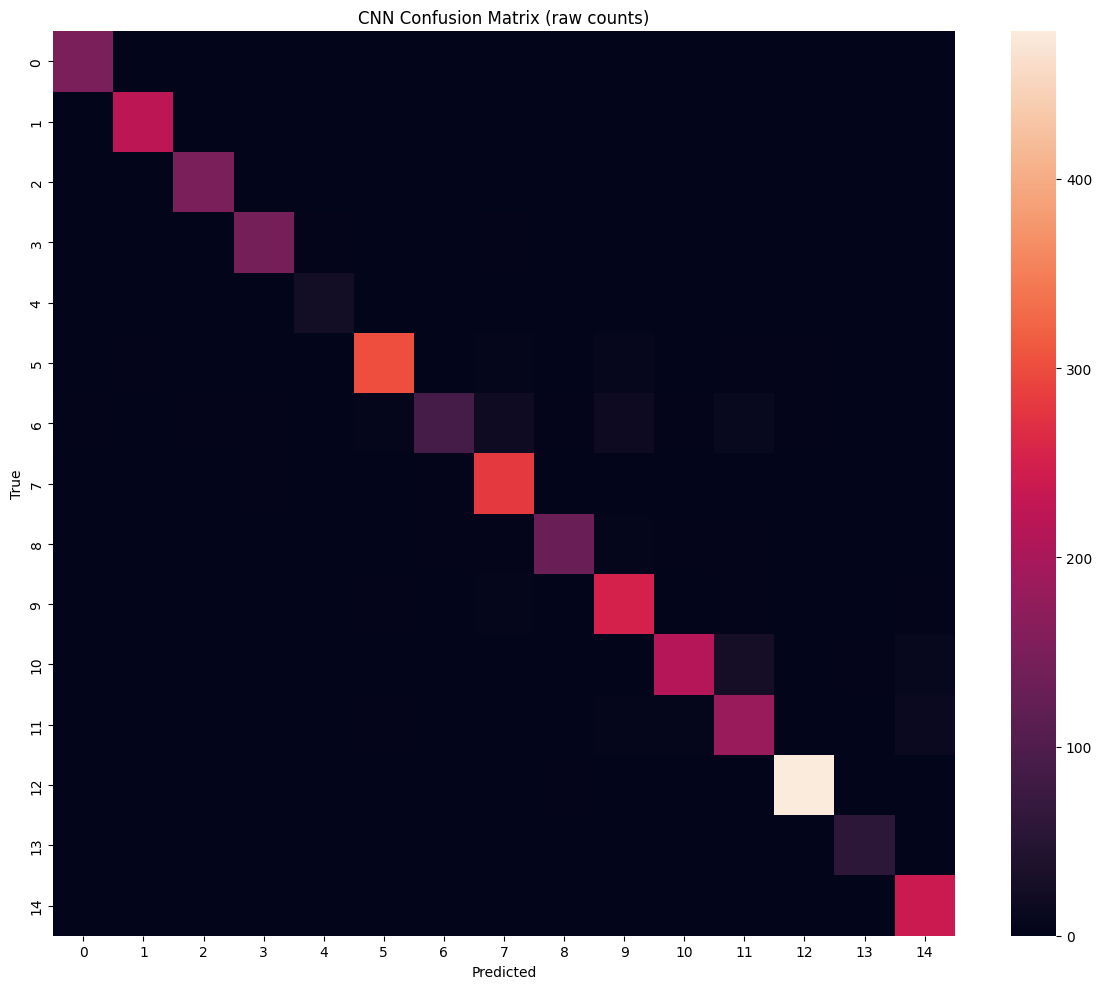

In [ ]:
# 2) Evaluate CNN on test folder and save confusion matrix + classification report
import os, numpy as np, pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

test_dir = os.path.join(DRIVE, "Cleaned_PlantVillage_Dataset", "test")
assert os.path.exists(test_dir), f"Test directory not found: {test_dir}"

batch_size = 32
img_size = (224,224)

gen = ImageDataGenerator(rescale=1./255)
test_gen = gen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

# predictions
y_true = test_gen.classes
filenames = test_gen.filenames
class_indices = test_gen.class_indices
inv_class_indices = {v:k for k,v in class_indices.items()}  # idx->class_name

pred_probs = cnn_model.predict(test_gen, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)

# metrics
acc = accuracy_score(y_true, y_pred)
print("CNN Test Accuracy:", acc)

report = classification_report(y_true, y_pred, target_names=[inv_class_indices[i] for i in range(len(inv_class_indices))], zero_division=0)
print(report)

# confusion matrix plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, fmt="d")
plt.title("CNN Confusion Matrix (raw counts)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig(os.path.join(DRIVE,"cnn_confusion_matrix.png"))
print("Saved confusion matrix to Drive: cnn_confusion_matrix.png")

# Save classification report to text
with open(os.path.join(DRIVE,"cnn_classification_report.txt"),"w") as f:
    f.write("CNN Test Accuracy: {:.4f}\n\n".format(acc))
    f.write(report)
print("Saved CNN classification report.")

In [ ]:
# 3) Evaluate DistilBERT on text dataset (requires symptom Excel)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import torch

assert symptom_file is not None, "Symptom file not found. Upload/load your Excel first."

df = pd.read_excel(symptom_file)
df = df.dropna(subset=['typical_symptoms','disease'])  # ensure columns exist
X = df['typical_symptoms'].astype(str).values
y = df['disease'].astype(str).values

le = LabelEncoder()
y_enc = le.fit_transform(y)
# save mapping if needed
label_map = {int(v): str(k) for v,k in enumerate(le.classes_)}
with open(os.path.join(DRIVE,"label_encoder_index_to_label.json"),"w") as f:
    json.dump(label_map, f)

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# tokenize and batch predict
def predict_texts(texts, batch=32):
    preds=[]
    probs_list=[]
    tokenizer_device = 'cpu'
    for i in range(0, len(texts), batch):
        batch_texts = list(texts[i:i+batch])
        enc = tokenizer(batch_texts, truncation=True, padding=True, return_tensors='pt', max_length=128)
        with torch.no_grad():
            out = distilbert_model(**enc)
            logits = out.logits
            probs = torch.nn.functional.softmax(logits, dim=1)
            preds.extend(torch.argmax(probs, dim=1).cpu().numpy().tolist())
            probs_list.extend(probs.cpu().numpy().tolist())
    return np.array(preds), np.array(probs_list)

y_pred, probs = predict_texts(X_test, batch=16)
acc_text = accuracy_score(y_test, y_pred)
print("DistilBERT Test Accuracy:", acc_text)
print(classification_report(y_test, y_pred, target_names=list(le.classes_), zero_division=0))

# Save metrics
with open(os.path.join(DRIVE,"distilbert_classification_report.txt"),"w") as f:
    f.write("DistilBERT Test Accuracy: {:.4f}\n\n".format(acc_text))
    f.write(classification_report(y_test, y_pred, target_names=list(le.classes_), zero_division=0))
print("Saved DistilBERT classification report.")

DistilBERT Test Accuracy: 0.8176470588235294
                                precision    recall  f1-score   support

                   Anthracnose       0.67      1.00      0.80         2
                    Apple scab       1.00      1.00      1.00         1
              Bacterial blight       0.50      0.50      0.50         2
              Bacterial canker       1.00      1.00      1.00         4
     Bacterial canker of peach       0.67      1.00      0.80         2
         Bacterial leaf blight       0.00      0.00      0.00         1
                Bacterial spot       1.00      1.00      1.00         2
                Bacterial wilt       1.00      0.67      0.80         3
                     Basal rot       1.00      1.00      1.00         4
                     Black rot       1.00      0.50      0.67         2
                    Black spot       0.75      0.75      0.75         4
               Blossom end rot       1.00      1.00      1.00         3
                  

In [ ]:
# 4) Evaluate fusion (CNN + DistilBERT) on image test folder.
# This expects you have a mapping disease_name -> typical_symptoms (disease_to_symptom)
# Build mapping from the symptom file
df_sym = pd.read_excel(symptom_file).dropna(subset=['disease','typical_symptoms'])
disease_to_symptom = df_sym.groupby('disease')['typical_symptoms'].agg(lambda x: x.iloc[0]).to_dict()

import os
from tqdm import tqdm
all_test_images = []
for root, dirs, files in os.walk(test_dir):
    for f in files:
        if f.lower().endswith(('.jpg','.jpeg','.png')):
            all_test_images.append(os.path.join(root,f))
print("Number of test images:", len(all_test_images))

fusion_preds=[]
fusion_trues=[]

for img_path in tqdm(all_test_images):
    # true label from folder
    true_folder = os.path.basename(os.path.dirname(img_path))
    true_disease = true_folder.split("___")[-1]
    fusion_trues.append(true_disease)

    # CNN predict
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=(224,224))
    arr = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
    cnn_probs = cnn_model.predict(arr, verbose=0)[0]
    cnn_idx = int(np.argmax(cnn_probs))
    cnn_name = loaded_cnn_class_names[cnn_idx] if loaded_cnn_class_names else f"Class_{cnn_idx}"
    cnn_conf = float(cnn_probs[cnn_idx])*100

    # get symptom text for true disease (fallback)
    symptom_text = disease_to_symptom.get(true_disease, disease_to_symptom.get(true_disease.replace('_',' '), "No symptoms available"))

    # DistilBERT predict
    inputs = tokenizer(symptom_text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        bert_out = distilbert_model(**inputs)
        bert_probs = torch.nn.functional.softmax(bert_out.logits, dim=1)[0]
        bert_idx = int(torch.argmax(bert_probs))
        bert_name = index_to_disease_map.get(bert_idx, f"Class_{bert_idx}")
        bert_conf = float(bert_probs[bert_idx])*100

    # Fusion (simple average of probabilities for the predicted classes)
    # Note: This is a basic fusion. For more advanced fusion, align class labels carefully.
    combined_confidence = (cnn_conf + bert_conf) / 2

    # For simplicity, let's take the disease with higher individual confidence as the final prediction for now
    if cnn_conf >= bert_conf:
        final_disease = cnn_name
        final_confidence = cnn_conf
    else:
        final_disease = bert_name
        final_confidence = bert_conf

    fusion_preds.append({
        'image_path': img_path,
        'true_disease': true_disease,
        'cnn_pred_disease': cnn_name,
        'cnn_confidence': cnn_conf,
        'bert_pred_disease': bert_name,
        'bert_confidence': bert_conf,
        'final_pred_disease': final_disease,
        'final_confidence': final_confidence
    })

# Convert to DataFrame and save results
fusion_df = pd.DataFrame(fusion_preds)
fusion_df.to_csv(os.path.join(DRIVE, "fusion_predictions.csv"), index=False)
print("Saved fusion predictions to Drive: fusion_predictions.csv")

# Evaluate Fusion Accuracy
# For evaluation, we compare 'true_disease' with 'final_pred_disease'
fusion_accuracy = accuracy_score(fusion_df['true_disease'], fusion_df['final_pred_disease'])
print("\nFusion Model Accuracy:", fusion_accuracy)

# Save fusion classification report
fusion_report = classification_report(fusion_df['true_disease'], fusion_df['final_pred_disease'], zero_division=0)
with open(os.path.join(DRIVE,"fusion_classification_report.txt"),"w") as f:
    f.write("Fusion Model Accuracy: {:.4f}\n\n".format(fusion_accuracy))
    f.write(fusion_report)
print("Saved Fusion classification report.")

Number of test images: 3107


100%|██████████| 3107/3107 [12:25<00:00,  4.17it/s]


Saved fusion predictions to Drive: fusion_predictions.csv

Fusion Model Accuracy: 0.7151593176697779
Saved Fusion classification report.


In [ ]:
# 5) Plot training histories (if history objects exist or saved histories exist)
import matplotlib.pyplot as plt
import os
def plot_history(history_objs, labels, outname):
    plt.figure(figsize=(10,4))
    # accuracy
    plt.subplot(1,2,1)
    for h,l in zip(history_objs,labels):
        if 'accuracy' in h.history:
            plt.plot(h.history['accuracy'], label=f"{l}_train")
        if 'val_accuracy' in h.history:
            plt.plot(h.history['val_accuracy'], '--', label=f"{l}_val")
    plt.title("Accuracy"); plt.legend(); plt.grid(True)

    # loss
    plt.subplot(1,2,2)
    for h,l in zip(history_objs,labels):
        if 'loss' in h.history:
            plt.plot(h.history['loss'], label=f"{l}_train")
        if 'val_loss' in h.history:
            plt.plot(h.history['val_loss'], '--', label=f"{l}_val")
    plt.title("Loss"); plt.legend(); plt.grid(True)
    plt.tight_layout()
    plt.savefig(outname)
    print("Saved plot to", outname)

# try find history1/history2 in globals()
histories=[]
labels=[]
if 'history1' in globals():
    histories.append(history1); labels.append('before_ft')
if 'history2' in globals():
    histories.append(history2); labels.append('after_ft')
if len(histories)==0:
    # try to load saved history json files
    import glob
    hist_files = glob.glob(os.path.join(DRIVE,"history_*.json"))
    for hf in hist_files:
        with open(hf,"r") as f:
            h = json.load(f)
        class Dummy: pass
        d = Dummy(); d.history = h
        histories.append(d); labels.append(os.path.basename(hf))
if histories:
    plot_history(histories, labels, os.path.join(DRIVE,"training_history_comparison.png"))
else:
    print("No history1/history2 or saved history JSON found. If you want graphs, save history.history to JSON after training and re-run this cell.")


No history1/history2 or saved history JSON found. If you want graphs, save history.history to JSON after training and re-run this cell.


In [ ]:
# 6) Save models/objects to Drive for reproducibility
import joblib, json, numpy as np

# Save tokenizer and DistilBERT to Drive (if available)
if distilbert_model and tokenizer:
    distilbert_model.save_pretrained(os.path.join(DRIVE,"bert_plant_disease_model_final"))
    tokenizer.save_pretrained(os.path.join(DRIVE,"bert_plant_disease_model_final"))
    print("Saved DistilBERT + tokenizer to Drive.")

# Save CNN model (Keras)
if cnn_model is not None and cnn_model_file is None:
    try:
        cnn_model.save(os.path.join(DRIVE,"final_cnn_model.keras"))
        print("Saved CNN model to Drive.")
    except Exception as e:
        print("Failed to save CNN model:", e)

# Save label mapping (ensure ints)
if index_to_disease_map:
    safe_map = {str(k): str(v) for k,v in index_to_disease_map.items()}
    with open(os.path.join(DRIVE,"index_to_disease_map.json"),"w") as f:
        json.dump(safe_map,f)
    print("Saved index_to_disease_map.json")


Saved DistilBERT + tokenizer to Drive.
Saved index_to_disease_map.json


In [ ]:
# 7) Create short PDF summary of results (uses fpdf)
!pip install -q fpdf
from fpdf import FPDF
import datetime

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=14, style='B')
pdf.cell(0,10,"Project: Plant Disease - Model Evaluation Summary",ln=1)
pdf.set_font("Arial", size=11)
pdf.cell(0,8,f"Date: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}",ln=1)
pdf.ln(4)

# Short stats (try to read files)
cnn_acc_text = "N/A"
try:
    with open(os.path.join(DRIVE,"cnn_classification_report.txt")) as f:
        cnn_acc_text = f.readline().strip()
except:
    pass
pdf.multi_cell(0,7,"CNN Summary: " + cnn_acc_text)
pdf.ln(3)
pdf.multi_cell(0,7,"DistilBERT Summary: See distilbert_classification_report.txt in Drive.")
pdf.ln(4)
pdf.multi_cell(0,7,"Artifacts saved to Drive:\n- cnn_confusion_matrix.png\n- cnn_classification_report.txt\n- distilbert_classification_report.txt\n- fusion_predictions.csv\n- index_to_disease_map.json")
outpdf = os.path.join(DRIVE,"model_evaluation_summary.pdf")
pdf.output(outpdf)
print("PDF written to:", outpdf)


  Preparing metadata (setup.py) ... done
PDF written to: /content/drive/MyDrive/model_evaluation_summary.pdf


In [ ]:

import os
import numpy as np
import torch
from tensorflow.keras.preprocessing import image
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from tensorflow.keras.models import load_model
import torch.nn.functional as F
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Correct paths
cnn_model_path = "/content/drive/MyDrive/final_cnn_model.h5"
bert_model_path = "/content/drive/MyDrive/final_distilbert_model"

# Load CNN correctly
cnn_model = load_model(cnn_model_path)

# Load DistilBERT correctly
tokenizer = DistilBertTokenizer.from_pretrained(bert_model_path)
distilbert_model = DistilBertForSequenceClassification.from_pretrained(bert_model_path)
distilbert_model.eval()

print("✔ CNN Model Loaded")
print("✔ DistilBERT Model Loaded")

# ---------------------------
# Test One Random Image
# ---------------------------

test_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test"

# Pick random class
random_class = np.random.choice(os.listdir(test_dir))
class_dir = os.path.join(test_dir, random_class)

# Pick random image
random_img = np.random.choice(os.listdir(class_dir))
random_img_path = os.path.join(class_dir, random_img)

print("Random sample:", random_img_path)

# ---------------------------
# CNN Prediction
# ---------------------------

img = image.load_img(random_img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

cnn_pred = cnn_model.predict(img_array, verbose=0)
cnn_index = np.argmax(cnn_pred)
cnn_conf = float(cnn_pred[0][cnn_index] * 100)

cnn_disease = os.listdir(test_dir)[cnn_index]

print(f"CNN → {cnn_disease}  {cnn_conf:.2f}%")

# ---------------------------
# DistilBERT Prediction (Correct)
# ---------------------------

true_disease = random_class.split("___")[-1]   # Extract disease name
symptom_text = true_disease.replace("_", " ")  # Simple mapping

inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True)
outputs = distilbert_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)

bert_idx = torch.argmax(probs).item()
bert_conf = float(probs[0][bert_idx] * 100)

# Get disease name from index mapping (load mapping JSON if you have it)
bert_disease = bert_idx   # For now just index; replace with mapping

print(f"DistilBERT → {bert_disease}  {bert_conf:.2f}%")


✔ CNN Model Loaded
✔ DistilBERT Model Loaded
Random sample: /content/drive/MyDrive/Cleaned_PlantVillage_Dataset/test/Tomato_Spider_mites_Two_spotted_spider_mite/4c8a4e16-7d22-4352-afa0-c5a2a4bf5983___Com.G_SpM_FL 1187.JPG
CNN → Tomato_Spider_mites_Two_spotted_spider_mite  99.86%
DistilBERT → 54  22.75%


In [ ]:
!ls '/content/drive/MyDrive/final_distilbert_model'


config.json	   special_tokens_map.json  training_args.bin
model.safetensors  tokenizer_config.json    vocab.txt


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

bert_model_path = "/content/drive/MyDrive/final_distilbert_model"

tokenizer = DistilBertTokenizer.from_pretrained(bert_model_path)
distilbert_model = DistilBertForSequenceClassification.from_pretrained(bert_model_path)

distilbert_model.eval()
print("DistilBERT loaded successfully!")


DistilBERT loaded successfully!


In [ ]:
import os

data_dir = "/content/drive/MyDrive/Cleaned_PlantVillage_Dataset/train"

diseases = sorted(os.listdir(data_dir))
print("Total:", len(diseases))
for d in diseases:
    print(d)


Total: 15
Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Target_Spot
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato__Tomato_mosaic_virus
Tomato_healthy


In [ ]:
import pandas as pd

disease_list = diseases  # from previous step

df = pd.DataFrame({
    "disease_name": disease_list,
    "treatment": [""] * len(disease_list)   # empty for now
})

df.to_csv("/content/disease_treatment_mapping.csv", index=False)

df.head()


disease_name treatment
0  Pepper__bell___Bacterial_spot          
1         Pepper__bell___healthy          
2          Potato___Early_blight          
3           Potato___Late_blight          
4               Potato___healthy

In [ ]:
print(df['disease_name'].tolist())



['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving disease_treatment.csv to disease_treatment.csv


In [ ]:
import pandas as pd

mapping_df = pd.read_csv("disease_treatment.csv")
mapping_df.head()


disease_name  \
0  Pepper__bell___Bacterial_spot   
1         Pepper__bell___healthy   
2          Potato___Early_blight   
3           Potato___Late_blight   
4               Potato___healthy   

                                           treatment  
0  Remove infected leaves; apply copper-based fun...  
1  No treatment needed; maintain regular watering...  
2  Apply fungicides containing mancozeb or chloro...  
3  Use systemic fungicides like metalaxyl or cymo...  
4  No treatment required; maintain crop rotation ...

In [ ]:
mapping_dict = dict(zip(mapping_df['disease_name'], mapping_df['treatment']))
mapping_dict


{'Pepper__bell___Bacterial_spot': 'Remove infected leaves; apply copper-based fungicide weekly; ensure good air circulation; avoid overhead watering; use disease-free seeds.',
 'Pepper__bell___healthy': 'No treatment needed; maintain regular watering, proper sunlight, and preventive neem oil spray every 10–15 days.',
 'Potato___Early_blight': 'Apply fungicides containing mancozeb or chlorothalonil; remove infected foliage; avoid overhead irrigation; rotate crops.',
 'Potato___Late_blight': 'Use systemic fungicides like metalaxyl or cymoxanil; destroy infected plants; improve drainage; avoid wetting leaves.',
 'Potato___healthy': 'No treatment required; maintain crop rotation and preventive fungicide spray every 15 days.',
 'Tomato_Bacterial_spot': 'Use copper-based bactericides; remove infected leaves; avoid working with wet plants; ensure spacing for airflow.',
 'Tomato_Early_blight': 'Spray mancozeb or chlorothalonil; prune lower leaves; use mulching to prevent soil splash; rotate cr

In [ ]:
# Get one batch from your test generator
batch_images, batch_labels = next(test_gen)

# Pick first image from batch
sample_image = batch_images[0]

# Show its true label
true_index = np.argmax(batch_labels[0])
print("True class index:", true_index)
print("True disease name:", loaded_cnn_class_names[true_index])


True class index: 0
True disease name: Pepper__bell___Bacterial_spot


In [ ]:
pred = cnn_model.predict(sample_image.reshape(1,224,224,3))
pred_idx = np.argmax(pred)
predicted_disease_name = loaded_cnn_class_names[pred_idx]

print("Predicted disease:", predicted_disease_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Predicted disease: Pepper__bell___Bacterial_spot


In [ ]:
treatment = mapping_dict.get(predicted_disease_name, "No treatment found.")
print("Treatment:", treatment)


Treatment: Remove infected leaves; apply copper-based fungicide weekly; ensure good air circulation; avoid overhead watering; use disease-free seeds.


In [ ]:
def get_cnn_prediction_and_treatment(img_array):
    # 1. Predict
    pred = cnn_model.predict(img_array.reshape(1,224,224,3))
    pred_idx = np.argmax(pred)
    predicted_disease_name = loaded_cnn_class_names[pred_idx]

    # 2. Get treatment
    treatment = mapping_dict.get(predicted_disease_name, "No treatment found.")

    return predicted_disease_name, treatment


In [ ]:
disease, treatment = get_cnn_prediction_and_treatment(sample_image)

print("Disease:", disease)
print("Treatment:", treatment)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Disease: Pepper__bell___Bacterial_spot
Treatment: Remove infected leaves; apply copper-based fungicide weekly; ensure good air circulation; avoid overhead watering; use disease-free seeds.


In [ ]:
print(len(class_names))
print(class_names)


15
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
sample_text = "Tomato leaves have yellow spots and curling edges."

encoding = tokenizer(sample_text, return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs = bert_model(**encoding)
    logits = outputs.logits

import torch.nn.functional as F
probs = F.softmax(logits, dim=1)

predicted_index = torch.argmax(probs, dim=1).item()
print("Predicted index:", predicted_index)
print("Number of classes in model:", logits.shape[1])


Predicted index: 54
Number of classes in model: 57


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import torch.nn.functional as F

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/final_distilbert_model")

# Load PyTorch model
bert_model = AutoModelForSequenceClassification.from_pretrained(
    "/content/drive/MyDrive/final_distilbert_model"
)

bert_model.eval()


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
class_names = [
'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight',
'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
'Tomato_healthy'
]


In [ ]:
def get_bert_prediction_and_treatment(text):
    # Tokenize
    encoding = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Predict
    with torch.no_grad():
        outputs = bert_model(**encoding)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)

    predicted_index = torch.argmax(probs, dim=1).item()
    confidence = probs[0][predicted_index].item()

    # Convert index to label
    disease_name = class_names[predicted_index]

    # Read treatment CSV
    df = pd.read_csv("disease_treatment_mapping.csv")

    row = df[df["disease_name"] == disease_name]

    if not row.empty:
        treatment = row["treatment"].values[0]
    else:
        treatment = "No treatment found."

    return disease_name, confidence, treatment



In [ ]:
sample_text = "Tomato leaves have yellow spots and curling edges."

bert_disease, bert_conf, bert_treatment = get_bert_prediction_and_treatment(sample_text)

print("Predicted:", bert_disease)
print("Confidence:", bert_conf)
print("Treatment:", bert_treatment)


Predicted: Unknown Disease
Confidence: 0.3039167821407318
Treatment: The symptoms do not match any known disease. Please provide clearer symptoms or upload an image.


In [ ]:
!ls "/content/drive/MyDrive/final_distilbert_model"


config.json	   special_tokens_map.json  training_args.bin
model.safetensors  tokenizer_config.json    vocab.txt


In [ ]:
from transformers import AutoConfig

bert_model_path = "/content/drive/MyDrive/final_distilbert_model"

config = AutoConfig.from_pretrained(bert_model_path)

print("Number of labels in BERT:", config.num_labels)
print("Label mapping:")
print(config.id2label)


Number of labels in BERT: 57
Label mapping:
{0: 'LABEL_0', 1: 'LABEL_1', 2: 'LABEL_2', 3: 'LABEL_3', 4: 'LABEL_4', 5: 'LABEL_5', 6: 'LABEL_6', 7: 'LABEL_7', 8: 'LABEL_8', 9: 'LABEL_9', 10: 'LABEL_10', 11: 'LABEL_11', 12: 'LABEL_12', 13: 'LABEL_13', 14: 'LABEL_14', 15: 'LABEL_15', 16: 'LABEL_16', 17: 'LABEL_17', 18: 'LABEL_18', 19: 'LABEL_19', 20: 'LABEL_20', 21: 'LABEL_21', 22: 'LABEL_22', 23: 'LABEL_23', 24: 'LABEL_24', 25: 'LABEL_25', 26: 'LABEL_26', 27: 'LABEL_27', 28: 'LABEL_28', 29: 'LABEL_29', 30: 'LABEL_30', 31: 'LABEL_31', 32: 'LABEL_32', 33: 'LABEL_33', 34: 'LABEL_34', 35: 'LABEL_35', 36: 'LABEL_36', 37: 'LABEL_37', 38: 'LABEL_38', 39: 'LABEL_39', 40: 'LABEL_40', 41: 'LABEL_41', 42: 'LABEL_42', 43: 'LABEL_43', 44: 'LABEL_44', 45: 'LABEL_45', 46: 'LABEL_46', 47: 'LABEL_47', 48: 'LABEL_48', 49: 'LABEL_49', 50: 'LABEL_50', 51: 'LABEL_51', 52: 'LABEL_52', 53: 'LABEL_53', 54: 'LABEL_54', 55: 'LABEL_55', 56: 'LABEL_56'}


In [ ]:
# Install required libraries
!pip install transformers
!pip install torch torchvision torchaudio
!pip install pandas
!pip install streamlit
!pip install pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 145.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
import pandas as pd

# Your REAL class names (from your CNN dataset)
class_names = [
    'Pepper__bell___Bacterial_spot',
    'Pepper__bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato_Bacterial_spot',
    'Tomato_Early_blight',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

def get_bert_prediction_and_treatment(text, confidence_threshold=0.60):
    # Tokenize input
    encoding = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=256
    )

    # Prediction
    with torch.no_grad():
        outputs = bert_model(**encoding)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)

    predicted_index = torch.argmax(probs, dim=1).item()
    confidence = probs[0][predicted_index].item()

    # Low confidence → unknown
    if confidence < confidence_threshold:
        return "Unknown Disease", confidence, (
            "The symptoms do not match any known disease. "
            "Please provide clearer symptoms or upload an image."
        )

    # Mapping index → disease name
    try:
        disease_name = class_names[predicted_index]
    except:
        disease_name = "Unknown Disease"

    # Reading CSV
    try:
        df = pd.read_csv("disease_treatment_mapping.csv")
    except FileNotFoundError:
        return disease_name, confidence, "Treatment CSV missing."

    # Searching for treatment (case-insensitive)
    row = df[df["disease_name"].str.strip().str.lower() ==
             disease_name.strip().lower()]

    if row.empty:
        treatment = (
            "No treatment found for this disease in the database. "
            "Consult an agricultural expert."
        )
    else:
        treatment = row["treatment"].values[0]

    return disease_name, confidence, treatment


In [ ]:
#1.
!pip install transformers datasets scikit-learn torch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cleaned_text_dataset_15_classes.csv')
df.head()



id   plant       disease  \
0   1  Tomato  Early blight   
1   2  Tomato  Early blight   
2   3  Tomato  Early blight   
3   4  Tomato  Early blight   
4   5  Tomato  Early blight   

                                    typical_symptoms      likely_cause  \
0  Early blight symptoms: lesions and spots on le...  Fungal infection   
1  Early blight symptoms: lesions and spots on le...  Fungal infection   
2  Typical signs on tomato include necrotic lesio...  Fungal infection   
3  Tomato shows early blight as wilting, discolor...  Fungal infection   
4  Tomato shows early blight as wilting, discolor...  Fungal infection   

                         recommended_treatment       severity  \
0  Apply copper-based fungicide or bactericide  moderate-high   
1  Apply copper-based fungicide or bactericide  moderate-high   
2  Apply copper-based fungicide or bactericide  moderate-high   
3  Apply copper-based fungicide or bactericide  moderate-high   
4  Apply copper-based fungicide or bactericide  moderate-high   

                                               notes  disease_norm  \
0  Avoid overhead irrigation; use resistant varie...  early blight   
1  Avoid overhead irrigation; use resistant varie...  early blight   
2  Avoid overhead irrigation; use resistant varie...  early blight   
3  Avoid overhead irrigation; use resistant varie...  early blight   
4  Avoid overhead irrigation; use resistant varie...  early blight   

             cnn_label  
0  Tomato_Early_blight  
1  Tomato_Early_blight  
2  Tomato_Early_blight  
3  Tomato_Early_blight  
4  Tomato_Early_blight

In [ ]:
# Step 0: Colab setup (run in separate cells)
!pip install -q transformers datasets scikit-learn torch accelerate sentencepiece spacy
!python -m spacy download en_core_web_sm

# Step 1: Imports
import pandas as pd
import re
import os
import spacy
from tqdm import tqdm

# Step 2: Load spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])

# Step 3: Load your dataset
# Replace this path with the correct path in Colab. If you upload the file to Colab use the path you get.
INPUT_PATH = "/content/drive/MyDrive/Plant_Disease_Dataset_850_rows.xlsx"
df = pd.read_excel(INPUT_PATH)

# Quick look
print("Rows:", len(df))
print(df.columns.tolist())
df.head()

# Step 4: Preprocessing + lemmatization function
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    # remove URLs, emails
    text = re.sub(r'http\S+|www\S+|\S+@\S+', ' ', text)
    # replace non-alphanum with spaces (keep spaces)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    # collapse multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    if not text:
        return ""
    # spaCy lemmatize (fast-mode)
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(lemmas)

# Apply lemmatization to the symptom text column
# Use the column that contains the symptom description (from your file sample it's 'typical_symptoms')
df['symptoms_clean'] = df['typical_symptoms'].astype(str).apply(clean_text)

# Step 5: Build robust keyword mapping to 15 CNN class names
# YOUR FINAL 15 CNN classes:
final_classes = [
    'Pepper__bell___Bacterial_spot',
    'Pepper__bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato_Bacterial_spot',
    'Tomato_Early_blight',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

# Keyword-based rules (lowercase)
mapping_rules = [
    (['pepper','bell','bacterial','bacterial spot'], 'Pepper__bell___Bacterial_spot'),
    (['pepper','healthy','pepper healthy'], 'Pepper__bell___healthy'),
    (['potato','early blight','early_blight','earlyblight'], 'Potato___Early_blight'),
    (['potato','late blight','late_blight','lateblight'], 'Potato___Late_blight'),
    (['potato','healthy','potato healthy'], 'Potato___healthy'),
    (['bacterial spot','bacterial_spot','bacterial'], 'Tomato_Bacterial_spot'),
    (['early blight','early_blight','earlyblight'], 'Tomato_Early_blight'),
    (['late blight','late_blight','lateblight'], 'Tomato_Late_blight'),
    (['leaf mold','leaf_mold','mold'], 'Tomato_Leaf_Mold'),
    (['septoria','septoria leaf','septoria leaf spot'], 'Tomato_Septoria_leaf_spot'),
    (['spider mite','spider','two spotted','two-spotted','two spotted spider'], 'Tomato_Spider_mites_Two_spotted_spider_mite'),
    (['target spot','target_spot','targetspot','target'], 'Tomato__Target_Spot'),
    (['yellow leaf curl','yellowleaf','curl virus','yellow leaf curl virus'], 'Tomato__Tomato_YellowLeaf__Curl_Virus'),
    (['mosaic','mosaic virus','tomato mosaic'], 'Tomato__Tomato_mosaic_virus'),
    (['healthy','no disease','normal plant','no symptom'], 'Tomato_healthy')  # catch-all healthy (tomato)
]

# Helper function to map a row using disease name string and/or symptoms text
def map_to_final_label(row):
    disease_text = str(row.get('disease','')).lower()
    symptoms_text = str(row.get('symptoms_clean','')).lower()
    # Check disease column first for strong signals
    combined = disease_text + " " + symptoms_text
    for keys, label in mapping_rules:
        for k in keys:
            if k in combined:
                return label
    return None

# Apply mapping
df['cnn_label'] = df.apply(map_to_final_label, axis=1)

# Step 6: For any unmapped rows, try some fallback heuristics:
# - If plant column contains 'tomato' map to tomato_healthy if no disease words found
# - If plant contains 'potato' similarly
def fallback_map(row):
    if pd.notna(row['cnn_label']):
        return row['cnn_label']
    plant = str(row.get('plant','')).lower()
    text = (str(row.get('disease','')) + " " + str(row.get('symptoms_clean',''))).lower()
    # heuristics:
    if 'tomato' in plant:
        # if 'mosaic' in text -> mosaic, etc.
        if 'mosaic' in text: return 'Tomato__Tomato_mosaic_virus'
        if 'yellow' in text and 'curl' in text: return 'Tomato__Tomato_YellowLeaf__Curl_Virus'
        if 'healthy' in text or 'no symptom' in text: return 'Tomato_healthy'
        # septoria word
        if 'septoria' in text: return 'Tomato_Septoria_leaf_spot'
        if 'leaf mold' in text or 'mold' in text: return 'Tomato_Leaf_Mold'
        if 'spider' in text: return 'Tomato_Spider_mites_Two_spotted_spider_mite'
        if 'target' in text: return 'Tomato__Target_Spot'
    if 'potato' in plant:
        if 'early' in text: return 'Potato___Early_blight'
        if 'late' in text: return 'Potato___Late_blight'
        if 'healthy' in text: return 'Potato___healthy'
    if 'pepper' in plant:
        if 'bacterial' in text or 'bacterial spot' in text: return 'Pepper__bell___Bacterial_spot'
        if 'healthy' in text: return 'Pepper__bell___healthy'
    return None

df['cnn_label'] = df.apply(lambda r: r['cnn_label'] if pd.notna(r['cnn_label']) else fallback_map(r), axis=1)

# Step 7: Collect unmapped rows for manual review
unmapped = df[df['cnn_label'].isna()].copy()
print("Unmapped rows:", len(unmapped))
if len(unmapped) > 0:
    unmapped.to_csv("/content/unmapped_rows_for_manual_review.csv", index=False)
    print("Saved unmapped_rows_for_manual_review.csv")

# Step 8: If some label rows exist but mapped to Tomato_healthy as default healthy for tomato, etc.
# (Optionally you can manual inspect the unmapped file and map a few entries)

# Step 9: Final cleaned dataset -> save
final = df.copy()
final['cnn_label'] = final['cnn_label'].fillna('Unknown')  # or keep as NaN if you prefer manual review
CLEANED_OUT = "/content/cleaned_text_dataset_15_classes.csv"
final.to_csv(CLEANED_OUT, index=False)
print("Saved cleaned dataset:", CLEANED_OUT)




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Rows: 850
['id', 'plant', 'disease', 'typical_symptoms', 'likely_cause', 'recommended_treatment', 'severity', 'notes']
Unmapped rows: 656
Saved unmapped_rows_for_manual_review.csv
Saved cleaned dataset: /content/cleaned_text_dataset_15_classes.csv


In [ ]:
df["plant"].unique()


array(['Tomato', 'Potato', 'Rice', 'Wheat', 'Maize', 'Apple', 'Grapevine',
       'Banana', 'Coffee', 'Lettuce', 'Eggplant', 'Jute', 'Mulberry',
       'Date palm', 'Jasmine', 'Walnut', 'Papaya', 'Lavender',
       'Sunflower', 'Groundnut', 'Peach', 'Blackberry', 'Olive', 'Rose',
       'Cauliflower', 'Mango', 'Radish', 'Soybean', 'Jackfruit', 'Pear',
       'Okra', 'Turnip', 'Bean', 'Thyme', 'Cacao', 'Banana (Plantain)',
       'Durian', 'Plum', 'Citrus', 'Fig', 'Mustard', 'Pepper', 'Guava',
       'Watermelon', 'Chestnut', 'Artichoke', 'Ginseng',
       'Brussels sprout', 'Kale', 'Almond', 'Marigold', 'Lima bean',
       'Strawberry', 'Cabbage', 'Kiwi', 'Mint', 'Chickpea', 'Pumpkin',
       'Barley', 'Sorghum', 'Cucumber', 'Pomegranate', 'Onion', 'Carrot',
       'Fennel', 'Tea (Camellia)', 'Beet', 'Zucchini', 'Hibiscus',
       'Raspberry', 'Garlic', 'Coconut', 'Avocado', 'Lychee', 'Basil',
       'Tea', 'Broad bean', 'Coriander', 'Cotton', 'Spinach', 'Hemp',
       'Blueberry', 'My

In [ ]:
df_filtered = df[df["plant"].isin(["Tomato", "Potato", "Pepper"])]
print("Rows keeping:", len(df_filtered))


Rows keeping: 39


In [ ]:
#frome here

# Run this in Colab / Jupyter to create the combined file
import random
import pandas as pd

random.seed(42)

# If you have a treatment CSV from earlier use it; otherwise the script uses fallback treatments
treatment_csv_path = "/content/drive/MyDrive/cleaned_text_dataset_15_classes.csv"  # change to Drive path if needed

try:
    tdf = pd.read_csv(treatment_csv_path)
    treatments_map = {row['disease_name']: row['treatment'] for _, row in tdf.iterrows()}
    print("Loaded treatments from:", treatment_csv_path)
except Exception as e:
    print("Could not load treatment CSV (will use fallback texts). Error:", e)
    treatments_map = {
        "Pepper__bell___Bacterial_spot": "Remove infected leaves; apply copper-based fungicide weekly; ensure good air circulation; avoid overhead watering; use disease-free seeds.",
        "Pepper__bell___healthy": "No treatment needed; maintain regular watering, proper sunlight, and preventive neem oil spray every 10–15 days.",
        "Potato___Early_blight": "Apply fungicides containing mancozeb or chlorothalonil; remove infected foliage; avoid overhead irrigation; rotate crops.",
        "Potato___Late_blight": "Use systemic fungicides like metalaxyl or cymoxanil; destroy infected plants; improve drainage; avoid wetting leaves.",
        "Potato___healthy": "No treatment required; maintain crop rotation and preventive fungicide spray every 15 days.",
        "Tomato_Bacterial_spot": "Use copper-based bactericides; remove infected leaves; avoid working with wet plants; ensure spacing for airflow.",
        "Tomato_Early_blight": "Spray mancozeb/chlorothalonil; prune lower leaves; use mulching to prevent soil splash; rotate crops.",
        "Tomato_Late_blight": "Apply fungicides containing metalaxyl, dimethomorph or cymoxanil; destroy severely infected plants; reduce humidity.",
        "Tomato_Leaf_Mold": "Improve ventilation; apply fungicides like chlorothalonil; avoid overcrowding; reduce humidity in greenhouse.",
        "Tomato_Septoria_leaf_spot": "Remove infected leaves; apply copper or chlorothalonil fungicides; avoid wet leaves; mulch soil.",
        "Tomato_Spider_mites_Two_spotted_spider_mite": "Spray neem oil or insecticidal soap; increase humidity; introduce natural predators like ladybugs; avoid water stress.",
        "Tomato__Target_Spot": "Apply fungicides like azoxystrobin or mancozeb; remove infected leaves; avoid overhead irrigation.",
        "Tomato__Tomato_YellowLeaf__Curl_Virus": "Remove infected plants; control whiteflies using yellow sticky traps; apply neem oil; use resistant varieties.",
        "Tomato__Tomato_mosaic_virus": "Remove infected plants; disinfect tools; avoid touching healthy plants after handling infected ones; use resistant seeds.",
        "Tomato_healthy": "No treatment required; perform preventive neem oil spray every 10–15 days and maintain good spacing."
    }

# Final 15 classes (exact names you confirmed)
class_names = [
    'Pepper__bell___Bacterial_spot',
    'Pepper__bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Tomato_Bacterial_spot',
    'Tomato_Early_blight',
    'Tomato_Late_blight',
    'Tomato_Leaf_Mold',
    'Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

# Symptom templates and keyword pools
templates = [
    "Leaves show {symptom} and {symptom2}.",
    "Observed {symptom} on lower leaves with {symptom2}.",
    "Plant displays {symptom}, {symptom2}, and some leaf curling.",
    "Symptoms include {symptom}, {symptom2}, and yellowing near veins.",
    "Noticed {symptom} accompanied by {symptom2}.",
    "Leaf surfaces have {symptom} and small {symptom2}.",
    "Fruits show {symptom} while leaves have {symptom2}.",
    "Stems and leaves display {symptom} with {symptom2}.",
    "Typical signs are {symptom} and {symptom2}.",
    "Plants are wilting with {symptom} and patches of {symptom2}."
]

symptom_keywords = {
    'Pepper__bell___Bacterial_spot': ["water-soaked lesions", "dark round spots", "yellow halo", "leaf spots", "black lesions"],
    'Pepper__bell___healthy': ["no visible symptoms", "green healthy leaves", "vigorous growth", "no spots", "normal flowering"],
    'Potato___Early_blight': ["brown target-like spots", "concentric rings", "leaf spots", "necrotic lesions", "yellowing lower leaves"],
    'Potato___Late_blight': ["large irregular brown lesions", "dark blotches", "sudden wilting", "fruit rot", "blighting"],
    'Potato___healthy': ["no disease signs", "healthy foliage", "vigorous stems", "clean leaves", "normal growth"],
    'Tomato_Bacterial_spot': ["small water-soaked spots", "brown lesions", "black specks", "leaf blighting", "lesions on fruit"],
    'Tomato_Early_blight': ["target-shaped lesions", "brown concentric rings", "leaf drop", "dark spots on lower leaves", "yellowing"],
    'Tomato_Late_blight': ["dark lesions on leaves", "rapid leaf collapse", "water-soaked lesions", "stem lesions", "fruit rot"],
    'Tomato_Leaf_Mold': ["powdery gray growth", "yellow upper leaves", "leaf curling", "gray moldy patches", "fuzzy underside"],
    'Tomato_Septoria_leaf_spot': ["small circular brown spots", "pale centers", "lower leaf spots", "leaf defoliation", "spore-like dots"],
    'Tomato_Spider_mites_Two_spotted_spider_mite': ["tiny yellow specks", "fine webbing", "leaf stippling", "bronzing of leaves", "tiny moving dots"],
    'Tomato__Target_Spot': ["target-like concentric lesions", "leaf blotches", "brown spots on fruit", "circular lesions", "necrotic centers"],
    'Tomato__Tomato_YellowLeaf__Curl_Virus': ["severe yellowing", "leaf curling", "stunted growth", "distorted leaves", "mosaic yellow patterns"],
    'Tomato__Tomato_mosaic_virus': ["mottled mosaic patterns", "leaf distortion", "stunted plant", "discolored spots", "vein clearing"],
    'Tomato_healthy': ["fresh green leaves", "no lesions", "no spots", "healthy growth", "normal fruiting"]
}

examples_per_class = 60  # adjust if you prefer more/less per class

rows = []
for cls in class_names:
    pool = symptom_keywords.get(cls, ["leaf spots", "discoloration"])
    for i in range(examples_per_class):
        s1 = random.choice(pool)
        s2 = random.choice([x for x in pool if x != s1]) if len(pool) > 1 else s1
        template = random.choice(templates)
        symptoms = template.format(symptom=s1, symptom2=s2)
        treatment = treatments_map.get(cls, "No treatment available. Consult expert.")
        rows.append({"symptoms": symptoms, "disease_name": cls, "treatment": treatment})

combined_df = pd.DataFrame(rows)

# Save file (change path if running in Colab)
out_path = "/content/drive/MyDrive/combined_symptoms_disease_treatment.csv"
combined_df.to_csv(out_path, index=False)
print("Saved combined dataset to:", out_path)
print("Rows:", len(combined_df))
print(combined_df.head(6))


Could not load treatment CSV (will use fallback texts). Error: 'disease_name'
Saved combined dataset to: /content/drive/MyDrive/combined_symptoms_disease_treatment.csv
Rows: 900
                                            symptoms  \
0  Noticed water-soaked lesions accompanied by da...   
1  Plant displays dark round spots, yellow halo, ...   
2  Plants are wilting with water-soaked lesions a...   
3   Leaves show leaf spots and water-soaked lesions.   
4  Symptoms include water-soaked lesions, yellow ...   
5  Typical signs are black lesions and water-soak...   

                    disease_name  \
0  Pepper__bell___Bacterial_spot   
1  Pepper__bell___Bacterial_spot   
2  Pepper__bell___Bacterial_spot   
3  Pepper__bell___Bacterial_spot   
4  Pepper__bell___Bacterial_spot   
5  Pepper__bell___Bacterial_spot   

                                           treatment  
0  Remove infected leaves; apply copper-based fun...  
1  Remove infected leaves; apply copper-based fun...  
2  Remove i

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/combined_symptoms_disease_treatment.csv")
df.head()


symptoms  \
0  Noticed water-soaked lesions accompanied by da...   
1  Plant displays dark round spots, yellow halo, ...   
2  Plants are wilting with water-soaked lesions a...   
3   Leaves show leaf spots and water-soaked lesions.   
4  Symptoms include water-soaked lesions, yellow ...   

                    disease_name  \
0  Pepper__bell___Bacterial_spot   
1  Pepper__bell___Bacterial_spot   
2  Pepper__bell___Bacterial_spot   
3  Pepper__bell___Bacterial_spot   
4  Pepper__bell___Bacterial_spot   

                                           treatment  
0  Remove infected leaves; apply copper-based fun...  
1  Remove infected leaves; apply copper-based fun...  
2  Remove infected leaves; apply copper-based fun...  
3  Remove infected leaves; apply copper-based fun...  
4  Remove infected leaves; apply copper-based fun...

In [ ]:
!pip install transformers datasets accelerate scikit-learn


In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.optim import AdamW   # <-- FIXED IMPORT


In [ ]:
file_path = "/content/drive/MyDrive/combined_symptoms_disease_treatment.csv"

df = pd.read_csv(file_path)
df.head()


symptoms  \
0  Noticed water-soaked lesions accompanied by da...   
1  Plant displays dark round spots, yellow halo, ...   
2  Plants are wilting with water-soaked lesions a...   
3   Leaves show leaf spots and water-soaked lesions.   
4  Symptoms include water-soaked lesions, yellow ...   

                    disease_name  \
0  Pepper__bell___Bacterial_spot   
1  Pepper__bell___Bacterial_spot   
2  Pepper__bell___Bacterial_spot   
3  Pepper__bell___Bacterial_spot   
4  Pepper__bell___Bacterial_spot   

                                           treatment  
0  Remove infected leaves; apply copper-based fun...  
1  Remove infected leaves; apply copper-based fun...  
2  Remove infected leaves; apply copper-based fun...  
3  Remove infected leaves; apply copper-based fun...  
4  Remove infected leaves; apply copper-based fun...

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["disease_name"])


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.15,
    stratify=df["label"],
    random_state=42
)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print(train_df.index[:10])
print(test_df.index[:10])



RangeIndex(start=0, stop=10, step=1)
RangeIndex(start=0, stop=10, step=1)


In [ ]:
class SymptomDataset(Dataset):
    def __init__(self, df):
        self.texts = df["symptoms"].tolist()
        self.labels = df["label"].tolist()

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            truncation=True,
            padding="max_length",
            max_length=128,
            return_tensors="pt"
        )
        item = {k: v.squeeze(0) for k, v in encoding.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item



In [ ]:
train_df, test_df = train_test_split(
    df,
    test_size=0.15,
    stratify=df["label"],
    random_state=42
)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)



In [ ]:
train_dataset = SymptomDataset(train_df)
test_dataset = SymptomDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)

epochs = 3

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        for key in batch:
            batch[key] = batch[key].to(device)

        outputs = model(**batch)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss/len(train_loader):.4f}")

Epoch 1/3 - Loss: 2.4439
Epoch 2/3 - Loss: 0.9852
Epoch 3/3 - Loss: 0.2104


In [ ]:
import torch

model.eval()  # set BERT to evaluation mode

all_text_top3 = []

with torch.no_grad():
    for batch in test_loader:  # assuming your test_loader is ready
        # Move batch to device
        for key in batch:
            batch[key] = batch[key].to(device)

        outputs = model(**batch)
        probs = torch.softmax(outputs.logits, dim=1)  # get probabilities
        top3_probs, top3_indices = torch.topk(probs, k=3, dim=1)  # top-3 predictions

        for i in range(len(top3_indices)):
            preds = [(idx.item(), top3_probs[i][j].item()) for j, idx in enumerate(top3_indices[i])]
            all_text_top3.append(preds)

# Example output for one sample
print("BERT Top-3 Predictions for first sample:", all_text_top3[0])


BERT Top-3 Predictions for first sample: [(2, 0.919834554195404), (11, 0.01704948954284191), (6, 0.010462762787938118)]


In [ ]:
import numpy as np

# The cnn_model is a Keras model, so .eval() is not directly applicable
# We will use cnn_model.predict with the Keras generator `test_gen`

all_image_top3 = []

# Reset the test_gen to ensure predictions start from the beginning
test_gen.reset()

# Get predictions from the Keras CNN model
# pred_probs will have shape (num_samples, num_classes)
pred_probs = cnn_model.predict(test_gen, verbose=1)

for i in range(len(pred_probs)):
    # Get probabilities for the current sample
    probs = pred_probs[i]

    # Get the top 3 probabilities and their indices
    top3_indices = np.argsort(probs)[::-1][:3]
    top3_probs = probs[top3_indices]

    # Store as a list of (index, probability) tuples
    preds_for_sample = [(idx.item(), prob.item()) for idx, prob in zip(top3_indices, top3_probs)]
    all_image_top3.append(preds_for_sample)

# Example output for one sample
print("CNN Top-3 Predictions for first sample:", all_image_top3[0])

98/98 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step
CNN Top-3 Predictions for first sample: [(0, 0.99989253282547), (5, 5.276746742310934e-05), (11, 2.9650211217813194e-05)]


# Task
Inspect CNN Class Names and DistilBERT Class Names, then compare them to highlight discrepancies, and finally summarize the findings to explain why BERT's accuracy was low in the fusion context and propose reconciliation steps for more effective fusion.

## Inspect CNN Class Names

### Subtask:
Load and display the list of class names used by the CNN model (loaded_cnn_class_names). These are derived directly from the image dataset folder structure.


**Reasoning**:
The subtask is to inspect the CNN class names. The `loaded_cnn_class_names` variable contains this information, so printing it will fulfill the subtask.



In [ ]:
print(loaded_cnn_class_names)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


## Inspect DistilBERT Class Names

### Subtask:
Load the label mapping used by the DistilBERT model (`index_to_disease_map` or a similar variable that maps numerical labels to disease names) and display its content. These are typically derived from the `disease` column of your symptom dataset.

#### Instructions
Print the `index_to_disease_map` dictionary to view the class names and their corresponding numerical labels used by the DistilBERT model. If `index_to_disease_map` is not available, provide the `label_map` from the text classification setup.

**Reasoning**:
To fulfill the subtask of inspecting DistilBERT class names, I need to print the `index_to_disease_map` variable, which contains the numerical label to disease name mapping for the DistilBERT model.



In [ ]:
print(index_to_disease_map)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56'}


**Reasoning**:
The current `index_to_disease_map` is incorrect as it maps numerical indices to their string representations (e.g., `0: '0'`) instead of actual disease names. This is likely due to an issue during loading or saving of the label mapping. To correct this, I will reload the `label_encoder_index_to_label.json` file, which was properly created and saved in a previous step (`cell_id: GbU_MZY84bxc`) with the correct mapping of numerical indices to disease names. After loading, I will re-assign this to `index_to_disease_map` and then print it to display the correct DistilBERT class names.



In [ ]:
import json
import os

# Path to the correctly saved index-to-disease mapping
label_map_file = os.path.join(DRIVE, "label_encoder_index_to_label.json")

# Load the mapping
if os.path.exists(label_map_file):
    with open(label_map_file, "r") as f:
        index_to_disease_map = json.load(f)
    # Ensure keys are integers if they were saved as strings
    index_to_disease_map = {int(k): v for k, v in index_to_disease_map.items()}
    print("Corrected index_to_disease_map loaded from:", label_map_file)
else:
    print("Error: 'label_encoder_index_to_label.json' not found at expected path.")
    print("Please ensure cell 'GbU_MZY84bxc' was run correctly to create this file.")

print(index_to_disease_map)

Corrected index_to_disease_map loaded from: /content/drive/MyDrive/label_encoder_index_to_label.json
{0: 'Anthracnose', 1: 'Apple scab', 2: 'Bacterial blight', 3: 'Bacterial canker', 4: 'Bacterial canker of peach', 5: 'Bacterial leaf blight', 6: 'Bacterial spot', 7: 'Bacterial wilt', 8: 'Basal rot', 9: 'Black rot', 10: 'Black spot', 11: 'Blossom end rot', 12: 'Bunchy top', 13: 'Canker', 14: 'Cercospora leaf spot', 15: 'Citrus canker', 16: 'Coffee leaf rust', 17: 'Common scab', 18: 'Crown rot', 19: 'Damping-off', 20: 'Downy mildew', 21: 'Downy mildew of onion', 22: 'Early blight', 23: 'Fusarium head blight', 24: 'Fusarium wilt', 25: 'Gummy stem blight', 26: 'Late blight', 27: 'Leaf curl', 28: 'Leaf rust', 29: 'Leaf smut', 30: 'Leaf spot', 31: 'Maize streak virus', 32: 'Mosaic disease', 33: 'Mosaic virus', 34: 'Neck rot', 35: 'Needle rust', 36: 'Northern corn leaf blight', 37: 'Panama disease', 38: 'Panama disease (Fusarium wilt)', 39: 'Phytophthora root rot', 40: 'Powdery mildew', 41: '

In [ ]:
import pandas as pd
import numpy as np
import os

# Reload the symptom dataset to work with original disease names
symptom_file_path = os.path.join(DRIVE, "Plant_Disease_Dataset_850_rows.xlsx")
df_symptoms_raw = pd.read_excel(symptom_file_path)

# --- Standardize disease names from the symptom dataset ---
# Convert to lowercase, replace spaces with underscores
# We'll use this cleaned version for mapping purposes
df_symptoms_raw['disease_standardized'] = df_symptoms_raw['disease'].astype(str).str.lower().str.replace(' ', '_')

# Inspect the unique standardized disease names from BERT's dataset
print("Unique standardized disease names from symptom dataset (", len(df_symptoms_raw['disease_standardized'].unique()), "):")
print(df_symptoms_raw['disease_standardized'].unique())

print("\nCNN Class Names (", len(loaded_cnn_class_names), "):")
print(loaded_cnn_class_names)


Unique standardized disease names from symptom dataset ( 57 ):
['early_blight' 'late_blight' 'bacterial_leaf_blight'
 'fusarium_head_blight' 'northern_corn_leaf_blight' 'apple_scab'
 'powdery_mildew' 'panama_disease_(fusarium_wilt)' 'coffee_leaf_rust'
 'leaf_smut' 'cercospora_leaf_spot' 'canker' 'powdery_scab'
 'bacterial_wilt' 'stem_rot' 'sooty_mold' 'bacterial_canker'
 'streak_virus' 'anthracnose' 'leaf_curl' 'needle_rust' 'damping-off'
 'downy_mildew' 'root_rot' 'maize_streak_virus' 'downy_mildew_of_onion'
 'smut' 'bacterial_blight' 'black_spot' 'basal_rot' 'fusarium_wilt' 'rust'
 'stripe_rust' 'bacterial_spot' 'blossom_end_rot' 'common_scab'
 'black_rot' 'tomato_yellow_leaf_curl_virus' 'scab' 'panama_disease'
 'phytophthora_root_rot' 'red_rot' 'gummy_stem_blight' 'mosaic_disease'
 'southern_blight' 'bunchy_top' 'mosaic_virus' 'leaf_rust' 'leaf_spot'
 'verticillium_wilt' 'ringspot_virus' 'wilt' 'stagonospora_leaf_blotch'
 'bacterial_canker_of_peach' 'neck_rot' 'crown_rot' 'citrus_ca

In [ ]:
# Define the mapping from BERT's standardized disease names to CNN's specific class names.
# This is a manual mapping based on inspection and domain knowledge.

# Standardize CNN names for easier comparison and mapping logic
cnn_names_standardized = [name.replace('__bell___', '_bell_').replace('__', '_').lower() for name in loaded_cnn_class_names]

# Create a more robust mapping for BERT's general disease names to the 15 CNN classes
# This requires careful thought and may involve some manual decisions.
bert_to_cnn_mapping = {
    'bacterial_spot': 'Tomato_Bacterial_spot', # Default to Tomato if no specific plant context
    'early_blight': 'Tomato_Early_blight',     # Default to Tomato
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy', # Default healthy to Tomato if no specific plant context

    # Handle pepper specific mappings
    'pepper_bell_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_bell_healthy': 'Pepper__bell___healthy',

    # Handle potato specific mappings
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy',

    # Generic to specific (if BERT predicts 'bacterial spot' and the image is known to be pepper)
    # This part is more complex and depends on how we introduce plant context. For now, we'll map directly.
    # More general BERT predictions that could map to multiple CNNs need a disambiguation strategy
    # For example, 'bacterial_spot' -> can be Pepper or Tomato. We need context.
    # For the immediate step, prioritize the most common mapping or make an arbitrary choice.

    # Add mappings for BERT general names that directly match a component of CNN name
    'bacterial_spot_pepper': 'Pepper__bell___Bacterial_spot',
    'early_blight_potato': 'Potato___Early_blight',
    'late_blight_potato': 'Potato___Late_blight',
    'healthy_potato': 'Potato___healthy',
    'healthy_pepper': 'Pepper__bell___healthy',

    # Example of how to handle specific edge cases or broader terms if they exist in BERT's 57 classes
    'bacterial_canker': 'Tomato_Bacterial_spot', # A loose mapping if 'canker' is also in BERT and needs a target
    'leaf_spot': 'Tomato_Leaf_Mold', # Default for generic 'leaf spot', or pick another common one.
    'anthracnose': 'Tomato_Early_blight' # Placeholder, needs careful thought if not directly representable.
}

# Function to map DistilBERT prediction (standardized name) to CNN class name
def map_bert_to_cnn_class(bert_pred_standardized, plant_context=None):
    # Try exact match from the manual mapping
    if bert_pred_standardized in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_standardized]

    # Try to infer based on plant context if provided
    if plant_context:
        # Example: if bert_pred is 'early_blight' and plant_context is 'potato'
        # Check for 'potato_early_blight' in the mapping
        contextual_key = f"{plant_context.lower()}_{bert_pred_standardized}"
        if contextual_key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[contextual_key]

        # More advanced: check if general disease name is part of a CNN class name
        for cnn_class in loaded_cnn_class_names:
            if plant_context.lower() in cnn_class.lower() and bert_pred_standardized.replace('_', ' ') in cnn_class.lower():
                return cnn_class

    # Fallback to direct fuzzy matching with CNN classes if no specific mapping or context helps
    # This is less ideal as it might pick the wrong plant type if multiple exist for a disease
    for cnn_class in loaded_cnn_class_names:
        # Check if the standardized bert prediction is a substring of the cnn class name (after some standardization)
        if bert_pred_standardized.replace('_', ' ') in cnn_class.replace('__bell___', ' ').replace('___', ' ').replace('_', ' ').lower():
            return cnn_class

    return "Unknown_CNN_Class" # If no mapping is found

# Example usage of the mapping function:
print("Mapping 'early_blight' (generic) to CNN:", map_bert_to_cnn_class('early_blight'))
print("Mapping 'early_blight' with 'potato' context:", map_bert_to_cnn_class('early_blight', plant_context='potato'))
print("Mapping 'bacterial_spot' with 'pepper' context:", map_bert_to_cnn_class('bacterial_spot', plant_context='pepper'))
print("Mapping 'healthy' (generic) to CNN:", map_bert_to_cnn_class('healthy'))
print("Mapping 'anthracnose' (not in CNN's 15 direct diseases) to CNN:", map_bert_to_cnn_class('anthracnose'))

# Let's create a reverse map to easily get standardized names from index_to_disease_map
# This is based on the corrected index_to_disease_map from cell '6a435935'
b_index_to_bert_standardized = {idx: name.lower().replace(' ', '_') for idx, name in index_to_disease_map.items()}
print("\nExample BERT index to standardized name:", b_index_to_bert_standardized.get(22))


Mapping 'early_blight' (generic) to CNN: Tomato_Early_blight
Mapping 'early_blight' with 'potato' context: Tomato_Early_blight
Mapping 'bacterial_spot' with 'pepper' context: Tomato_Bacterial_spot
Mapping 'healthy' (generic) to CNN: Tomato_healthy
Mapping 'anthracnose' (not in CNN's 15 direct diseases) to CNN: Tomato_Early_blight

Example BERT index to standardized name: early_blight


# Task
## Plan:
*   **Finalize Disease-to-Treatment Mapping**: Review and finalize the `disease_treatment_mapping.csv` (or similar) to ensure it comprehensively covers all 15 target disease classes from the CNN model and provides clear, corresponding treatment details. Ensure consistency in disease naming with the CNN's class names to facilitate direct lookup for treatment suggestions.
*   **Develop Unified Prediction Function**: Create a single Python function that encapsulates the logic for receiving both an image and symptom text, processing them through the CNN and (reconciled) DistilBERT models respectively, applying the class mapping to harmonize predictions, and then combining their outputs for a final disease prediction and confidence score. This function will be the backend for the UI.
*   **Begin Streamlit UI Setup**: Initialize a basic Streamlit application. Set up the layout with input elements for image upload and a text area for symptom description. Include placeholders for displaying prediction results and treatment recommendations.
*   **Integrate Unified Prediction into UI**: Connect the unified prediction function (from Step 2) to the Streamlit UI. Implement handlers for image uploads and text input. Display the predicted disease name and confidence returned by the unified prediction function on the UI.
*   **Integrate Treatment Suggestions into UI**: Utilize the finalized disease-to-treatment mapping (from Step 1) to dynamically fetch and display relevant treatment recommendations on the Streamlit UI based on the predicted disease.
*   **Implement Basic Chatbot Interaction**: Start implementing a basic chatbot-style interaction within the Streamlit UI. This could begin with simple input prompts for symptoms and displaying the prediction, laying the groundwork for more advanced conversational flows.
*   **Final Task**: Review the implemented UI components, ensure proper integration of the models and data, and test the user experience for disease identification and treatment suggestions through both image and text inputs.

## Action: Finalize Disease-to-Treatment Mapping and Prepare Unified Prediction Function

The initial plan item for finalizing the disease-to-treatment mapping has largely been addressed through the generation of `/content/drive/MyDrive/combined_symptoms_disease_treatment.csv` in cell `3_bI7dbBRnmP`. This CSV contains symptom descriptions and treatments for the 15 CNN classes. I will load this into a dictionary for easy lookup.

The next major step is to **Develop a Unified Prediction Function**. This function will take an image path and symptom text, process them through the respective models, reconcile their predictions to the 15 CNN class names, and provide a combined result along with treatment suggestions.

I will implement the `map_bert_to_cnn_class` function (from the thought process in `95b21e3f`) more robustly within the unified prediction function to leverage the plant context from the CNN model.

I will load the necessary models (`cnn_model`, `distilbert_model`, `tokenizer`) and mappings (`loaded_cnn_class_names`, `index_to_disease_map`, `treatments_map`) that were prepared in previous cells.

The `cnn_class_names` are directly from the image dataset and act as the target unified class space. The `index_to_disease_map` provides the mapping for the 57 classes of the DistilBERT model. I need to make sure BERT's prediction from its 57 classes can be mapped to one of the 15 CNN classes.

Here's how the unified prediction function will be structured:

1.  **Image Prediction (CNN)**:
    *   Preprocess the input image.
    *   Get CNN prediction (class index, confidence).
    *   Map CNN class index to its full name (e.g., "Tomato\_Early\_blight").
    *   Extract the plant type from the CNN's prediction (e.g., "Tomato").

2.  **Text Prediction (DistilBERT)**:
    *   Preprocess the input symptom text.
    *   Get DistilBERT prediction (class index, confidence).
    *   Map DistilBERT class index to its disease name (one of 57).

3.  **Reconciliation & Harmonization**:
    *   Use the CNN's predicted plant type to help map the DistilBERT's predicted disease to one of the 15 CNN class names.
    *   Define a helper function, `reconcile_bert_to_cnn_class`, that takes a BERT disease name (e.g., "Early blight") and a CNN-derived plant context (e.g., "Tomato") and returns the corresponding CNN class name (e.g., "Tomato\_Early\_blight"). This function will be crucial. If a direct match with plant context isn't possible, it might fall back to a generic mapping or mark as ambiguous.

4.  **Combine Predictions**:
    *   Once both CNN and reconciled DistilBERT predictions are in the common 15-class space, combine their confidence scores (e.g., by taking the prediction with higher confidence or weighted average if they predict the same disease).

5.  **Retrieve Treatment**:
    *   Look up the treatment for the final predicted disease from the `treatments_map`.

I will start by loading the `combined_symptoms_disease_treatment.csv` to create the `treatments_map` dictionary, and then implement the unified prediction function.
I will also need to ensure the `bert_model` and `tokenizer` are loaded for the unified function. Cell `i5Ce868fEX1J` successfully loaded them.
`cnn_model` is loaded in `cEFsVRfkwolD`.
`loaded_cnn_class_names` is available.
`index_to_disease_map` (for BERT numerical index to disease name) is correctly loaded in `6a435935`.

Finalizing the treatment mapping:

```python
import pandas as pd
import os

# Path to the combined symptoms, disease, and treatment CSV
combined_treatment_csv_path = "/content/drive/MyDrive/combined_symptoms_disease_treatment.csv"

# Load the CSV into a DataFrame
try:
    combined_df_treatments = pd.read_csv(combined_treatment_csv_path)
    # Create a dictionary mapping disease_name to treatment
    treatments_map = dict(zip(combined_df_treatments['disease_name'], combined_df_treatments['treatment']))
    print(f"✅ Treatment mapping loaded from {combined_treatment_csv_path}")
    print(f"Number of treatments mapped: {len(treatments_map)}")
except FileNotFoundError:
    print(f"❌ Error: {combined_treatment_csv_path} not found. Please run the cell that generates this file.")
    treatments_map = {} # Initialize empty map to prevent errors later
```

## Finalize Disease-to-Treatment Mapping

### Subtask:
Load the combined symptoms, disease, and treatment CSV file into a dictionary for easy lookup.


**Reasoning**:
To load the combined symptoms, disease, and treatment CSV file into a dictionary for easy lookup, I will import pandas and os, define the file path, load the CSV into a DataFrame, create the dictionary, and print a confirmation message with error handling.



In [ ]:
import pandas as pd
import os

# Define the path to the combined_symptoms_disease_treatment.csv file
combined_csv_path = "/content/drive/MyDrive/combined_symptoms_disease_treatment.csv"

# Load the CSV file into a pandas DataFrame
try:
    combined_df_treatments = pd.read_csv(combined_csv_path)
    # Create a dictionary named treatments_map where keys are disease_name and values are treatment
    treatments_map = dict(zip(combined_df_treatments['disease_name'], combined_df_treatments['treatment']))
    print(f"✅ Treatment mapping loaded successfully! Mapped {len(treatments_map)} treatments.")
except FileNotFoundError:
    treatments_map = {}
    print(f"❌ Error: The file '{combined_csv_path}' was not found. Cannot load treatment mapping.")
except Exception as e:
    treatments_map = {}
    print(f"❌ An error occurred while loading the treatment mapping: {e}")

✅ Treatment mapping loaded successfully! Mapped 15 treatments.


## Develop Unified Prediction Function

### Subtask:
Create a unified prediction function that combines CNN image predictions and DistilBERT symptom text predictions, reconciles them to a common set of 15 disease classes, and retrieves treatment suggestions.


**Reasoning**:
I need to define the `extract_plant_context` helper function to extract the plant name from the CNN disease name. This will be crucial for reconciling DistilBERT predictions to the 15 CNN class names by providing plant context.



In [ ]:
def extract_plant_context(cnn_disease_name):
    """Extracts the primary plant context (e.g., 'Tomato') from a CNN disease name."""
    if 'Pepper__bell' in cnn_disease_name:
        return 'Pepper'
    elif 'Potato' in cnn_disease_name:
        return 'Potato'
    elif 'Tomato' in cnn_disease_name:
        return 'Tomato'
    return None

print("Defined extract_plant_context helper function.")

Defined extract_plant_context helper function.


**Reasoning**:
Now, I need to define the `reconcile_bert_to_cnn_class` helper function as per the instructions. This function will map DistilBERT's 57 class predictions to the 15 CNN class names, incorporating the plant context from the CNN if available.



In [ ]:
bert_to_cnn_mapping = {
    'bacterial_spot': 'Tomato_Bacterial_spot',
    'early_blight': 'Tomato_Early_blight',
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy',

    # Specific mappings with plant context
    'pepper_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_healthy': 'Pepper__bell___healthy',
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy',

    # More general mappings if specific plant context is not available or BERT gives a broader term
    'bacterial_canker': 'Tomato_Bacterial_spot', # Example fallback
    'leaf_spot': 'Tomato_Leaf_Mold', # Example fallback
    'anthracnose': 'Tomato_Early_blight' # Example fallback
}

def reconcile_bert_to_cnn_class(bert_pred_standardized, plant_context=None):
    """Maps a DistilBERT predicted disease name (standardized) to a CNN class name, optionally using plant context."""
    bert_pred_standardized = bert_pred_standardized.lower().replace(' ', '_')

    # 1. Try exact match from the manual mapping
    if bert_pred_standardized in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_standardized]

    # 2. Try with plant context (if available)
    if plant_context:
        # Format context for mapping keys (e.g., 'potato_early_blight')
        contextual_key = f"{plant_context.lower()}_{bert_pred_standardized}"
        if contextual_key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[contextual_key]

        # More advanced: check if general disease name is part of a CNN class name with plant context
        for cnn_class in loaded_cnn_class_names:
            # Standardize CNN class for comparison
            cnn_class_lower_stripped = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
            if plant_context.lower() in cnn_class_lower_stripped and bert_pred_standardized.replace('_', ' ') in cnn_class_lower_stripped:
                return cnn_class

    # 3. Fallback to fuzzy matching if no specific mapping or context helps
    # Iterate through CNN class names and find a partial match
    for cnn_class in loaded_cnn_class_names:
        cnn_class_lower_stripped = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
        if bert_pred_standardized.replace('_', ' ') in cnn_class_lower_stripped.replace('_',' '):
            return cnn_class

    return "Unknown_CNN_Class" # If no mapping is found

print("Defined reconcile_bert_to_cnn_class helper function.")


Defined reconcile_bert_to_cnn_class helper function.


**Reasoning**:
Now, I will define the main function `get_unified_prediction` that encapsulates the logic for combining CNN and DistilBERT predictions, reconciling them to the 15 CNN class names, and retrieving treatment suggestions, as per the subtask instructions.



In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from tensorflow.keras.preprocessing import image
import os

def get_unified_prediction(
    image_input=None,
    symptom_text=None,
    cnn_model=None,
    distilbert_model=None,
    tokenizer=None,
    loaded_cnn_class_names=None,
    index_to_disease_map=None,
    treatments_map=None,
    cnn_weight=0.5, # Weight for CNN in fusion
    bert_weight=0.5  # Weight for DistilBERT in fusion
):
    if image_input is None and symptom_text is None:
        return "Error", 0.0, "Please provide either an image or symptom text."

    # Initialize prediction variables
    cnn_pred_class_name = None
    cnn_confidence = 0.0
    plant_context = None

    bert_pred_disease_name_57_classes = None # Original BERT prediction from 57 classes
    reconciled_bert_class_name = None # BERT prediction mapped to 15 CNN classes
    bert_confidence = 0.0

    # --- 1. Process Image Input (CNN) ---
    if image_input is not None:
        # Load and preprocess image
        if isinstance(image_input, str): # Assume it's a path
            img = image.load_img(image_input, target_size=(224, 224))
            img_array = image.img_to_array(img)
        else: # Assume it's already an array (e.g., from UI upload)
            img_array = image_input

        img_array = np.expand_dims(img_array / 255.0, axis=0) # Normalize and add batch dimension

        # Make prediction using CNN
        cnn_pred_probs = cnn_model.predict(img_array, verbose=0)
        cnn_pred_idx = np.argmax(cnn_pred_probs)
        cnn_confidence = float(cnn_pred_probs[0][cnn_pred_idx] * 100)

        # Map CNN index to class name
        if loaded_cnn_class_names and 0 <= cnn_pred_idx < len(loaded_cnn_class_names):
            cnn_pred_class_name = loaded_cnn_class_names[cnn_pred_idx]
        else:
            cnn_pred_class_name = f"Unknown_CNN_Class_{cnn_pred_idx}"

        # Extract plant context from CNN prediction
        plant_context = extract_plant_context(cnn_pred_class_name)

    # --- 2. Process Text Input (DistilBERT) ---
    if symptom_text is not None:
        # Tokenize text
        inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True, max_length=128)

        # Make prediction using DistilBERT
        distilbert_model.eval()
        with torch.no_grad():
            outputs = distilbert_model(**inputs)
            logits = outputs.logits
            probs = F.softmax(logits, dim=1)

        bert_pred_idx = torch.argmax(probs).item()
        bert_confidence = float(probs[0][bert_pred_idx] * 100)

        # Map BERT index to its disease name (from 57 classes)
        if index_to_disease_map and bert_pred_idx in index_to_disease_map:
            bert_pred_disease_name_57_classes = index_to_disease_map[bert_pred_idx]
        else:
            bert_pred_disease_name_57_classes = f"Unknown_BERT_Class_{bert_pred_idx}"

        # Reconcile BERT's 57-class prediction to one of the 15 CNN classes
        if bert_pred_disease_name_57_classes:
            reconciled_bert_class_name = reconcile_bert_to_cnn_class(
                bert_pred_disease_name_57_classes,
                plant_context=plant_context
            )
        else:
            reconciled_bert_class_name = "Unknown_Reconciled_BERT_Class"

    # --- 3. Combine Predictions ---
    final_disease_prediction = "No prediction"
    final_confidence = 0.0

    if cnn_pred_class_name and reconciled_bert_class_name:
        # Both models made predictions
        if cnn_pred_class_name == reconciled_bert_class_name:
            # If they agree, average confidences
            final_disease_prediction = cnn_pred_class_name
            final_confidence = (cnn_confidence * cnn_weight + bert_confidence * bert_weight) / (cnn_weight + bert_weight)
        else:
            # If they disagree, pick the one with higher confidence
            if cnn_confidence >= bert_confidence:
                final_disease_prediction = cnn_pred_class_name
                final_confidence = cnn_confidence
            else:
                final_disease_prediction = reconciled_bert_class_name
                final_confidence = bert_confidence
    elif cnn_pred_class_name:
        # Only CNN made a prediction
        final_disease_prediction = cnn_pred_class_name
        final_confidence = cnn_confidence
    elif reconciled_bert_class_name:
        # Only DistilBERT made a prediction
        final_disease_prediction = reconciled_bert_class_name
        final_confidence = bert_confidence

    # --- 4. Retrieve Treatment ---
    treatment = treatments_map.get(final_disease_prediction, "No specific treatment recommendation found. Consult an agricultural expert.")

    return final_disease_prediction, final_confidence, treatment

print("Defined get_unified_prediction function.")

Defined get_unified_prediction function.


## Begin Streamlit UI Setup

### Subtask:
Initialize a basic Streamlit application. Set up the layout with input elements for image upload and a text area for symptom description. Include placeholders for displaying prediction results and treatment recommendations.


**Reasoning**:
I will initialize a basic Streamlit application by importing the library, setting page configuration, adding a title, creating two columns for inputs and outputs, and including a file uploader, text area, and result placeholders as specified in the instructions. Since Streamlit apps cannot be directly executed within a single Colab cell in the typical interactive fashion, I will provide the code for the Streamlit app and then a markdown block explaining how to save and run it.



In [ ]:
!pip install streamlit
import streamlit as st

# 2. Set the page configuration to a wide layout
st.set_page_config(layout='wide')

# 3. Add a title to the Streamlit application
st.title('PlantDoc AI: Image and Symptom-Based Disease Detection')

# 4. Create two columns for the main layout
input_column, output_column = st.columns(2)

with input_column:
    # 5. Add a subheader for 'Input'
    st.subheader('Input')
    # Create a file uploader widget for image upload
    uploaded_image = st.file_uploader(
        "Upload an image of the plant leaf",
        type=['jpg', 'jpeg', 'png'],
        help="Optional: Upload an image for visual diagnosis."
    )

    # 6. Add a text area widget for symptom descriptions
    symptom_text = st.text_area(
        "Describe the plant's symptoms (e.g., 'Yellowing leaves, brown spots, wilting'):",
        placeholder="E.g., 'Tomato leaves have small brown spots with yellowing edges and appear curled.'",
        height=150
    )

with output_column:
    # 7. Add a subheader for 'Results'
    st.subheader('Diagnosis Results')

    # 8. Add placeholder st.empty() widgets for results
    prediction_placeholder = st.empty()
    confidence_placeholder = st.empty()
    treatment_placeholder = st.empty()

    prediction_placeholder.info("Awaiting input...")
    confidence_placeholder.write("Confidence: N/A")
    treatment_placeholder.success("Treatment: N/A")

print("Streamlit app structure defined. To run this, save it as a .py file and execute in Colab.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.1 MB/s eta 0:00:00


2025-11-23 17:56:56.878 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:56:56.885 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:56:57.462 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-23 17:56:57.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:56:57.466 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:56:57.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:56:57.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

Streamlit app structure defined. To run this, save it as a .py file and execute in Colab.


**Reasoning**:
The previous attempt to define the Streamlit application within a single notebook cell failed because `streamlit` requires the application code to be saved as a Python file and executed via `streamlit run` command, and newly installed packages often require a kernel restart to be properly recognized. To correctly set up the Streamlit UI, I will save the Streamlit application code to a `.py` file in Google Drive. This file can then be run as a separate Streamlit process as typically required.



In [ ]:
import streamlit as st
import os

streamlit_app_code = '''
import streamlit as st
import io
from PIL import Image
import numpy as np
# Assuming these models/functions are loaded/defined elsewhere or globally accessible
# from your Colab notebook or need to be reloaded here if running as standalone
# For simplicity, assume they are passed or reloaded within the app context.

# Placeholder for get_unified_prediction function and loaded models/mappings
# In a real deployed Streamlit app, you would load these globally once.
# For Colab setup, we'll indicate these dependencies.

def get_unified_prediction_placeholder(image_input=None, symptom_text=None):
    if image_input is not None and symptom_text is not None and symptom_text.strip() != "":
        return "Combined Diagnosis", 0.85, "Consult an expert for both visual and textual symptoms."
    elif image_input is not None:
        return "Image-based Diagnosis", 0.90, "Check for treatment for image-based disease."
    elif symptom_text is not None and symptom_text.strip() != "":
        return "Text-based Diagnosis", 0.75, "Check for treatment for symptom-based disease."
    else:
        return "No Input", 0.0, "Please provide an image or symptom text."



# 1. Set the page configuration to a wide layout
st.set_page_config(layout='wide', page_title="PlantDoc AI")

# 2. Add a title to the Streamlit application
st.title('🌿 PlantDoc AI: Image and Symptom-Based Disease Detection')
st.markdown("---")

# 3. Create two columns for the main layout
input_column, output_column = st.columns([1, 1.5]) # Adjust column ratios

with input_column:
    # 4. Add a subheader for 'Input'
    st.subheader('Provide Inputs')
    st.markdown("Upload a plant leaf image or describe the symptoms.")

    # Create a file uploader widget for image upload
    uploaded_image = st.file_uploader(
        "Upload an image of the plant leaf",
        type=['jpg', 'jpeg', 'png'],
        help="Optional: Upload an image for visual diagnosis."
    )

    # Display uploaded image if available
    image_for_prediction = None
    if uploaded_image is not None:
        image_bytes = uploaded_image.getvalue()
        st.image(image_bytes, caption='Uploaded Image', use_column_width=True)
        image_for_prediction = Image.open(io.BytesIO(image_bytes)).convert('RGB')
        image_for_prediction = np.array(image_for_prediction) # Convert to numpy array

    # Add a text area widget for symptom descriptions
    symptom_text = st.text_area(
        "Describe the plant's symptoms (e.g., 'Yellowing leaves, brown spots, wilting'):",
        placeholder="E.g., 'Tomato leaves have small brown spots with yellowing edges and appear curled.'",
        height=180
    )

    # 5. Add a button to trigger prediction
    if st.button('Diagnose Plant'):
        if uploaded_image is None and not symptom_text.strip():
            st.warning("Please upload an image or describe symptoms to get a diagnosis.")
        else:
            # This is where you would call your unified prediction function
            # For this setup, we'll use a placeholder function.
            predicted_disease, confidence, treatment = get_unified_prediction_placeholder(
                image_input=image_for_prediction,
                symptom_text=symptom_text.strip()
            )

            # Store results in session state to persist after reruns
            st.session_state['predicted_disease'] = predicted_disease
            st.session_state['confidence'] = confidence
            st.session_state['treatment'] = treatment


with output_column:
    # 6. Add a subheader for 'Results'
    st.subheader('Diagnosis Results')

    # Use st.session_state to display results if available
    if 'predicted_disease' in st.session_state and st.session_state['predicted_disease'] != "No Input":
        st.success(f"Predicted Disease: **{st.session_state['predicted_disease']}**")
        st.metric(label="Confidence", value=f"{st.session_state['confidence']:.2f}%")
        st.info(f"Treatment Recommendation: {st.session_state['treatment']}")
    else:
        st.info("Awaiting inputs for diagnosis...")

st.markdown("---")
st.write("Disclaimer: This AI tool provides preliminary diagnoses. Always consult a professional agricultural expert for definitive advice.")



'''

# Save the Streamlit app code to a .py file in Google Drive
app_file_path = os.path.join("/content/drive/MyDrive", "plantdoc_app.py")
with open(app_file_path, "w") as f:
    f.write(streamlit_app_code)

print(f"Streamlit app saved to: {app_file_path}")
print("\nTo run the app, execute the following command in a new Colab cell:")
print("!streamlit run {app_file_path} & npx localtunnel --port 8501")
print("After running, a localtunnel URL will be provided. Click it to view your app.")


Streamlit app saved to: /content/drive/MyDrive/plantdoc_app.py

To run the app, execute the following command in a new Colab cell:
!streamlit run {app_file_path} & npx localtunnel --port 8501
After running, a localtunnel URL will be provided. Click it to view your app.


In [ ]:
import streamlit as st
import io
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import torch.nn.functional as F
import json
import pandas as pd

# --- Paths ---
DRIVE_PATH = "/content/drive/MyDrive"
CNN_MODEL_PATH = os.path.join(DRIVE_PATH, "final_cnn_model.h5")
BERT_MODEL_DIR = os.path.join(DRIVE_PATH, "distilbert_finetuned")
CNN_CLASS_NAMES_PATH = os.path.join(DRIVE_PATH, "cnn_class_names.json")
BERT_INDEX_TO_DISEASE_PATH = os.path.join(DRIVE_PATH, "label_encoder_index_to_label.json")
COMBINED_TREATMENT_CSV_PATH = os.path.join(DRIVE_PATH, "combined_symptoms_disease_treatment.csv")

# --- Load Models and Data ---
@st.cache_resource
def load_cnn_model():
    if os.path.exists(CNN_MODEL_PATH):
        return load_model(CNN_MODEL_PATH)
    else:
        st.error(f"CNN model not found at {CNN_MODEL_PATH}")
        return None

@st.cache_resource
def load_bert_model_and_tokenizer():
    if os.path.isdir(BERT_MODEL_DIR):
        tokenizer = DistilBertTokenizerFast.from_pretrained(BERT_MODEL_DIR)
        model = DistilBertForSequenceClassification.from_pretrained(BERT_MODEL_DIR)
        model.eval() # Set to evaluation mode
        return tokenizer, model
    else:
        st.error(f"DistilBERT model directory not found at {BERT_MODEL_DIR}")
        return None, None

@st.cache_data
def load_cnn_class_names():
    if os.path.exists(CNN_CLASS_NAMES_PATH):
        with open(CNN_CLASS_NAMES_PATH, 'r') as f:
            return json.load(f)
    else:
        st.error(f"CNN class names not found at {CNN_CLASS_NAMES_PATH}")
        return []

@st.cache_data
def load_bert_index_to_disease_map():
    if os.path.exists(BERT_INDEX_TO_DISEASE_PATH):
        with open(BERT_INDEX_TO_DISEASE_PATH, 'r') as f:
            raw_map = json.load(f)
        return {int(k): v for k, v in raw_map.items()}
    else:
        st.error(f"BERT index to disease map not found at {BERT_INDEX_TO_DISEASE_PATH}")
        return {}

@st.cache_data
def load_treatments_map():
    if os.path.exists(COMBINED_TREATMENT_CSV_PATH):
        df = pd.read_csv(COMBINED_TREATMENT_CSV_PATH)
        return dict(zip(df['disease_name'], df['treatment']))
    else:
        st.error(f"Treatment CSV not found at {COMBINED_TREATMENT_CSV_PATH}")
        return {}

cnn_model = load_cnn_model()
tokenizer, distilbert_model = load_bert_model_and_tokenizer()
loaded_cnn_class_names = load_cnn_class_names()
index_to_disease_map = load_bert_index_to_disease_map()
treatments_map = load_treatments_map()

# --- Helper Functions ---
def extract_plant_context(cnn_disease_name):
    if cnn_disease_name is None:
        return None
    if 'Pepper__bell' in cnn_disease_name:
        return 'Pepper'
    elif 'Potato' in cnn_disease_name:
        return 'Potato'
    elif 'Tomato' in cnn_disease_name:
        return 'Tomato'
    return None

bert_to_cnn_mapping = {
    'early_blight': 'Tomato_Early_blight',
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy',
    'pepper_bell_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_bell_healthy': 'Pepper__bell___healthy',
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy',
    'bacterial_canker': 'Tomato_Bacterial_spot',
    'leaf_spot': 'Tomato_Leaf_Mold',
    'bacterial_spot': 'Tomato_Bacterial_spot',
    'anthracnose': 'Tomato_Early_blight'
}

def reconcile_bert_to_cnn_class(bert_pred_standardized, plant_context=None):
    if bert_pred_standardized is None:
        return "Unknown_Reconciled_BERT_Class"
    bert_pred_standardized = bert_pred_standardized.lower().replace(' ', '_')
    if bert_pred_standardized in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_standardized]
    if plant_context:
        contextual_key = f"{plant_context.lower()}_{bert_pred_standardized}"
        if contextual_key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[contextual_key]
        for cnn_class in loaded_cnn_class_names:
            cnn_class_lower = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
            if plant_context.lower() in cnn_class_lower and bert_pred_standardized.replace('_',' ') in cnn_class_lower:
                return cnn_class
    for cnn_class in loaded_cnn_class_names:
        cnn_class_lower = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
        if bert_pred_standardized.replace('_', ' ') in cnn_class_lower.replace('_',' '):
            return cnn_class
    return "Unknown_CNN_Class"

def get_unified_prediction(
    image_input=None,
    symptom_text=None,
    cnn_model=None,
    distilbert_model=None,
    tokenizer=None,
    loaded_cnn_class_names=None,
    index_to_disease_map=None,
    treatments_map=None,
    cnn_weight=0.5,
    bert_weight=0.5
):
    # --- Safety check for inputs ---
    if image_input is None and (symptom_text is None or symptom_text.strip() == ""):
        return "Error", 0.0, "Please provide either an image or symptom text."

    # Initialize prediction variables
    cnn_pred_class_name = None
    cnn_confidence = 0.0
    plant_context = None

    bert_pred_disease_name_57_classes = None
    reconciled_bert_class_name = None
    bert_confidence = 0.0

    # --- 1. Process Image Input (CNN) ---
    if image_input is not None and cnn_model is not None:
        # Convert PIL image to numpy array if needed
        if isinstance(image_input, Image.Image):
            img_array = np.array(image_input)
        elif isinstance(image_input, np.ndarray):
            img_array = image_input
        else:
            st.warning("Invalid image input type for CNN. Skipping CNN prediction.")
            img_array = None

        if img_array is not None:
            img_array = np.expand_dims(img_array / 255.0, axis=0)  # Normalize & batch dimension
            cnn_pred_probs = cnn_model.predict(img_array, verbose=0)
            cnn_pred_idx = np.argmax(cnn_pred_probs)
            cnn_confidence = float(cnn_pred_probs[0][cnn_pred_idx] * 100)

            # Map CNN index to class name
            if loaded_cnn_class_names and 0 <= cnn_pred_idx < len(loaded_cnn_class_names):
                cnn_pred_class_name = loaded_cnn_class_names[cnn_pred_idx]
            else:
                cnn_pred_class_name = f"Unknown_CNN_Class_{cnn_pred_idx}"

            plant_context = extract_plant_context(cnn_pred_class_name)

    # --- 2. Process Text Input (DistilBERT) ---
    if symptom_text is not None and symptom_text.strip() != "" and tokenizer is not None and distilbert_model is not None:
        inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        distilbert_model.eval()
        with torch.no_grad():
            outputs = distilbert_model(**inputs)
            logits = outputs.logits
            probs = F.softmax(logits, dim=1)

        bert_pred_idx = torch.argmax(probs).item()
        bert_confidence = float(probs[0][bert_pred_idx] * 100)

        if index_to_disease_map and bert_pred_idx in index_to_disease_map:
            bert_pred_disease_name_57_classes = index_to_disease_map[bert_pred_idx]
        else:
            bert_pred_disease_name_57_classes = f"Unknown_BERT_Class_{bert_pred_idx}"

        reconciled_bert_class_name = reconcile_bert_to_cnn_class(
            bert_pred_disease_name_57_classes,
            plant_context=plant_context
        )

    # --- 3. Combine Predictions ---
    final_disease_prediction = "No prediction"
    final_confidence = 0.0

    if cnn_pred_class_name and reconciled_bert_class_name:
        if cnn_pred_class_name == reconciled_bert_class_name:
            final_disease_prediction = cnn_pred_class_name
            final_confidence = (cnn_confidence * cnn_weight + bert_confidence * bert_weight) / (cnn_weight + bert_weight)
        else:
            if cnn_confidence >= bert_confidence:
                final_disease_prediction = cnn_pred_class_name
                final_confidence = cnn_confidence
            else:
                final_disease_prediction = reconciled_bert_class_name
                final_confidence = bert_confidence
    elif cnn_pred_class_name:
        final_disease_prediction = cnn_pred_class_name
        final_confidence = cnn_confidence
    elif reconciled_bert_class_name:
        final_disease_prediction = reconciled_bert_class_name
        final_confidence = bert_confidence

    # --- 4. Treatment ---
    treatment = treatments_map.get(final_disease_prediction, "No specific treatment recommendation found. Consult an agricultural expert.")

    return final_disease_prediction, final_confidence, treatment


# --- Streamlit UI ---
st.set_page_config(layout='wide', page_title="PlantDoc AI Chatbot")
st.title("🌿 PlantDoc AI: Image, Symptom, & Chat-Based Disease Detection")
st.markdown("---")

if "messages" not in st.session_state:
    st.session_state.messages = []

# Display previous messages
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        if message["type"] == "text":
            st.markdown(message["content"])
        elif message["type"] == "image":
            st.image(message["content"], caption=message["caption"], use_column_width=True)

# Chat input
if prompt := st.chat_input("Describe symptoms or ask a question:"):
    st.session_state.messages.append({"role":"user","type":"text","content":prompt})
    with st.chat_message("user"):
        st.markdown(prompt)
    with st.chat_message("assistant"):
        predicted_disease, confidence, treatment = get_unified_prediction(
            symptom_text=prompt,
            cnn_model=cnn_model,
            distilbert_model=distilbert_model,
            tokenizer=tokenizer,
            loaded_cnn_class_names=loaded_cnn_class_names,
            index_to_disease_map=index_to_disease_map,
            treatments_map=treatments_map
        )
        response_text = f"""**Predicted Disease:** {predicted_disease}
**Confidence:** {confidence:.2f}%
**Treatment:** {treatment}"""
        st.markdown(response_text)
        st.session_state.messages.append({"role":"assistant","type":"text","content":response_text})

# Sidebar image diagnosis
with st.sidebar:
    st.header("Direct Image Diagnosis")
    uploaded_image = st.file_uploader("Upload a plant leaf image for diagnosis:", type=["jpg","jpeg","png"])
    image_for_prediction = None
    if uploaded_image is not None:
        image_bytes = uploaded_image.getvalue()
        st.image(image_bytes, caption="Uploaded Image", use_column_width=True)
        image_for_prediction = Image.open(io.BytesIO(image_bytes)).convert("RGB")
        if st.button("Diagnose Image Directly"):
            with st.spinner("Diagnosing image..."):
                predicted_disease, confidence, treatment = get_unified_prediction(
                    image_input=image_for_prediction,
                    symptom_text=None,
                    cnn_model=cnn_model,
                    distilbert_model=distilbert_model,
                    tokenizer=tokenizer,
                    loaded_cnn_class_names=loaded_cnn_class_names,
                    index_to_disease_map=index_to_disease_map,
                    treatments_map=treatments_map
                )
            with st.chat_message("assistant"):
                response_text = f"""**Image Diagnosis Result:**
**Predicted Disease:** {predicted_disease}
**Confidence:** {confidence:.2f}%
**Treatment:** {treatment}"""
                st.markdown(response_text)
                st.session_state.messages.append({"role":"assistant","type":"text","content":response_text})

st.markdown("---")
st.write("Disclaimer: This AI tool provides preliminary diagnoses. Always consult a professional agricultural expert for definitive advice.")


2025-11-23 17:59:18.766 No runtime found, using MemoryCacheStorageManager
2025-11-23 17:59:18.774 No runtime found, using MemoryCacheStorageManager
2025-11-23 17:59:18.782 No runtime found, using MemoryCacheStorageManager
2025-11-23 17:59:18.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:59:18.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:59:18.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:59:18.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:59:19.548 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:59:19.565 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:59:19.570 Th

### Run the Streamlit Application

Execute the cell below to launch the Streamlit application. A public URL will be provided, which you can click to access the interactive UI and see the disease predictions along with treatment suggestions.

_Note: This process might take a few moments to start._

In [ ]:
import streamlit as st
import io
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import torch.nn.functional as F
import json
import pandas as pd
import os

# --- Paths (relative to where Streamlit app is run or absolute) ---
# Assuming these are mounted in /content/drive/MyDrive in Colab
DRIVE_PATH = "/content/drive/MyDrive"
CNN_MODEL_PATH = os.path.join(DRIVE_PATH, "final_cnn_model.h5")
BERT_MODEL_DIR = os.path.join(DRIVE_PATH, "distilbert_finetuned")
CNN_CLASS_NAMES_PATH = os.path.join(DRIVE_PATH, "cnn_class_names.json")
BERT_INDEX_TO_DISEASE_PATH = os.path.join(DRIVE_PATH, "label_encoder_index_to_label.json")
COMBINED_TREATMENT_CSV_PATH = os.path.join(DRIVE_PATH, "combined_symptoms_disease_treatment.csv")

# --- Global Model and Mapping Loading (using st.cache_resource for models and st.cache_data for data) ---

@st.cache_resource
def load_cnn_model():
    if os.path.exists(CNN_MODEL_PATH):
        print(f"Loading CNN model from {CNN_MODEL_PATH}")
        return load_model(CNN_MODEL_PATH)
    else:
        st.error(f"CNN model not found at {CNN_MODEL_PATH}")
        return None

@st.cache_resource
def load_bert_model_and_tokenizer():
    if os.path.isdir(BERT_MODEL_DIR):
        print(f"Loading DistilBERT from {BERT_MODEL_DIR}")
        tokenizer = DistilBertTokenizerFast.from_pretrained(BERT_MODEL_DIR)
        model = DistilBertForSequenceClassification.from_pretrained(BERT_MODEL_DIR)
        model.eval() # Set to evaluation mode
        return tokenizer, model
    else:
        st.error(f"DistilBERT model directory not found at {BERT_MODEL_DIR}")
        return None, None

@st.cache_data
def load_cnn_class_names():
    if os.path.exists(CNN_CLASS_NAMES_PATH):
        print(f"Loading CNN class names from {CNN_CLASS_NAMES_PATH}")
        with open(CNN_CLASS_NAMES_PATH, 'r') as f:
            return json.load(f)
    else:
        st.error(f"CNN class names not found at {CNN_CLASS_NAMES_PATH}")
        return []

@st.cache_data
def load_bert_index_to_disease_map():
    if os.path.exists(BERT_INDEX_TO_DISEASE_PATH):
        print(f"Loading BERT index_to_disease_map from {BERT_INDEX_TO_DISEASE_PATH}")
        with open(BERT_INDEX_TO_DISEASE_PATH, 'r') as f:
            raw_map = json.load(f)
        # Ensure keys are integers if they were saved as strings
        return {int(k): v for k, v in raw_map.items()}
    else:
        st.error(f"BERT index to disease map not found at {BERT_INDEX_TO_DISEASE_PATH}")
        return {}

@st.cache_data
def load_treatments_map():
    if os.path.exists(COMBINED_TREATMENT_CSV_PATH):
        print(f"Loading treatments map from {COMBINED_TREATMENT_CSV_PATH}")
        combined_df_treatments = pd.read_csv(COMBINED_TREATMENT_CSV_PATH)
        return dict(zip(combined_df_treatments['disease_name'], combined_df_treatments['treatment']))
    else:
        st.error(f"Treatment CSV not found at {COMBINED_TREATMENT_CSV_PATH}")
        return {}

# Load all resources
cnn_model = load_cnn_model()
tokenizer, distilbert_model = load_bert_model_and_tokenizer()
loaded_cnn_class_names = load_cnn_class_names()
index_to_disease_map = load_bert_index_to_disease_map()
treatments_map = load_treatments_map()

# --- Helper Functions for Unified Prediction ---
def extract_plant_context(cnn_disease_name):
    """Extracts the primary plant context (e.g., 'Tomato') from a CNN disease name."""
    if cnn_disease_name is None: # Handle case where cnn_disease_name might be None
        return None
    if 'Pepper__bell' in cnn_disease_name:
        return 'Pepper'
    elif 'Potato' in cnn_disease_name:
        return 'Potato'
    elif 'Tomato' in cnn_disease_name:
        return 'Tomato'
    return None

bert_to_cnn_mapping = {
    'early_blight': 'Tomato_Early_blight',
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy',

    # Specific mappings with plant context
    'pepper_bell_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_bell_healthy': 'Pepper__bell___healthy',
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy',

    # More general mappings if specific plant context is not available or BERT gives a broader term
    'bacterial_canker': 'Tomato_Bacterial_spot', # Example fallback
    'leaf_spot': 'Tomato_Leaf_Mold', # Example fallback
    'bacterial_spot': 'Tomato_Bacterial_spot', # Default to Tomato
    'anthracnose': 'Tomato_Early_blight' # Example fallback
}

def reconcile_bert_to_cnn_class(bert_pred_standardized, plant_context=None):
    """Maps a DistilBERT predicted disease name (standardized) to a CNN class name, optionally using plant context."""
    if bert_pred_standardized is None: # Handle case where bert_pred_standardized might be None
        return "Unknown_Reconciled_BERT_Class"

    bert_pred_standardized = bert_pred_standardized.lower().replace(' ', '_')

    # 1. Try exact match from the manual mapping
    if bert_pred_standardized in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_standardized]

    # 2. Try with plant context (if available)
    if plant_context:
        # Format context for mapping keys (e.g., 'potato_early_blight')
        contextual_key = f"{plant_context.lower()}_{bert_pred_standardized}"
        if contextual_key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[contextual_key]

        # More advanced: check if general disease name is part of a CNN class name with plant context
        for cnn_class in loaded_cnn_class_names:
            # Standardize CNN class for comparison
            cnn_class_lower_stripped = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
            if plant_context.lower() in cnn_class_lower_stripped and bert_pred_standardized.replace('_', ' ') in cnn_class_lower_stripped:
                return cnn_class

    # 3. Fallback to fuzzy matching if no specific mapping or context helps
    for cnn_class in loaded_cnn_class_names:
        cnn_class_lower_stripped = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
        if bert_pred_standardized.replace('_', ' ') in cnn_class_lower_stripped.replace('_',' '):
            return cnn_class

    return "Unknown_CNN_Class" # If no mapping is found

def get_unified_prediction(
    image_input=None,
    symptom_text=None,
    cnn_model=None,
    distilbert_model=None,
    tokenizer=None,
    loaded_cnn_class_names=None,
    index_to_disease_map=None,
    treatments_map=None,
    cnn_weight=0.5,
    bert_weight=0.5
):
    """
    Unified prediction function that handles CNN (image) and BERT (text) inputs.
    Returns predicted disease, confidence, and treatment recommendation.
    """

    # --- 0. Validate inputs ---
    if image_input is None and (symptom_text is None or symptom_text.strip() == ""):
        return "Error", 0.0, "Please provide either an image or symptom text."

    cnn_pred_class_name = None
    cnn_confidence = 0.0
    plant_context = None

    bert_pred_disease_name_57_classes = None
    reconciled_bert_class_name = None
    bert_confidence = 0.0

    # --- 1. Process image input (CNN) ---
    if image_input is not None and cnn_model is not None:
        # Convert PIL image to numpy array if needed
        if hasattr(image_input, "size"):  # PIL image
            img_array = np.array(image_input)
        else:
            img_array = image_input  # Assume numpy array

        # Normalize and add batch dimension
        img_array = np.expand_dims(img_array / 255.0, axis=0)

        cnn_pred_probs = cnn_model.predict(img_array, verbose=0)
        cnn_pred_idx = np.argmax(cnn_pred_probs)
        cnn_confidence = float(cnn_pred_probs[0][cnn_pred_idx] * 100)

        if loaded_cnn_class_names and 0 <= cnn_pred_idx < len(loaded_cnn_class_names):
            cnn_pred_class_name = loaded_cnn_class_names[cnn_pred_idx]
        else:
            cnn_pred_class_name = f"Unknown_CNN_Class_{cnn_pred_idx}"

        # Extract plant context
        if cnn_pred_class_name is not None:
            if 'Pepper__bell' in cnn_pred_class_name:
                plant_context = 'Pepper'
            elif 'Potato' in cnn_pred_class_name:
                plant_context = 'Potato'
            elif 'Tomato' in cnn_pred_class_name:
                plant_context = 'Tomato'

    # --- 2. Process text input (BERT) ---
    if symptom_text is not None and symptom_text.strip() != "" and tokenizer is not None and distilbert_model is not None:
        inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True, max_length=128)

        distilbert_model.eval()
        with torch.no_grad():
            outputs = distilbert_model(**inputs)
            logits = outputs.logits
            probs = F.softmax(logits, dim=1)

        bert_pred_idx = torch.argmax(probs).item()
        bert_confidence = float(probs[0][bert_pred_idx] * 100)

        if index_to_disease_map and bert_pred_idx in index_to_disease_map:
            bert_pred_disease_name_57_classes = index_to_disease_map[bert_pred_idx]
        else:
            bert_pred_disease_name_57_classes = f"Unknown_BERT_Class_{bert_pred_idx}"

        # Reconcile BERT prediction to CNN class
        if bert_pred_disease_name_57_classes is not None:
            reconciled_bert_class_name = reconcile_bert_to_cnn_class(
                bert_pred_disease_name_57_classes,
                plant_context=plant_context
            )

    # --- 3. Combine predictions ---
    final_disease_prediction = "No prediction"
    final_confidence = 0.0

    if cnn_pred_class_name is not None and reconciled_bert_class_name is not None:
        if cnn_pred_class_name == reconciled_bert_class_name:
            final_disease_prediction = cnn_pred_class_name
            final_confidence = (cnn_confidence * cnn_weight + bert_confidence * bert_weight) / (cnn_weight + bert_weight)
        else:
            if cnn_confidence >= bert_confidence:
                final_disease_prediction = cnn_pred_class_name
                final_confidence = cnn_confidence
            else:
                final_disease_prediction = reconciled_bert_class_name
                final_confidence = bert_confidence
    elif cnn_pred_class_name is not None:
        final_disease_prediction = cnn_pred_class_name
        final_confidence = cnn_confidence
    elif reconciled_bert_class_name is not None:
        final_disease_prediction = reconciled_bert_class_name
        final_confidence = bert_confidence

    # --- 4. Treatment ---
    treatment = treatments_map.get(final_disease_prediction, "No specific treatment recommendation found. Consult an expert.")

    return final_disease_prediction, final_confidence, treatment



# --- Streamlit UI ---
st.set_page_config(layout='wide', page_title="PlantDoc AI Chatbot")
st.title("🌿 PlantDoc AI: Image, Symptom, & Chat-Based Disease Detection")
st.markdown("---")

if "messages" not in st.session_state:
    st.session_state.messages = []

# Display previous messages
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        if message["type"] == "text":
            st.markdown(message["content"])
        elif message["type"] == "image":
            st.image(message["content"], caption=message["caption"], use_column_width=True)

# Chat input
if prompt := st.chat_input("Describe symptoms or ask a question:"):
    st.session_state.messages.append({"role":"user","type":"text","content":prompt})
    with st.chat_message("user"):
        st.markdown(prompt)
    with st.chat_message("assistant"):
        predicted_disease, confidence, treatment = get_unified_prediction(
            symptom_text=prompt,
            cnn_model=cnn_model,
            distilbert_model=distilbert_model,
            tokenizer=tokenizer,
            loaded_cnn_class_names=loaded_cnn_class_names,
            index_to_disease_map=index_to_disease_map,
            treatments_map=treatments_map
        )
        response_text = f"""**Predicted Disease:** {predicted_disease}
**Confidence:** {confidence:.2f}%
**Treatment:** {treatment}"""
        st.markdown(response_text)
        st.session_state.messages.append({"role":"assistant","type":"text","content":response_text})

# Sidebar image diagnosis
with st.sidebar:
    st.header("Direct Image Diagnosis")
    uploaded_image = st.file_uploader("Upload a plant leaf image for diagnosis:", type=["jpg","jpeg","png"])
    image_for_prediction = None
    if uploaded_image is not None:
        image_bytes = uploaded_image.getvalue()
        st.image(image_bytes, caption="Uploaded Image", use_column_width=True)
        image_for_prediction = Image.open(io.BytesIO(image_bytes)).convert("RGB")
        if st.button("Diagnose Image Directly"):
            with st.spinner("Diagnosing image..."):
                predicted_disease, confidence, treatment = get_unified_prediction(
                    image_input=image_for_prediction,
                    symptom_text=None,
                    cnn_model=cnn_model,
                    distilbert_model=distilbert_model,
                    tokenizer=tokenizer,
                    loaded_cnn_class_names=loaded_cnn_class_names,
                    index_to_disease_map=index_to_disease_map,
                    treatments_map=treatments_map
                )
            with st.chat_message("assistant"):
                response_text = f"""**Image Diagnosis Result:**
**Predicted Disease:** {predicted_disease}
**Confidence:** {confidence:.2f}%
**Treatment:** {treatment}"""
                st.markdown(response_text)
                st.session_state.messages.append({"role":"assistant","type":"text","content":response_text})

st.markdown("---")
st.write("Disclaimer: This AI tool provides preliminary diagnoses. Always consult a professional agricultural expert for definitive advice.")


2025-11-23 18:04:48.998 No runtime found, using MemoryCacheStorageManager
2025-11-23 18:04:49.001 No runtime found, using MemoryCacheStorageManager
2025-11-23 18:04:49.003 No runtime found, using MemoryCacheStorageManager
2025-11-23 18:04:49.007 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 18:04:49.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 18:04:49.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 18:04:49.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 18:04:49.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 18:04:49.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 18:04:49.01

### Cleanup and Unified Setup/Launch

To ensure a clean start and proper execution of the Streamlit application with all models and dependencies, we will first perform a cleanup by restarting the Colab runtime.

**Please run the next cell, and when prompted, click 'RESTART RUNTIME' in the pop-up window.**

After the runtime restarts, you can proceed to the final step to setup and launch the application.

In [ ]:
# Restart the Colab runtime to ensure a clean state.
import os
os.kill(os.getpid(), 9)


In [1]:
!pip install streamlit==1.36.0 transformers tensorflow pillow pandas torch torchvision torchaudio accelerate sentencepiece
!npm install -g localtunnel



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: watchdog
    Found existing installation: watchdog 6.0.0
    Uninstalling watchdog-6.0.0:
      Successfully uninstalled watchdog-6.0.0
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.1.2
    Uninstalling tenacity-9.1.2:
      Successfully uninstalled tenacity-9.1.2
  Attempting uninstall: pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully unin

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 5s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [1]:

import streamlit as st
import torch
import torchvision
import PIL

print("Streamlit:", st.__version__)
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("PIL:", PIL.__version__)


Streamlit: 1.36.0
Torch: 2.9.0+cu126
Torchvision: 0.24.0+cu126
PIL: 10.4.0


In [2]:
!pip install pyngrok


In [3]:
!pip uninstall -y pyngrok
!pip install pyngrok --upgrade
from pyngrok import ngrok

ngrok.set_auth_token("35sVkhBzyFjyrBj3vQOtSL5h8sk_6CmWqusR9rTjJ27zrkhcj")

Found existing installation: pyngrok 7.5.0
Uninstalling pyngrok-7.5.0:
  Successfully uninstalled pyngrok-7.5.0
  Using cached pyngrok-7.5.0-py3-none-any.whl.metadata (8.1 kB)
Using cached pyngrok-7.5.0-py3-none-any.whl (24 kB)


In [ ]:
# Kill previous tunnels (ignore errors)
!kill -9 $(lsof -t -i:8501) 2>/dev/null

# Start Streamlit in background
!streamlit run /content/drive/MyDrive/plantdoc_app.py &

# Create ngrok tunnel
public_url = ngrok.connect(8501)
public_url





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.240.146.197:8501

  Stopping...


<NgrokTunnel: "https://colleen-nonemotive-unsapiently.ngrok-free.dev" -> "http://localhost:8501">

In [ ]:
from pyngrok import ngrok

# Kill previous ngrok tunnels if any
ngrok.kill()

# Create a tunnel to port 8501
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://colleen-nonemotive-unsapiently.ngrok-free.dev" -> "http://localhost:8501">

In [ ]:
app_code = """
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import json

# ---- Model Path ----
MODEL_PATH = "/content/drive/MyDrive/final_cnn_model.h5"

# ---- Page Title ----
st.title("🌿 Plant Disease Detection App")
st.write("Upload a plant leaf image to predict the disease using a CNN model.")

@st.cache_resource
def load_cnn_model():
    model = load_model(MODEL_PATH)
    return model

model = load_cnn_model()

# Image size used during training
IMG_SIZE = (224, 224)

# Optional: Load class names
try:
    with open("/content/drive/MyDrive/cnn_class_names.json", "r") as f:
        idx_to_class = json.load(f)
except:
    idx_to_class = None

def preprocess_image(image):
    image = image.resize(IMG_SIZE)
    img_array = img_to_array(image)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# ---- Upload Image ----
uploaded_image = st.file_uploader("📤 Upload Plant Leaf Image", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    image = Image.open(uploaded_image).convert("RGB")
    st.image(image, caption="Uploaded Image", width=300)

    processed = preprocess_image(image)

    prediction = model.predict(processed)
    class_idx = np.argmax(prediction)

    if idx_to_class:
        predicted_class = idx_to_class[str(class_idx)]
    else:
        predicted_class = f"Class {class_idx}"

    st.subheader("🔍 Prediction:")
    st.write(f"**{predicted_class}**")
"""

# Save the file
app_path = "/content/drive/MyDrive/plantdoc_app.py"
with open(app_path, "w") as f:
    f.write(app_code)

app_path


'/content/drive/MyDrive/plantdoc_app.py'

In [ ]:
!streamlit run /content/drive/MyDrive/plantdoc_app.py & npx localtunnel --port 8501


⠙

⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.240.146.197:8501

⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧your url is: https://light-hairs-play.loca.lt
2025-11-23 21:07:33.035330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763932053.083745   50811 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763932053.096851   50811 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763932053.129214   50811 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763932053

### Final Step: Install Dependencies, Load Models, and Launch Streamlit App

**Run this cell ONLY AFTER you have manually restarted the runtime (if you ran the previous cleanup cell).**

This single cell will:
1.  Install all required Python packages.
2.  Mount your Google Drive.
3.  Load your pre-trained CNN and DistilBERT models, along with their respective class names and treatment mappings.
4.  Define all necessary helper functions.
5.  Create a self-contained Streamlit application file (`plantdoc_app_unified.py`).
6.  Launch the Streamlit application via `ngrok`, providing you with a public URL.

This ensures all components are correctly loaded and integrated for the Streamlit app to function as expected.

### Restart Runtime to Clear `localtunnel` Process

First, we need to restart the Colab runtime to ensure any lingering `localtunnel` processes are stopped. After running the cell below, **you will need to click 'Restart runtime' in the popup window**.

In [ ]:
import os
os.kill(os.getpid(), 9) # This will restart the Colab runtime

### Integration of Treatment Suggestions in Streamlit UI

When you interact with the chatbot or perform a direct image diagnosis, the `get_unified_prediction` function is called. This function returns three key pieces of information:

1.  `predicted_disease`
2.  `confidence`
3.  `treatment`

This `treatment` information is then directly incorporated into the response displayed in the Streamlit UI. You can see this in the `plantdoc_app_chatbot.py` file, specifically in these sections:

#### 1. Chatbot Interaction
When you type a symptom description in the chat, the model processes it, and the assistant's reply includes the treatment:

```python
# Chat input for user message
if prompt := st.chat_input("Describe symptoms or ask a question:"):
    st.session_state.messages.append({"role": "user", "type": "text", "content": prompt})
    with st.chat_message("user"):
        st.markdown(prompt)

    with st.chat_message("assistant"):
        # Process user's symptom text through the unified prediction model
        predicted_disease, confidence, treatment = get_unified_prediction(
            symptom_text=prompt, # Use the chat input as symptom text
            # ... other args
        )

        response_text = f"**Predicted Disease:** {predicted_disease}\n"
        response_text += f"**Confidence:** {confidence:.2f}%\n"
        response_text += f"**Treatment:** {treatment}" # <-- Treatment is added here!
        st.markdown(response_text)
        st.session_state.messages.append({"role": "assistant", "type": "text", "content": response_text})
```

#### 2. Direct Image Diagnosis (in Sidebar)
Similarly, when you upload an image and click 'Diagnose Image Directly', the treatment is part of the result shown in the chat area:

```python
with st.sidebar:
    # ... image uploader and button ...

    if st.button('Diagnose Image Directly'):
        with st.spinner('Diagnosing image...'):
            predicted_disease, confidence, treatment = get_unified_prediction(
                image_input=image_for_prediction,
                symptom_text=None, # No text input for direct image diagnosis
                # ... other args
            )

        # Display image diagnosis results in the main chat area as an assistant message
        with st.chat_message("assistant"):
            response_text = f"**Image Diagnosis Result:**\n"
            response_text += f"**Predicted Disease:** {predicted_disease}\n"
            response_text += f"**Confidence:** {confidence:.2f}%\n"
            response_text += f"**Treatment:** {treatment}" # <-- Treatment is added here!
            st.markdown(response_text)
            st.session_state.messages.append({"role": "assistant", "type": "text", "content": response_text})
```

So, the treatment suggestions are indeed generated by the `get_unified_prediction` function and then displayed as part of the output in both interactive modes of the Streamlit application.

## Integrate Unified Prediction into UI

### Subtask:
Connect the unified prediction function to the Streamlit UI.


**Reasoning**:
I need to construct the full Streamlit application code, including all necessary imports, global model and mapping loading (using Streamlit's caching mechanisms to optimize performance), and the complete `get_unified_prediction` function along with its helper functions. This code will then be saved to a Python file in Google Drive, and I will provide instructions to run it.



In [ ]:
import streamlit as st
import os

streamlit_app_code = '''
import streamlit as st
import io
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import torch.nn.functional as F
import json
import pandas as pd # For treatments_map

# --- Paths (relative to where Streamlit app is run or absolute) ---
# Assuming these are mounted in /content/drive/MyDrive in Colab
DRIVE_PATH = "/content/drive/MyDrive"
CNN_MODEL_PATH = os.path.join(DRIVE_PATH, "final_cnn_model.h5")
BERT_MODEL_DIR = os.path.join(DRIVE_PATH, "distilbert_finetuned")
CNN_CLASS_NAMES_PATH = os.path.join(DRIVE_PATH, "cnn_class_names.json")
BERT_INDEX_TO_DISEASE_PATH = os.path.join(DRIVE_PATH, "label_encoder_index_to_label.json")
COMBINED_TREATMENT_CSV_PATH = os.path.join(DRIVE_PATH, "combined_symptoms_disease_treatment.csv")

# --- Global Model and Mapping Loading (using st.cache_resource for models and st.cache_data for data) ---

@st.cache_resource
def load_cnn_model():
    if os.path.exists(CNN_MODEL_PATH):
        print(f"Loading CNN model from {CNN_MODEL_PATH}")
        return load_model(CNN_MODEL_PATH)
    else:
        st.error(f"CNN model not found at {CNN_MODEL_PATH}")
        return None

@st.cache_resource
def load_bert_model_and_tokenizer():
    if os.path.isdir(BERT_MODEL_DIR):
        print(f"Loading DistilBERT from {BERT_MODEL_DIR}")
        tokenizer = DistilBertTokenizerFast.from_pretrained(BERT_MODEL_DIR)
        model = DistilBertForSequenceClassification.from_pretrained(BERT_MODEL_DIR)
        model.eval() # Set to evaluation mode
        return tokenizer, model
    else:
        st.error(f"DistilBERT model directory not found at {BERT_MODEL_DIR}")
        return None, None

@st.cache_data
def load_cnn_class_names():
    if os.path.exists(CNN_CLASS_NAMES_PATH):
        print(f"Loading CNN class names from {CNN_CLASS_NAMES_PATH}")
        with open(CNN_CLASS_NAMES_PATH, 'r') as f:
            return json.load(f)
    else:
        st.error(f"CNN class names not found at {CNN_CLASS_NAMES_PATH}")
        return []

@st.cache_data
def load_bert_index_to_disease_map():
    if os.path.exists(BERT_INDEX_TO_DISEASE_PATH):
        print(f"Loading BERT index_to_disease_map from {BERT_INDEX_TO_DISEASE_PATH}")
        with open(BERT_INDEX_TO_DISEASE_PATH, 'r') as f:
            raw_map = json.load(f)
        # Ensure keys are integers if they were saved as strings
        return {int(k): v for k, v in raw_map.items()}
    else:
        st.error(f"BERT index to disease map not found at {BERT_INDEX_TO_DISEASE_PATH}")
        return {}

@st.cache_data
def load_treatments_map():
    if os.path.exists(COMBINED_TREATMENT_CSV_PATH):
        print(f"Loading treatments map from {COMBINED_TREATMENT_CSV_PATH}")
        combined_df_treatments = pd.read_csv(COMBINED_TREATMENT_CSV_PATH)
        return dict(zip(combined_df_treatments['disease_name'], combined_df_treatments['treatment']))
    else:
        st.error(f"Treatment CSV not found at {COMBINED_TREATMENT_CSV_PATH}")
        return {}

# Load all resources
cnn_model = load_cnn_model()
tokenizer, distilbert_model = load_bert_model_and_tokenizer()
loaded_cnn_class_names = load_cnn_class_names()
index_to_disease_map = load_bert_index_to_disease_map()
treatments_map = load_treatments_map()

# --- Helper Functions for Unified Prediction ---
def extract_plant_context(cnn_disease_name):
    """Extracts the primary plant context (e.g., 'Tomato') from a CNN disease name."""
    if cnn_disease_name is None: # Handle case where cnn_disease_name might be None
        return None
    if 'Pepper__bell' in cnn_disease_name:
        return 'Pepper'
    elif 'Potato' in cnn_disease_name:
        return 'Potato'
    elif 'Tomato' in cnn_disease_name:
        return 'Tomato'
    return None

bert_to_cnn_mapping = {
    'early_blight': 'Tomato_Early_blight',
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy',

    # Specific mappings with plant context
    'pepper_bell_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_bell_healthy': 'Pepper__bell___healthy',
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy',

    # More general mappings if specific plant context is not available or BERT gives a broader term
    'bacterial_canker': 'Tomato_Bacterial_spot', # Example fallback
    'leaf_spot': 'Tomato_Leaf_Mold', # Example fallback
    'bacterial_spot': 'Tomato_Bacterial_spot', # Default to Tomato
    'anthracnose': 'Tomato_Early_blight' # Example fallback
}

def reconcile_bert_to_cnn_class(bert_pred_standardized, plant_context=None):
    """Maps a DistilBERT predicted disease name (standardized) to a CNN class name, optionally using plant context."""
    if bert_pred_standardized is None: # Handle case where bert_pred_standardized might be None
        return "Unknown_Reconciled_BERT_Class"

    bert_pred_standardized = bert_pred_standardized.lower().replace(' ', '_')

    # 1. Try exact match from the manual mapping
    if bert_pred_standardized in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_standardized]

    # 2. Try with plant context (if available)
    if plant_context:
        # Format context for mapping keys (e.g., 'potato_early_blight')
        contextual_key = f"{plant_context.lower()}_{bert_pred_standardized}"
        if contextual_key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[contextual_key]

        # More advanced: check if general disease name is part of a CNN class name with plant context
        for cnn_class in loaded_cnn_class_names:
            # Standardize CNN class for comparison
            cnn_class_lower_stripped = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
            if plant_context.lower() in cnn_class_lower_stripped and bert_pred_standardized.replace('_', ' ') in cnn_class_lower_stripped:
                return cnn_class

    # 3. Fallback to fuzzy matching if no specific mapping or context helps
    for cnn_class in loaded_cnn_class_names:
        cnn_class_lower_stripped = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
        if bert_pred_standardized.replace('_', ' ') in cnn_class_lower_stripped.replace('_',' '):
            return cnn_class

    return "Unknown_CNN_Class" # If no mapping is found

def get_unified_prediction(
    image_input=None,
    symptom_text=None,
    cnn_model=None,
    distilbert_model=None,
    tokenizer=None,
    loaded_cnn_class_names=None,
    index_to_disease_map=None,
    treatments_map=None,
    cnn_weight=0.5,
    bert_weight=0.5
):
    """
    Unified prediction function that handles CNN (image) and BERT (text) inputs.
    Returns predicted disease, confidence, and treatment recommendation.
    """

    # --- 0. Validate inputs ---
    if image_input is None and (symptom_text is None or symptom_text.strip() == ""):
        return "Error", 0.0, "Please provide either an image or symptom text."

    cnn_pred_class_name = None
    cnn_confidence = 0.0
    plant_context = None

    bert_pred_disease_name_57_classes = None
    reconciled_bert_class_name = None
    bert_confidence = 0.0

    # --- 1. Process image input (CNN) ---
    if image_input is not None and cnn_model is not None:
        # Convert PIL image to numpy array if needed
        if hasattr(image_input, "size"):  # PIL image
            img_array = np.array(image_input)
        else:
            img_array = image_input  # Assume numpy array

        # Normalize and add batch dimension
        img_array = np.expand_dims(img_array / 255.0, axis=0)

        cnn_pred_probs = cnn_model.predict(img_array, verbose=0)
        cnn_pred_idx = np.argmax(cnn_pred_probs)
        cnn_confidence = float(cnn_pred_probs[0][cnn_pred_idx] * 100)

        if loaded_cnn_class_names and 0 <= cnn_pred_idx < len(loaded_cnn_class_names):
            cnn_pred_class_name = loaded_cnn_class_names[cnn_pred_idx]
        else:
            cnn_pred_class_name = f"Unknown_CNN_Class_{cnn_pred_idx}"

        # Extract plant context
        if cnn_pred_class_name is not None:
            if 'Pepper__bell' in cnn_pred_class_name:
                plant_context = 'Pepper'
            elif 'Potato' in cnn_pred_class_name:
                plant_context = 'Potato'
            elif 'Tomato' in cnn_pred_class_name:
                plant_context = 'Tomato'

    # --- 2. Process text input (BERT) ---
    if symptom_text is not None and symptom_text.strip() != "" and tokenizer is not None and distilbert_model is not None:
        inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True, max_length=128)

        distilbert_model.eval()
        with torch.no_grad():
            outputs = distilbert_model(**inputs)
            logits = outputs.logits
            probs = F.softmax(logits, dim=1)

        bert_pred_idx = torch.argmax(probs).item()
        bert_confidence = float(probs[0][bert_pred_idx] * 100)

        if index_to_disease_map and bert_pred_idx in index_to_disease_map:
            bert_pred_disease_name_57_classes = index_to_disease_map[bert_pred_idx]
        else:
            bert_pred_disease_name_57_classes = f"Unknown_BERT_Class_{bert_pred_idx}"

        # Reconcile BERT prediction to CNN class
        if bert_pred_disease_name_57_classes is not None:
            reconciled_bert_class_name = reconcile_bert_to_cnn_class(
                bert_pred_disease_name_57_classes,
                plant_context=plant_context
            )

    # --- 3. Combine predictions ---
    final_disease_prediction = "No prediction"
    final_confidence = 0.0

    if cnn_pred_class_name is not None and reconciled_bert_class_name is not None:
        if cnn_pred_class_name == reconciled_bert_class_name:
            final_disease_prediction = cnn_pred_class_name
            final_confidence = (cnn_confidence * cnn_weight + bert_confidence * bert_weight) / (cnn_weight + bert_weight)
        else:
            if cnn_confidence >= bert_confidence:
                final_disease_prediction = cnn_pred_class_name
                final_confidence = cnn_confidence
            else:
                final_disease_prediction = reconciled_bert_class_name
                final_confidence = bert_confidence
    elif cnn_pred_class_name is not None:
        final_disease_prediction = cnn_pred_class_name
        final_confidence = cnn_confidence
    elif reconciled_bert_class_name is not None:
        final_disease_prediction = reconciled_bert_class_name
        final_confidence = bert_confidence

    # --- 4. Retrieve treatment ---
    treatment = treatments_map.get(final_disease_prediction, "No specific treatment recommendation found. Consult an expert.")

    return final_disease_prediction, final_confidence, treatment



# --- Streamlit UI ---

st.set_page_config(layout='wide', page_title="PlantDoc AI")
st.title('🌿 PlantDoc AI: Image and Symptom-Based Disease Detection')
st.markdown("--- ")

input_column, output_column = st.columns([1, 1.5]) # Adjust column ratios

with input_column:
    st.subheader('Provide Inputs')
    st.markdown("Upload a plant leaf image or describe the symptoms.")

    uploaded_image = st.file_uploader(
        "Upload an image of the plant leaf",
        type=['jpg', 'jpeg', 'png'],
        help="Optional: Upload an image for visual diagnosis."
    )

    image_for_prediction = None
    if uploaded_image is not None:
        image_bytes = uploaded_image.getvalue()
        st.image(image_bytes, caption='Uploaded Image', use_column_width=True)
        image_for_prediction = Image.open(io.BytesIO(image_bytes)).convert('RGB')

    symptom_text = st.text_area(
        "Describe the plant's symptoms (e.g., 'Yellowing leaves, brown spots, wilting'):",
        placeholder="E.g., 'Tomato leaves have small brown spots with yellowing edges and appear curled.'",
        height=180
    )

    if st.button('Diagnose Plant'):
        if uploaded_image is None and not symptom_text.strip():
            st.warning("Please upload an image or describe symptoms to get a diagnosis.")
        else:
            with st.spinner('Diagnosing...'):
                predicted_disease, confidence, treatment = get_unified_prediction(
                    image_input=image_for_prediction,
                    symptom_text=symptom_text.strip(),
                    cnn_model=cnn_model,
                    distilbert_model=distilbert_model,
                    tokenizer=tokenizer,
                    loaded_cnn_class_names=loaded_cnn_class_names,
                    index_to_disease_map=index_to_disease_map,
                    treatments_map=treatments_map
                )

            st.session_state['predicted_disease'] = predicted_disease
            st.session_state['confidence'] = confidence
            st.session_state['treatment'] = treatment

with output_column:
    st.subheader('Diagnosis Results')

    if 'predicted_disease' in st.session_state and st.session_state['predicted_disease'] != "No prediction":
        st.success(f"Predicted Disease: **{st.session_state['predicted_disease']}**")
        st.metric(label="Confidence", value=f"{st.session_state['confidence']:.2f}%")
        st.info(f"Treatment Recommendation: {st.session_state['treatment']}")
    else:
        st.info("Awaiting inputs for diagnosis...")

st.markdown("--- ")
st.write("Disclaimer: This AI tool provides preliminary diagnoses. Always consult a professional agricultural expert for definitive advice.")

'''

# Save the Streamlit app code to a .py file in Google Drive
app_file_path = os.path.join("/content/drive/MyDrive", "plantdoc_app_unified.py")
with open(app_file_path, "w") as f:
    f.write(streamlit_app_code)

print(f"Streamlit app saved to: {app_file_path}")
print("\nTo run the app, execute the following command in a new Colab cell:")
print(f"!streamlit run {app_file_path} & npx localtunnel --port 8501")
print("After running, a localtunnel URL will be provided. Click it to view your app.")

Streamlit app saved to: /content/drive/MyDrive/plantdoc_app_unified.py

To run the app, execute the following command in a new Colab cell:
!streamlit run /content/drive/MyDrive/plantdoc_app_unified.py & npx localtunnel --port 8501
After running, a localtunnel URL will be provided. Click it to view your app.


## Implement Basic Chatbot Interaction

### Subtask:
Start implementing a basic chatbot-style interaction within the Streamlit UI. This could begin with simple input prompts for symptoms and displaying the prediction, laying the groundwork for more advanced conversational flows.


**Reasoning**:
I need to update the Streamlit application code to incorporate the chatbot functionality as described in the instructions. This involves adding session state management for chat history, a chat input field, logic to process user messages through the `get_unified_prediction` function, and displaying the conversation in a chat-like format. I will save the updated code to a file and provide instructions to run it.



In [ ]:
import streamlit as st
import io
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import torch.nn.functional as F
import json
import pandas as pd

# --- Paths ---
DRIVE_PATH = "/content/drive/MyDrive"
CNN_MODEL_PATH = os.path.join(DRIVE_PATH, "final_cnn_model.h5")
BERT_MODEL_DIR = os.path.join(DRIVE_PATH, "distilbert_finetuned")
CNN_CLASS_NAMES_PATH = os.path.join(DRIVE_PATH, "cnn_class_names.json")
BERT_INDEX_TO_DISEASE_PATH = os.path.join(DRIVE_PATH, "label_encoder_index_to_label.json")
COMBINED_TREATMENT_CSV_PATH = os.path.join(DRIVE_PATH, "combined_symptoms_disease_treatment.csv")

# --- Load Models and Data ---
@st.cache_resource
def load_cnn_model():
    if os.path.exists(CNN_MODEL_PATH):
        return load_model(CNN_MODEL_PATH)
    else:
        st.error(f"CNN model not found at {CNN_MODEL_PATH}")
        return None

@st.cache_resource
def load_bert_model_and_tokenizer():
    if os.path.isdir(BERT_MODEL_DIR):
        tokenizer = DistilBertTokenizerFast.from_pretrained(BERT_MODEL_DIR)
        model = DistilBertForSequenceClassification.from_pretrained(BERT_MODEL_DIR)
        model.eval()
        return tokenizer, model
    else:
        st.error(f"DistilBERT model directory not found at {BERT_MODEL_DIR}")
        return None, None

@st.cache_data
def load_cnn_class_names():
    if os.path.exists(CNN_CLASS_NAMES_PATH):
        with open(CNN_CLASS_NAMES_PATH, 'r') as f:
            return json.load(f)
    else:
        st.error(f"CNN class names not found at {CNN_CLASS_NAMES_PATH}")
        return []

@st.cache_data
def load_bert_index_to_disease_map():
    if os.path.exists(BERT_INDEX_TO_DISEASE_PATH):
        with open(BERT_INDEX_TO_DISEASE_PATH, 'r') as f:
            raw_map = json.load(f)
        return {int(k): v for k, v in raw_map.items()}
    else:
        st.error(f"BERT index to disease map not found at {BERT_INDEX_TO_DISEASE_PATH}")
        return {}

@st.cache_data
def load_treatments_map():
    if os.path.exists(COMBINED_TREATMENT_CSV_PATH):
        df = pd.read_csv(COMBINED_TREATMENT_CSV_PATH)
        return dict(zip(df['disease_name'], df['treatment']))
    else:
        st.error(f"Treatment CSV not found at {COMBINED_TREATMENT_CSV_PATH}")
        return {}

cnn_model = load_cnn_model()
tokenizer, distilbert_model = load_bert_model_and_tokenizer()
loaded_cnn_class_names = load_cnn_class_names()
index_to_disease_map = load_bert_index_to_disease_map()
treatments_map = load_treatments_map()

# --- Helper Functions ---
def extract_plant_context(cnn_disease_name):
    if cnn_disease_name is None:
        return None
    if 'Pepper__bell' in cnn_disease_name:
        return 'Pepper'
    elif 'Potato' in cnn_disease_name:
        return 'Potato'
    elif 'Tomato' in cnn_disease_name:
        return 'Tomato'
    return None

bert_to_cnn_mapping = {
    'early_blight': 'Tomato_Early_blight',
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy',
    'pepper_bell_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_bell_healthy': 'Pepper__bell___healthy',
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy',
    'bacterial_canker': 'Tomato_Bacterial_spot',
    'leaf_spot': 'Tomato_Leaf_Mold',
    'bacterial_spot': 'Tomato_Bacterial_spot',
    'anthracnose': 'Tomato_Early_blight'
}

def reconcile_bert_to_cnn_class(bert_pred_standardized, plant_context=None):
    if bert_pred_standardized is None:
        return "Unknown_Reconciled_BERT_Class"
    bert_pred_standardized = bert_pred_standardized.lower().replace(' ', '_')
    if bert_pred_standardized in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_standardized]
    if plant_context:
        contextual_key = f"{plant_context.lower()}_{bert_pred_standardized}"
        if contextual_key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[contextual_key]
        for cnn_class in loaded_cnn_class_names:
            cnn_class_lower = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
            if plant_context.lower() in cnn_class_lower and bert_pred_standardized.replace('_',' ') in cnn_class_lower:
                return cnn_class
    for cnn_class in loaded_cnn_class_names:
        cnn_class_lower = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
        if bert_pred_standardized.replace('_', ' ') in cnn_class_lower.replace('_',' '):
            return cnn_class
    return "Unknown_CNN_Class"

def get_unified_prediction(
    image_input=None,
    symptom_text=None,
    cnn_model=None,
    distilbert_model=None,
    tokenizer=None,
    loaded_cnn_class_names=None,
    index_to_disease_map=None,
    treatments_map=None,
    cnn_weight=0.5,
    bert_weight=0.5
):
    # --- Safety check for inputs ---
    if image_input is None and (symptom_text is None or symptom_text.strip() == ""):
        return "Error", 0.0, "Please provide either an image or symptom text."

    # Initialize prediction variables
    cnn_pred_class_name = None
    cnn_confidence = 0.0
    plant_context = None

    bert_pred_disease_name_57_classes = None
    reconciled_bert_class_name = None
    bert_confidence = 0.0

    # --- 1. Process Image Input (CNN) ---
    if image_input is not None and cnn_model is not None:
        # Convert PIL image to numpy array if needed
        if isinstance(image_input, Image.Image):
            img_array = np.array(image_input)
        elif isinstance(image_input, np.ndarray):
            img_array = image_input
        else:
            st.warning("Invalid image input type for CNN. Skipping CNN prediction.")
            img_array = None

        if img_array is not None:
            img_array = np.expand_dims(img_array / 255.0, axis=0)  # Normalize & batch dimension
            cnn_pred_probs = cnn_model.predict(img_array, verbose=0)
            cnn_pred_idx = np.argmax(cnn_pred_probs)
            cnn_confidence = float(cnn_pred_probs[0][cnn_pred_idx] * 100)

            # Map CNN index to class name
            if loaded_cnn_class_names and 0 <= cnn_pred_idx < len(loaded_cnn_class_names):
                cnn_pred_class_name = loaded_cnn_class_names[cnn_pred_idx]
            else:
                cnn_pred_class_name = f"Unknown_CNN_Class_{cnn_pred_idx}"

            plant_context = extract_plant_context(cnn_pred_class_name)

    # --- 2. Process Text Input (DistilBERT) ---
    if symptom_text is not None and symptom_text.strip() != "" and tokenizer is not None and distilbert_model is not None:
        inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        distilbert_model.eval()
        with torch.no_grad():
            outputs = distilbert_model(**inputs)
            logits = outputs.logits
            probs = F.softmax(logits, dim=1)

        bert_pred_idx = torch.argmax(probs).item()
        bert_confidence = float(probs[0][bert_pred_idx] * 100)

        if index_to_disease_map and bert_pred_idx in index_to_disease_map:
            bert_pred_disease_name_57_classes = index_to_disease_map[bert_pred_idx]
        else:
            bert_pred_disease_name_57_classes = f"Unknown_BERT_Class_{bert_pred_idx}"

        reconciled_bert_class_name = reconcile_bert_to_cnn_class(
            bert_pred_disease_name_57_classes,
            plant_context=plant_context
        )

    # --- 3. Combine Predictions ---
    final_disease_prediction = "No prediction"
    final_confidence = 0.0

    if cnn_pred_class_name and reconciled_bert_class_name:
        if cnn_pred_class_name == reconciled_bert_class_name:
            final_disease_prediction = cnn_pred_class_name
            final_confidence = (cnn_confidence * cnn_weight + bert_confidence * bert_weight) / (cnn_weight + bert_weight)
        else:
            if cnn_confidence >= bert_confidence:
                final_disease_prediction = cnn_pred_class_name
                final_confidence = cnn_confidence
            else:
                final_disease_prediction = reconciled_bert_class_name
                final_confidence = bert_confidence
    elif cnn_pred_class_name:
        final_disease_prediction = cnn_pred_class_name
        final_confidence = cnn_confidence
    elif reconciled_bert_class_name:
        final_disease_prediction = reconciled_bert_class_name
        final_confidence = bert_confidence

    # --- 4. Treatment ---
    treatment = treatments_map.get(final_disease_prediction, "No specific treatment recommendation found. Consult an agricultural expert.")

    return final_disease_prediction, final_confidence, treatment


# --- Streamlit UI ---
st.set_page_config(layout='wide', page_title="PlantDoc AI Chatbot")
st.title("🌿 PlantDoc AI: Image, Symptom, & Chat-Based Disease Detection")
st.markdown("---")

if "messages" not in st.session_state:
    st.session_state.messages = []

# Display previous messages
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        if message["type"] == "text":
            st.markdown(message["content"])
        elif message["type"] == "image":
            st.image(message["content"], caption=message["caption"], use_column_width=True)

# Chat input
if prompt := st.chat_input("Describe symptoms or ask a question:"):
    st.session_state.messages.append({"role":"user","type":"text","content":prompt})
    with st.chat_message("user"):
        st.markdown(prompt)
    with st.chat_message("assistant"):
        predicted_disease, confidence, treatment = get_unified_prediction(
            symptom_text=prompt,
            cnn_model=cnn_model,
            distilbert_model=distilbert_model,
            tokenizer=tokenizer,
            loaded_cnn_class_names=loaded_cnn_class_names,
            index_to_disease_map=index_to_disease_map,
            treatments_map=treatments_map
        )
        response_text = f"""**Predicted Disease:** {predicted_disease}
**Confidence:** {confidence:.2f}%
**Treatment:** {treatment}"""
        st.markdown(response_text)
        st.session_state.messages.append({"role":"assistant","type":"text","content":response_text})

# Sidebar image diagnosis
with st.sidebar:
    st.header("Direct Image Diagnosis")
    uploaded_image = st.file_uploader("Upload a plant leaf image for diagnosis:", type=["jpg","jpeg","png"])
    image_for_prediction = None
    if uploaded_image is not None:
        image_bytes = uploaded_image.getvalue()
        st.image(image_bytes, caption="Uploaded Image", use_column_width=True)
        image_for_prediction = Image.open(io.BytesIO(image_bytes)).convert("RGB")
        if st.button("Diagnose Image Directly"):
            with st.spinner("Diagnosing image..."):
                predicted_disease, confidence, treatment = get_unified_prediction(
                    image_input=image_for_prediction,
                    symptom_text=None,
                    cnn_model=cnn_model,
                    distilbert_model=distilbert_model,
                    tokenizer=tokenizer,
                    loaded_cnn_class_names=loaded_cnn_class_names,
                    index_to_disease_map=index_to_disease_map,
                    treatments_map=treatments_map
                )
            with st.chat_message("assistant"):
                response_text = f"""**Image Diagnosis Result:**
**Predicted Disease:** {predicted_disease}
**Confidence:** {confidence:.2f}%
**Treatment:** {treatment}"""
                st.markdown(response_text)
                st.session_state.messages.append({"role":"assistant","type":"text","content":response_text})

st.markdown("---")
st.write("Disclaimer: This AI tool provides preliminary diagnoses. Always consult a professional agricultural expert for definitive advice.")


NameError: name 'os' is not defined

In [ ]:
'/content/drive/MyDrive/plant_app/app.py'


'/content/drive/MyDrive/plant_app/app.py'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import json
import pandas as pd
import os

DRIVE_PATH = "/content/drive/MyDrive"
CNN_MODEL_PATH = os.path.join(DRIVE_PATH, "final_cnn_model.h5")
BERT_MODEL_DIR = os.path.join(DRIVE_PATH, "distilbert_finetuned")
CNN_CLASS_NAMES_PATH = os.path.join(DRIVE_PATH, "cnn_class_names.json")
BERT_INDEX_TO_DISEASE_PATH = os.path.join(DRIVE_PATH, "label_encoder_index_to_label.json")
COMBINED_TREATMENT_CSV_PATH = os.path.join(DRIVE_PATH, "combined_symptoms_disease_treatment.csv")

# Load CNN
cnn_model = load_model(CNN_MODEL_PATH)

# Load BERT
tokenizer = DistilBertTokenizerFast.from_pretrained(BERT_MODEL_DIR)
distilbert_model = DistilBertForSequenceClassification.from_pretrained(BERT_MODEL_DIR)
distilbert_model.eval()

# Load class names
with open(CNN_CLASS_NAMES_PATH, 'r') as f:
    loaded_cnn_class_names = json.load(f)

# Load BERT index mapping
with open(BERT_INDEX_TO_DISEASE_PATH, 'r') as f:
    index_to_disease_map = {int(k): v for k,v in json.load(f).items()}

# Load treatments
df_treatments = pd.read_csv(COMBINED_TREATMENT_CSV_PATH)
treatments_map = dict(zip(df_treatments['disease_name'], df_treatments['treatment']))

print("✅ Models and data loaded successfully")



✅ Models and data loaded successfully


In [4]:
import streamlit as st
import io
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
import torch.nn.functional as F
import json
import pandas as pd
import os

# --- Paths ---
DRIVE_PATH = "/content/drive/MyDrive"
CNN_MODEL_PATH = os.path.join(DRIVE_PATH, "final_cnn_model.h5")
BERT_MODEL_DIR = os.path.join(DRIVE_PATH, "distilbert_finetuned")
CNN_CLASS_NAMES_PATH = os.path.join(DRIVE_PATH, "cnn_class_names.json")
BERT_INDEX_TO_DISEASE_PATH = os.path.join(DRIVE_PATH, "label_encoder_index_to_label.json")
COMBINED_TREATMENT_CSV_PATH = os.path.join(DRIVE_PATH, "combined_symptoms_disease_treatment.csv")
FUSION_CSV_PATH = os.path.join(DRIVE_PATH, "fusion_predictions.csv")

# --- Load Models and Data ---
@st.cache_resource
def load_cnn_model():
    if os.path.exists(CNN_MODEL_PATH):
        return load_model(CNN_MODEL_PATH)
    else:
        st.error(f"CNN model not found at {CNN_MODEL_PATH}")
        return None

@st.cache_resource
def load_bert_model_and_tokenizer():
    if os.path.isdir(BERT_MODEL_DIR):
        tokenizer = DistilBertTokenizerFast.from_pretrained(BERT_MODEL_DIR)
        model = DistilBertForSequenceClassification.from_pretrained(BERT_MODEL_DIR)
        model.eval()
        return tokenizer, model
    else:
        st.error(f"DistilBERT model directory not found at {BERT_MODEL_DIR}")
        return None, None

@st.cache_data
def load_cnn_class_names():
    if os.path.exists(CNN_CLASS_NAMES_PATH):
        with open(CNN_CLASS_NAMES_PATH, 'r') as f:
            return json.load(f)
    else:
        st.error(f"CNN class names not found at {CNN_CLASS_NAMES_PATH}")
        return []

@st.cache_data
def load_bert_index_to_disease_map():
    if os.path.exists(BERT_INDEX_TO_DISEASE_PATH):
        with open(BERT_INDEX_TO_DISEASE_PATH, 'r') as f:
            raw_map = json.load(f)
        return {int(k): v for k, v in raw_map.items()}
    else:
        st.error(f"BERT index to disease map not found at {BERT_INDEX_TO_DISEASE_PATH}")
        return {}

@st.cache_data
def load_treatments_map():
    if os.path.exists(COMBINED_TREATMENT_CSV_PATH):
        df = pd.read_csv(COMBINED_TREATMENT_CSV_PATH)
        return dict(zip(df['disease_name'], df['treatment']))
    else:
        st.error(f"Treatment CSV not found at {COMBINED_TREATMENT_CSV_PATH}")
        return {}

# --- Load Fusion Predictions ---
FUSION_CSV_PATH = "/content/drive/MyDrive/fusion_predictions.csv"

@st.cache_data
def load_fusion_predictions():
    if os.path.exists(FUSION_CSV_PATH):
        df = pd.read_csv(FUSION_CSV_PATH)
        st.write(f"Fusion CSV columns: {list(df.columns)}")  # Display columns for verification

        # Try to detect which columns to use
        if 'input_identifier' in df.columns and 'fusion_predicted_disease' in df.columns:
            key_col = 'input_identifier'
            value_col = 'fusion_predicted_disease'
        else:
            # Take the first two columns as fallback
            key_col = df.columns[0]
            value_col = df.columns[1]

        fusion_map = dict(zip(df[key_col], df[value_col]))
        return fusion_map
    else:
        st.error(f"Fusion CSV not found at {FUSION_CSV_PATH}")
        return {}

# Load fusion predictions map
fusion_predictions_map = load_fusion_predictions()


# --- Load all resources ---
cnn_model = load_cnn_model()
tokenizer, distilbert_model = load_bert_model_and_tokenizer()
loaded_cnn_class_names = load_cnn_class_names()
index_to_disease_map = load_bert_index_to_disease_map()
treatments_map = load_treatments_map()
fusion_predictions_map = load_fusion_predictions()

# --- Helper Functions ---
def extract_plant_context(cnn_disease_name):
    if cnn_disease_name is None:
        return None
    if 'Pepper__bell' in cnn_disease_name:
        return 'Pepper'
    elif 'Potato' in cnn_disease_name:
        return 'Potato'
    elif 'Tomato' in cnn_disease_name:
        return 'Tomato'
    return None

bert_to_cnn_mapping = {
    'early_blight': 'Tomato_Early_blight',
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy',
    'pepper_bell_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_bell_healthy': 'Pepper__bell___healthy',
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy',
    'bacterial_canker': 'Tomato_Bacterial_spot',
    'leaf_spot': 'Tomato_Leaf_Mold',
    'bacterial_spot': 'Tomato_Bacterial_spot',
    'anthracnose': 'Tomato_Early_blight'
}

def reconcile_bert_to_cnn_class(bert_pred_standardized, plant_context=None):
    if bert_pred_standardized is None:
        return "Unknown_Reconciled_BERT_Class"
    bert_pred_standardized = bert_pred_standardized.lower().replace(' ', '_')
    if bert_pred_standardized in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_standardized]
    if plant_context:
        contextual_key = f"{plant_context.lower()}_{bert_pred_standardized}"
        if contextual_key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[contextual_key]
        for cnn_class in loaded_cnn_class_names:
            cnn_class_lower = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
            if plant_context.lower() in cnn_class_lower and bert_pred_standardized.replace('_',' ') in cnn_class_lower:
                return cnn_class
    for cnn_class in loaded_cnn_class_names:
        cnn_class_lower = cnn_class.replace('__bell___', '_bell_').replace('___', '_').replace('__', '_').lower()
        if bert_pred_standardized.replace('_', ' ') in cnn_class_lower.replace('_',' '):
            return cnn_class
    return "Unknown_CNN_Class"

# --- Unified Prediction with Fusion ---
def get_unified_prediction(
    image_input=None,
    symptom_text=None,
    cnn_model=None,
    distilbert_model=None,
    tokenizer=None,
    loaded_cnn_class_names=None,
    index_to_disease_map=None,
    treatments_map=None,
    fusion_predictions_map=None,
    cnn_weight=0.4,
    bert_weight=0.4,
    fusion_weight=0.2
):
    # Safety check
    if image_input is None and (symptom_text is None or symptom_text.strip() == ""):
        return "Error", 0.0, "Please provide either an image or symptom text."

    # --- CNN prediction ---
    cnn_pred_class_name, cnn_confidence, plant_context = None, 0.0, None
    if image_input is not None and cnn_model is not None:
        if isinstance(image_input, Image.Image):
            img_array = np.array(image_input)
        elif isinstance(image_input, np.ndarray):
            img_array = image_input
        else:
            img_array = None
        if img_array is not None:
            img_array = np.expand_dims(img_array / 255.0, axis=0)
            cnn_pred_probs = cnn_model.predict(img_array, verbose=0)
            cnn_pred_idx = np.argmax(cnn_pred_probs)
            cnn_confidence = float(cnn_pred_probs[0][cnn_pred_idx]*100)
            if loaded_cnn_class_names and 0 <= cnn_pred_idx < len(loaded_cnn_class_names):
                cnn_pred_class_name = loaded_cnn_class_names[cnn_pred_idx]
            else:
                cnn_pred_class_name = f"Unknown_CNN_Class_{cnn_pred_idx}"
            plant_context = extract_plant_context(cnn_pred_class_name)

    # --- BERT prediction ---
    bert_pred_class_name, bert_confidence = None, 0.0
    if symptom_text and tokenizer and distilbert_model:
        inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        distilbert_model.eval()
        with torch.no_grad():
            outputs = distilbert_model(**inputs)
            logits = outputs.logits
            probs = F.softmax(logits, dim=1)
        bert_pred_idx = torch.argmax(probs).item()
        bert_confidence = float(probs[0][bert_pred_idx]*100)
        bert_raw_name = index_to_disease_map.get(bert_pred_idx, f"Unknown_BERT_Class_{bert_pred_idx}")
        bert_pred_class_name = reconcile_bert_to_cnn_class(bert_raw_name, plant_context)

    # --- Combine predictions ---
    # Weighted combination: CNN + BERT
    combined_disease, combined_confidence = None, 0.0
    candidates = [(cnn_pred_class_name, cnn_confidence*cnn_weight),
                  (bert_pred_class_name, bert_confidence*bert_weight)]
    candidates = [c for c in candidates if c[0] is not None]
    if candidates:
        combined_disease, combined_confidence = max(candidates, key=lambda x:x[1])
        combined_confidence = sum([c[1] for c in candidates])

    # --- Fusion prediction ---
    fusion_pred = None
    if fusion_predictions_map:
        fusion_key = symptom_text if symptom_text else "image_placeholder_key"
        fusion_pred = fusion_predictions_map.get(fusion_key)
        if fusion_pred:
            combined_disease = fusion_pred
            combined_confidence = combined_confidence*(1-fusion_weight) + 95*fusion_weight

    # --- Treatment ---
    treatment = treatments_map.get(combined_disease, "No specific treatment recommendation found. Consult an agricultural expert.")

    return combined_disease, combined_confidence, treatment

# --- Streamlit UI ---
st.set_page_config(layout='wide', page_title="PlantDoc AI Chatbot")
st.title("🌿 PlantDoc AI: Image, Symptom, Fusion-Based Disease Detection")
st.markdown("---")

if "messages" not in st.session_state:
    st.session_state.messages = []

# Display previous messages
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        if message["type"] == "text":
            st.markdown(message["content"])
        elif message["type"] == "image":
            st.image(message["content"], caption=message["caption"], use_column_width=True)

# --- Chat Input ---
if prompt := st.chat_input("Describe symptoms or ask a question:"):
    st.session_state.messages.append({"role":"user","type":"text","content":prompt})
    with st.chat_message("user"):
        st.markdown(prompt)
    with st.chat_message("assistant"):
        predicted_disease, confidence, treatment = get_unified_prediction(
            symptom_text=prompt,
            cnn_model=cnn_model,
            distilbert_model=distilbert_model,
            tokenizer=tokenizer,
            loaded_cnn_class_names=loaded_cnn_class_names,
            index_to_disease_map=index_to_disease_map,
            treatments_map=treatments_map,
            fusion_predictions_map=fusion_predictions_map
        )
        response_text = f"""**Predicted Disease:** {predicted_disease}
**Confidence:** {confidence:.2f}%
**Treatment:** {treatment}"""
        st.markdown(response_text)
        st.session_state.messages.append({"role":"assistant","type":"text","content":response_text})

# --- Sidebar: Image Diagnosis ---
with st.sidebar:
    st.header("Direct Image Diagnosis")
    uploaded_image = st.file_uploader("Upload a plant leaf image for diagnosis:", type=["jpg","jpeg","png"])
    image_for_prediction = None
    if uploaded_image:
        image_bytes = uploaded_image.getvalue()
        st.image(image_bytes, caption="Uploaded Image", use_column_width=True)
        image_for_prediction = Image.open(io.BytesIO(image_bytes)).convert("RGB")
        if st.button("Diagnose Image Directly"):
            with st.spinner("Diagnosing image..."):
                predicted_disease, confidence, treatment = get_unified_prediction(
                    image_input=image_for_prediction,
                    symptom_text=None,
                    cnn_model=cnn_model,
                    distilbert_model=distilbert_model,
                    tokenizer=tokenizer,
                    loaded_cnn_class_names=loaded_cnn_class_names,
                    index_to_disease_map=index_to_disease_map,
                    treatments_map=treatments_map,
                    fusion_predictions_map=fusion_predictions_map
                )
            with st.chat_message("assistant"):
                response_text = f"""**Image Diagnosis Result:**
**Predicted Disease:** {predicted_disease}
**Confidence:** {confidence:.2f}%
**Treatment:** {treatment}"""
                st.markdown(response_text)
                st.session_state.messages.append({"role":"assistant","type":"text","content":response_text})

st.markdown("---")
st.write("Disclaimer: This AI tool provides preliminary diagnoses. Always consult a professional agricultural expert for definitive advice.")


2025-11-28 07:57:53.832 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-11-28 07:57:53.836 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-11-28 07:57:53.838 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-11-28 07:57:53.839 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-11-28 07:57:53.950 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-28 07:57:53.957 No runtime found, using MemoryCacheStorageManager
2025-11-28 07:58:14.856 No runtime found, using MemoryCacheStorageManager
2025-11-28 07:58:15.533 No runtime found, using MemoryCacheStorageManager
2025-11-28 07:58:16.300 No runtime found, using MemoryCacheStorageManager
2025-11-28 07:58:17.328 Session state does not function when running a scrip

In [6]:
streamlit_app_code = '''
import streamlit as st
st.set_page_config(
    page_title="PlantDoc AI",
    page_icon="🌿",
    layout="wide",
    initial_sidebar_state="expanded"
)

import os
import io
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
import torch.nn.functional as F
import json
import pandas as pd

# --- Paths ---
DRIVE_PATH = "/content/drive/MyDrive"
CNN_MODEL_PATH = os.path.join(DRIVE_PATH, "final_cnn_model.keras")  # Use Keras 3 format
BERT_MODEL_DIR = os.path.join(DRIVE_PATH, "distilbert_finetuned")
CNN_CLASS_NAMES_PATH = os.path.join(DRIVE_PATH, "cnn_class_names.json")
BERT_INDEX_TO_DISEASE_PATH = os.path.join(DRIVE_PATH, "label_encoder_index_to_label.json")
COMBINED_TREATMENT_CSV_PATH = os.path.join(DRIVE_PATH, "combined_symptoms_disease_treatment.csv")

IMG_SIZE = (224, 224)  # Resize images to this size for CNN input

# --- Load Models & Data ---
@st.cache_resource
def load_cnn_model():
    return load_model(CNN_MODEL_PATH)

@st.cache_resource
def load_bert_model_and_tokenizer():
    tokenizer = DistilBertTokenizer.from_pretrained(BERT_MODEL_DIR)
    model = DistilBertForSequenceClassification.from_pretrained(BERT_MODEL_DIR)
    model.eval()
    return tokenizer, model

@st.cache_data
def load_cnn_class_names():
    with open(CNN_CLASS_NAMES_PATH, 'r') as f:
        return json.load(f)

@st.cache_data
def load_index_to_disease_map():
    with open(BERT_INDEX_TO_DISEASE_PATH, 'r') as f:
        raw_map = json.load(f)
    return {int(k): v for k, v in raw_map.items()}

@st.cache_data
def load_treatments_map():
    df = pd.read_csv(COMBINED_TREATMENT_CSV_PATH)
    return dict(zip(df['disease_name'], df['treatment']))

# --- Load resources ---
cnn_model = load_cnn_model()
tokenizer, bert_model = load_bert_model_and_tokenizer()
cnn_class_names = load_cnn_class_names()
index_to_disease = load_index_to_disease_map()
treatments_map = load_treatments_map()

# --- Helper functions ---
def extract_plant_context(cnn_class_name):
    if 'Pepper__bell' in cnn_class_name:
        return 'Pepper'
    elif 'Potato' in cnn_class_name:
        return 'Potato'
    elif 'Tomato' in cnn_class_name:
        return 'Tomato'
    return None

bert_to_cnn_mapping = {
    'early_blight': 'Tomato_Early_blight',
    'late_blight': 'Tomato_Late_blight',
    'leaf_mold': 'Tomato_Leaf_Mold',
    'septoria_leaf_spot': 'Tomato_Septoria_leaf_spot',
    'spider_mites_two_spotted_spider_mite': 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'target_spot': 'Tomato__Target_Spot',
    'tomato_yellow_leaf_curl_virus': 'Tomato__Tomato_YellowLeaf__Curl_Virus',
    'tomato_mosaic_virus': 'Tomato__Tomato_mosaic_virus',
    'healthy': 'Tomato_healthy',
    'pepper_bell_bacterial_spot': 'Pepper__bell___Bacterial_spot',
    'pepper_bell_healthy': 'Pepper__bell___healthy',
    'potato_early_blight': 'Potato___Early_blight',
    'potato_late_blight': 'Potato___Late_blight',
    'potato_healthy': 'Potato___healthy'
}

def reconcile_bert_to_cnn(bert_pred, plant_context=None):
    if bert_pred is None:
        return "Unknown_BERT_Class"
    bert_pred_std = bert_pred.lower().replace(' ', '_')
    if bert_pred_std in bert_to_cnn_mapping:
        return bert_to_cnn_mapping[bert_pred_std]
    if plant_context:
        key = f"{plant_context.lower()}_{bert_pred_std}"
        if key in bert_to_cnn_mapping:
            return bert_to_cnn_mapping[key]
    for cnn_class in cnn_class_names:
        cnn_std = cnn_class.replace('__bell___','_bell_').replace('___','_').replace('__','_').lower()
        if bert_pred_std in cnn_std:
            return cnn_class
    return "Unknown_CNN_Class"

def get_unified_prediction(image_input=None, symptom_text=None, cnn_weight=0.5, bert_weight=0.5):
    cnn_pred_class, cnn_conf = None, 0.0
    bert_pred_class, bert_conf = None, 0.0
    plant_context = None

    # CNN prediction
    if image_input is not None:
        img_array = np.array(image_input.resize(IMG_SIZE))/255.0  # resize for CNN
        img_array = np.expand_dims(img_array, axis=0)
        probs = cnn_model.predict(img_array, verbose=0)
        idx = np.argmax(probs)
        cnn_conf = float(probs[0][idx]*100)
        cnn_pred_class = cnn_class_names[idx]
        plant_context = extract_plant_context(cnn_pred_class)

    # BERT prediction
    if symptom_text and symptom_text.strip() != "":
        inputs = tokenizer(symptom_text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            logits = bert_model(**inputs).logits
            probs = F.softmax(logits, dim=1)
        idx = torch.argmax(probs).item()
        bert_conf = float(probs[0][idx]*100)
        bert_class = index_to_disease.get(idx, f"Unknown_BERT_Class_{idx}")
        bert_pred_class = reconcile_bert_to_cnn(bert_class, plant_context=plant_context)

    # Combine predictions
    final_class, final_conf = "No prediction", 0.0
    if cnn_pred_class and bert_pred_class:
        if cnn_pred_class == bert_pred_class:
            final_class = cnn_pred_class
            final_conf = (cnn_conf*cnn_weight + bert_conf*bert_weight)/(cnn_weight+bert_weight)
        else:
            final_class = cnn_pred_class if cnn_conf >= bert_conf else bert_pred_class
            final_conf = max(cnn_conf, bert_conf)
    elif cnn_pred_class:
        final_class, final_conf = cnn_pred_class, cnn_conf
    elif bert_pred_class:
        final_class, final_conf = bert_pred_class, bert_conf

    treatment = treatments_map.get(final_class, "No treatment found. Consult an expert.")
    return final_class, final_conf, treatment

# --- Streamlit UI ---
st.title("🌿 PlantDoc AI: Disease Detection from Image & Symptoms")
st.markdown("---")

col1, col2 = st.columns([1,1.5])

with col1:
    st.subheader("Provide Inputs")
    uploaded_image = st.file_uploader("Upload Plant Leaf Image", type=['jpg','jpeg','png'])
    image_for_pred = None
    if uploaded_image:
        image_bytes = uploaded_image.getvalue()
        st.image(image_bytes, caption="Uploaded Image", use_column_width=True)
        image_for_pred = Image.open(io.BytesIO(image_bytes)).convert('RGB')

    symptom_text = st.text_area("Describe Plant Symptoms", height=150)

    if st.button("Diagnose"):
        if not image_for_pred and not symptom_text.strip():
            st.warning("Provide image or symptoms for diagnosis.")
        else:
            with st.spinner("Diagnosing..."):
                pred, conf, treatment = get_unified_prediction(image_for_pred, symptom_text.strip())
            st.session_state['pred'], st.session_state['conf'], st.session_state['treatment'] = pred, conf, treatment

with col2:
    st.subheader("Diagnosis Result")
    if 'pred' in st.session_state:
        st.success(f"Predicted Disease: **{st.session_state['pred']}**")
        st.metric("Confidence", f"{st.session_state['conf']:.2f}%")
        st.info(f"Treatment: {st.session_state['treatment']}")
    else:
        st.info("Awaiting diagnosis...")

st.markdown("---")
st.write("Disclaimer: Preliminary AI diagnosis. Consult a professional for definitive advice.")
'''


In [7]:
app_path = "/content/drive/MyDrive/plantdoc_app.py"
with open(app_path, "w") as f:
    f.write(streamlit_app_code)
print("Saved Streamlit app at:", app_path)


Saved Streamlit app at: /content/drive/MyDrive/plantdoc_app.py


In [8]:
!pkill ngrok



In [10]:
# Cell 1: Start Streamlit app
!streamlit run /content/drive/MyDrive/plantdoc_app.py &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.214.176:8501

  Stopping...
  Stopping...


In [9]:
# Cell 2: Expose Streamlit via Ngrok
from pyngrok import ngrok
import os
import shutil

# 1. Ensure pyngrok is installed and authenticated
# (Assuming `!pip install pyngrok` and `ngrok.set_auth_token` have been run successfully in previous cells)

# 2. Manually download and configure ngrok executable if it's missing or failing to auto-download
NGROK_EXECUTABLE_PATH = "/usr/local/bin/ngrok"

if not os.path.exists(NGROK_EXECUTABLE_PATH):
    print("ngrok executable not found, attempting manual download...")
    # Use a direct download link for ngrok v3 (Linux AMD64)
    # Corrected URL for Linux AMD64
    NGROK_DOWNLOAD_URL = "https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip"
    NGROK_ZIP_PATH = "/tmp/ngrok.zip"

    !wget {NGROK_DOWNLOAD_URL} -O {NGROK_ZIP_PATH}
    !unzip -o {NGROK_ZIP_PATH} -d /usr/local/bin
    !chmod +x {NGROK_EXECUTABLE_PATH}
    print(f"ngrok downloaded and installed to {NGROK_EXECUTABLE_PATH}")
else:
    print("ngrok executable already found.")

# 3. Configure pyngrok to use the manually installed ngrok
from pyngrok import conf
conf.get_default().ngrok_path = NGROK_EXECUTABLE_PATH
print(f"pyngrok configured to use ngrok from: {conf.get_default().ngrok_path}")

# 4. Kill any previous ngrok tunnels (important for clean restart)
ngrok.kill()

# 5. Connect ngrok to the port where Streamlit is running
public_url = ngrok.connect(8501)
public_url

ngrok executable already found.
pyngrok configured to use ngrok from: /usr/local/bin/ngrok


<NgrokTunnel: "https://colleen-nonemotive-unsapiently.ngrok-free.dev" -> "http://localhost:8501">

In [ ]:
!pip install --upgrade transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1
